In [1]:
from qiskit import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute,assemble,QuantumCircuit, aqua
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit.extensions import *
provider = IBMQ.load_account()

from qiskit.quantum_info import random_unitary

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
from math import pi, sqrt
from qiskit.circuit import Parameter

from random import seed
from random import random
import cmath

C:\Users\Saesun Kim\anaconda3\envs\name_of_my_env\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Function
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import random

import qiskit
from qiskit import transpile, assemble
from qiskit.visualization import *

In [3]:
import random
from random import seed
from random import random

import numpy as np
import matplotlib.pyplot as plt

from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot

import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture
from sklearn.neighbors import KernelDensity

import random

In [4]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

def readfile(name):
    f = open (name , 'r')
    l = []
    l = [line.split() for line in f]
    l = np.array(l)
    return l

def strtoeval1(file):
    tt=[]
    for i in range(len(file)):
        tt.append([eval(file[i][0]),eval(file[i][1])])
    return tt

def strtoeval2(file):
    tt=[]
    for i in range(len(file)):
        tt.append(int(eval(file[i][0])))
    return tt

In [5]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
filePath=r'C:\Users\Saesun Kim\Documents\GitHub\Quantum_Machine_Learning_Express\dataset\data1a.txt';
data1a = np.array(strtoeval1(readfile(filePath)))
data1alabel = np.array(strtoeval2(readfile(filePath)))
ct=Counter(data1alabel)



from sklearn.utils import shuffle

a_shuffled, b_shuffled = shuffle(data1a, data1alabel)
a_shuffled[0]

array([0.18, 0.28])

In [6]:
def cN(eqs,string):
    if string in eqs:
        return eqs[string]   
    else:
        return 0

In [31]:
data1Path = r'../dataset/data1a.txt'
data1Label = r'../dataset/data1alabel.txt'

dataCoords = np.loadtxt(data1Path)
dataLabels = np.loadtxt(data1Label)

In [35]:
# Make a data structure which is easier to work with
# for shuffling. 
# Also, notice we change the data labels from {0, 1} to {-1, +1}
data = list(zip(dataCoords, 2*dataLabels-1))
shuffled_data = shuffle(data)

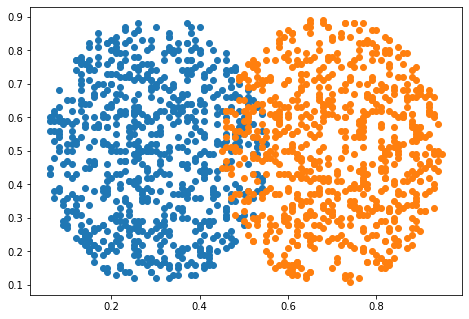

In [36]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot(np.ravel(dataCoords[np.where(dataLabels == 0)])[::2],
np.ravel(dataCoords[np.where(dataLabels == 0)])[1::2], ls='', marker='o')

ax.plot(np.ravel(dataCoords[np.where(dataLabels == 1)])[::2],
np.ravel(dataCoords[np.where(dataLabels == 1)])[1::2], ls='', marker='o')

In [25]:
from IPython.display import Image

# Loss function Two-Qubit

Loss is calculated with a simple two-qubit gate. First, the data is embedded into Rx rotation with pi/4 rotation of Ry and Rz. The parameterized quantum circuit is placed after the embedding. We used same structure of the circuit1 from the paper to check the convergence.

![Two-Qubits Example](Two-qubits.png)

In [62]:
def embed(qc,qr,theta,i):
    qc.rx(dataCoords[i][0],qr[0])
    qc.rx(dataCoords[i][1],qr[1])
    
    qc.ry(pi/4,qr[:])
    qc.rz(pi/4,qr[:])
    return qc

def circuit1(qc,qr,theta,i):
    count=0;
    for i in range(2):
        qc.rx(theta[count],qr[i])
        count=count+1
    for i in range(2):
        qc.rz(theta[count],qr[i])
        count=count+1
    return qc

def QCrun(theta,i,nshot):
    backend = Aer.get_backend('qasm_simulator')
    qr = QuantumRegister(2)
    cr = ClassicalRegister(2)
    qc = QuantumCircuit(qr,cr)

    qc=embed(qc,qr,theta,i)
    qc=circuit1(qc,qr,theta,i)


    qc.measure(qr[:],cr[:])
    job = execute(qc, backend, shots=nshot)
    result = job.result()
    count =result.get_counts()
    lm=-1*(cN(count,'00')+cN(count,'01'))
    lp=1*(cN(count,'10')+cN(count,'11'))
    
    return (lm+lp)/nshot
    
def loss(y,i):
    return abs(y-2*(b_shuffled[i]-0.5))
    

def loss2qubit(theta,i):    
    #i th data
    #parameter
    #return loss
    
    nshot=1000;
    y=QCrun(theta,i,nshot)
    l1=loss(y,i)
   
    return l1
lossCal2qubit([1,1,1,1],10)

0.7110000000000001

## [SPSA method](https://en.wikipedia.org/wiki/Simultaneous_perturbation_stochastic_approximation)

SPSA is an algorithm used in numerical optimization.

Consider a loss function $L(\mathbf{x})$. In order to optimize $L$, SPSA iteratively optimizes the parameters of the loss function according to the following update rule:

$$\mathbf{y}_{n+1} = \mathbf{y}_{n} - a_{n}\widehat{\Delta L}_{n}(\mathbf{y}_{n}),$$

where $\widehat{\Delta L}_{n}(\mathbf{y}_{n}))$ is an estimate of the gradient at $\mathbf{y}_{n}$.

How SPSA calculates that gradient is by using a finite-difference rule on random perturbations of component of the parameter vector.
    $$\left( \widehat{\Delta L}_{n}(\mathbf{y}_{n}))\right)_{j} = \frac{L(\mathbf{y}_{n} + c_{n}\boldsymbol{\Delta}_{n}) - L(\mathbf{y}_{n} - c_{n}\boldsymbol{\Delta}_{n}) }{c_{n}\left(\boldsymbol{\Delta}_{n}\right)_{j}}$$
    
That is at each iteration, SPSA generates a random perturbation $\boldsymbol{\Delta}_{n}$, and does a finite-difference rule with that perturbation.

In order for the algorithm to converge, the random perturbation $\boldsymbol{\Delta}_{n}$ and finite-difference coefficients $c_{n}$ must satisfy certain properties (see the Wikipedia article linked to in the title). Importantly $c_{n}$ must tend to 0 as $n$ increases, and the size of the random fluctuations $\boldsymbol{\Delta}_{n}$ must also be bounded.

According to the wikipedia article, the coefficients $a_{n}$ and $c_{n}$ should look something like

$$c_{n} = \frac{c}{n^\gamma}~~\text{and}~~a_{n} = \frac{a}{n}.$$

In [71]:
def SPSA_gradient(loss, currentParams, gradientCoefficient):
    r'''Computes an estimator of the gradient using the procedure
    described in the SPSA algorithm.
    
    Inputs:
        loss: The loss function
        currentParams: The current value for the parameters
        gradientCoefficient: The coefficient c_n, which controls how much the current parameters are
                                               perturbed when computing the gradient
    
    Returns:
        gradient: The SPSA-based gradient of the loss function at currentParams'''
    
    numParams = len(currentParams)
    # Generate a random perturbation using the Rademacher distribution
    randomPerturbation = 2*np.random.binomial(1, .5, size=numParams) - 1
    
    gradient = (loss(currentParams + gradientCoefficient*randomPerturbation) - loss(currentParams - gradientCoefficient*randomPerturbation))\
                        /(gradientCoefficient*randomPerturbation)
    
    return gradient

def SPSA_update(loss, currentParams, updateCoefficient, gradientCoefficient):
    r'''Performs a parameter update according to the SPSA approach.
    
    NOTE: This function isn't aware of the notion of iterations, or anything of that sort.
    
    Inputs:
        loss: The loss function
        currentParams: The current value for the parameters
        updateCoefficient: The coefficient a_n, which controls how the current parameters are updated
                                            when including the gradient
        gradientCoefficient: The coefficient c_n, which controls how much the current parameters are
                                               perturbed when computing the gradient

    Returns:
        The updated parameter values'''
    
    grad = SPSA_gradient(loss, currentParams, gradientCoefficient)
    
    return currentParams - updateCoefficient*grad

# Test the convergence of first data point

To have sanity check, we take first data and run the optimization.

In [63]:

c = 2
a = 1

# Make some lists to keep track of things
lossList = []
coeffsList = []
paramsList = []

# Set starting values for the parameters
np.random.seed(0)
currentParams = np.random.uniform(size=4)

# Do the updates
for j in range(100):
    cj = c/(j+1)**.5
    aj = a/(j+1)

    lossList.append(loss2qubit(currentParams,1))
    coeffsList.append((cj, aj))
    paramsList.append(currentParams)
    
    currentParams = SPSA_update(loss2qubit, currentParams, aj, cj,1)

Text(0.5, 1.0, 'Parameter values')

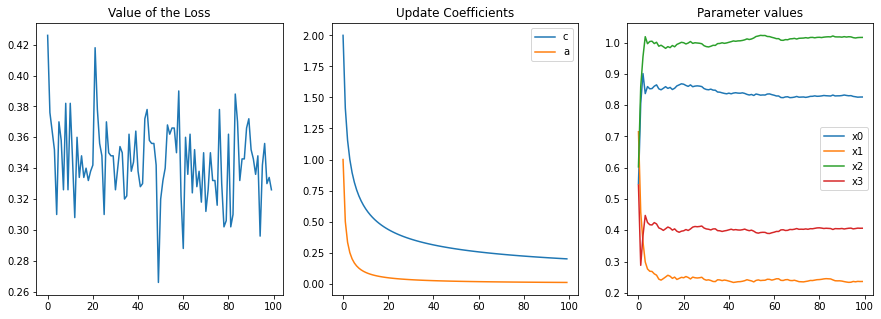

In [64]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1, 3, 1)
ax.plot(lossList)
ax.set_title('Value of the Loss')

ax = fig.add_subplot(1, 3, 2)
ax.plot([X[0] for X in coeffsList], label='c')
ax.plot([X[1] for X in coeffsList], label='a')
ax.set_title('Update Coefficients')
ax.legend(loc=0)

ax = fig.add_subplot(1, 3, 3)
for j in range(4):
    ax.plot([X[j] for X in paramsList], label='x{0}'.format(j))
ax.legend(loc=0)
ax.set_title('Parameter values')

# Large data

In [120]:
def embed(qc,qr,theta,i):
    qc.rx(dataCoords[i][0],qr[0])
    qc.rx(dataCoords[i][1],qr[1])
    
    qc.ry(pi/4,qr[:])
    qc.rz(pi/4,qr[:])
    return qc

def circuit1(qc,qr,theta):
    count=0;
    for i in range(2):
        qc.rx(theta[count],qr[i])
        count=count+1
    for i in range(2):
        qc.rz(theta[count],qr[i])
        count=count+1
    return qc

def QCrun(theta,i,nshot):
    backend = Aer.get_backend('qasm_simulator')
    qr = QuantumRegister(2)
    cr = ClassicalRegister(2)
    qc = QuantumCircuit(qr,cr)

    qc=embed(qc,qr,theta,i)
    qc=circuit1(qc,qr,theta)


    qc.measure(qr[:],cr[:])
    job = execute(qc, backend, shots=nshot)
    result = job.result()
    count =result.get_counts()
    lm=-1*(cN(count,'00')+cN(count,'01'))
    lp=1*(cN(count,'10')+cN(count,'11'))
    
    return (lm+lp)/nshot
    
def loss(y,i):
    return abs(y-2*(b_shuffled[i]-0.5))
    

def loss2qubit(theta,i):    
    #i th data
    #parameter
    #return loss
    
    nshot=1000;
    y=QCrun(theta,i,nshot)
    l1=loss(y,i)
   
    return l1

def result(theta,i):    
    #i th data
    #parameter
    #return loss
    
    nshot=1;
    y=QCrun(theta,i,nshot)
   
    return y


lossCal2qubit([1,1,1,1],10)

0.6859999999999999

In [ ]:
c = 5
a = 1

# Make some lists to keep track of things
lossList = []
coeffsList = []
paramsList =[]
accuracyList = []

# Set starting values for the parameters
np.random.seed(2)
currentParams = np.random.uniform(size=4)

# Do the updates
for j in range(1000):
    print(j,"th iteration")
    
    cj = c/(j+1)**.5
    aj = a/(j+1)
    
    # Grab a subset of the data for minibatching
    np.random.seed(j)
    data_ixs = np.random.choice(len(shuffled_data), size=len(shuffled_data))
    
    # Evaluate the loss over that subset
    # We include a regularization term at the end 
    L = lambda x: np.sum([loss2qubit(currentParams,j) for j in data_ixs])/len(data_ixs) + .05*np.linalg.norm(x[:2])**2
    
    lossList.append(L(currentParams))
    coeffsList.append((cj, aj))
    paramsList.append(currentParams)
    accuracyList.append(np.sum([result(currentParams,j) ==d[1] for d in data])/len(data))
    currentParams = SPSA_update(L, currentParams, aj, cj)

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration
10 th iteration
11 th iteration
12 th iteration
13 th iteration
14 th iteration
15 th iteration
16 th iteration
17 th iteration
18 th iteration
19 th iteration
20 th iteration
21 th iteration
22 th iteration
23 th iteration
24 th iteration
25 th iteration
26 th iteration
27 th iteration
28 th iteration
29 th iteration
30 th iteration
31 th iteration
32 th iteration
33 th iteration
34 th iteration
35 th iteration
36 th iteration
37 th iteration
38 th iteration
39 th iteration
40 th iteration
41 th iteration
42 th iteration
43 th iteration
44 th iteration
45 th iteration
46 th iteration
47 th iteration
48 th iteration
49 th iteration
50 th iteration
51 th iteration
52 th iteration
53 th iteration
54 th iteration
55 th iteration
56 th iteration
57 th iteration
58 th iteration
59 th iteration
60 th iteration
61 th iteration
62 th iteration
63

489 th iteration
490 th iteration
491 th iteration
492 th iteration
493 th iteration
494 th iteration
495 th iteration
496 th iteration
497 th iteration
498 th iteration
499 th iteration
500 th iteration
501 th iteration
502 th iteration
503 th iteration
504 th iteration
505 th iteration
506 th iteration
507 th iteration
508 th iteration
509 th iteration
510 th iteration
511 th iteration
512 th iteration
513 th iteration
514 th iteration
515 th iteration
516 th iteration
517 th iteration
518 th iteration
519 th iteration
520 th iteration
521 th iteration
522 th iteration
523 th iteration
524 th iteration
525 th iteration
526 th iteration
527 th iteration
528 th iteration
529 th iteration
530 th iteration
531 th iteration
532 th iteration
533 th iteration
534 th iteration
535 th iteration
536 th iteration
537 th iteration
538 th iteration
539 th iteration
540 th iteration
541 th iteration
542 th iteration
543 th iteration
544 th iteration
545 th iteration
546 th iteration
547 th iterati

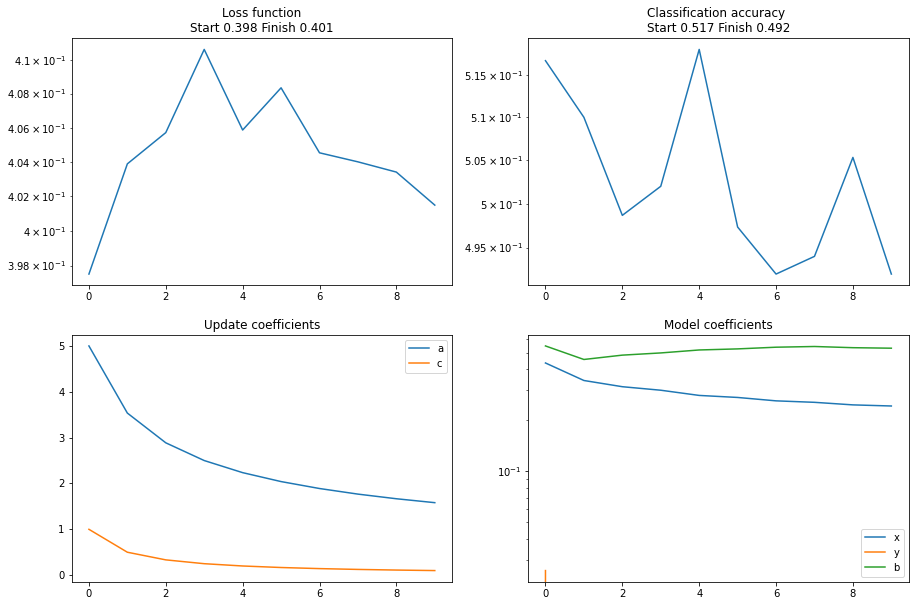

In [126]:
fig = plt.figure(figsize=(15, 10))

ax = fig.add_subplot(2, 2, 1)
ax.plot(lossList)
ax.set_title('Loss function\nStart {0} Finish {1}'.format(np.round(lossList[0], 3), np.round(lossList[-1], 3)))
ax.set_yscale('log')

ax = fig.add_subplot(2, 2, 2)
ax.plot(accuracyList)
ax.set_title('Classification accuracy \nStart {0} Finish {1}'.format(np.round(accuracyList[0], 3), np.round(accuracyList[-1], 3)))
ax.set_yscale('log')

ax = fig.add_subplot(2, 2, 3)
ax.plot([c[0] for c in coeffsList], label='a')
ax.plot([c[1] for c in coeffsList], label='c')
ax.legend(loc=0)
ax.set_title('Update coefficients')

ax = fig.add_subplot(2, 2, 4)
ax.plot([c[0] for c in paramsList], label='x')
ax.plot([c[1] for c in paramsList], label='y')
ax.plot([c[2] for c in paramsList], label='b')
ax.set_yscale('log')
ax.set_title('Model coefficients')
ax.legend(loc=0)

In [127]:
# A quick evaluation of the accuracy
np.sum([result(currentParams,j) ==d[1] for d in data])/len(data)

0.5133333333333333

In [128]:
def embedcheck(qc,qr,theta,point):
    qc.rx(point[0],qr[0])
    qc.rx(point[1],qr[1])
    
    qc.ry(pi/4,qr[:])
    qc.rz(pi/4,qr[:])
    return qc

def QCruncheck(theta,point,nshot):
    backend = Aer.get_backend('qasm_simulator')
    qr = QuantumRegister(2)
    cr = ClassicalRegister(2)
    qc = QuantumCircuit(qr,cr)

    qc=embedcheck(qc,qr,theta,point)
    qc=circuit1(qc,qr,theta)


    qc.measure(qr[:],cr[:])
    job = execute(qc, backend, shots=nshot)
    result = job.result()
    count =result.get_counts()
    lm=-1*(cN(count,'00')+cN(count,'01'))
    lp=1*(cN(count,'10')+cN(count,'11'))
    
    return (lm+lp)/nshot

def check(theta,point):    
    #i th data
    #parameter
    #return loss
    
    nshot=1;
    y=QCruncheck(theta,point,nshot)
   
    return y

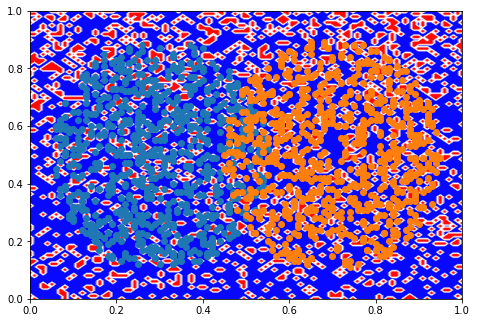

In [129]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(np.ravel(dataCoords[np.where(dataLabels == 0)])[::2],
np.ravel(dataCoords[np.where(dataLabels == 0)])[1::2], ls='', marker='o')

ax.plot(np.ravel(dataCoords[np.where(dataLabels == 1)])[::2],
np.ravel(dataCoords[np.where(dataLabels == 1)])[1::2], ls='', marker='o')

X = np.linspace(0, 1, num=100)
Z = np.zeros((len(X), len(X)))



# Contour map
for j in range(len(X)):
    for k in range(len(X)):
        # Fill Z with the labels (numerical values)
        # the inner loop goes over the columns of Z,
        # which corresponds to sweeping x-values
        # Therefore, the role of j,k is flipped in the signature
        Z[j, k] = check(currentParams, np.array([X[k], X[j]]))
        
        

        
ax.contourf(X, X, Z, cmap='bwr', levels=30)

After 1000 iteration we have theta = [-1.09816828 -2.70145399  1.88104365  1.51070775]


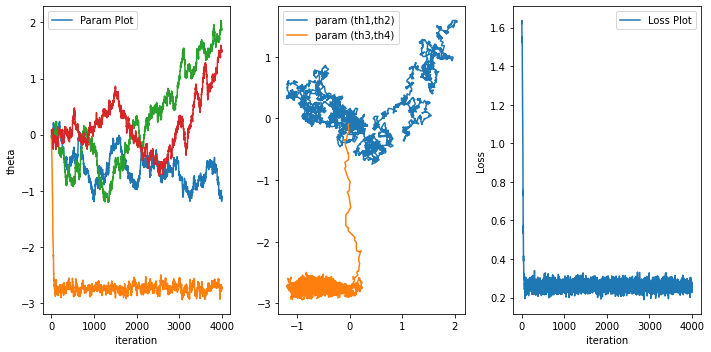

In [150]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
print('After 1000 iteration we have theta =',theta)
axes[0].plot(thdata)
axes[0].set_ylabel('theta')
axes[0].legend(['Param Plot'])
axes[0].set_xlabel('iteration')
axes[1].plot([item[2] for item in thdata],[item[3] for item in thdata],[item[0] for item in thdata],[item[1] for item in thdata])
axes[1].legend(['param (th1,th2)','param (th3,th4)'])

axes[2].plot(progress)
axes[2].legend(['Loss Plot'])
axes[2].set_ylabel('Loss')
axes[2].set_xlabel('iteration')
fig.tight_layout()    

In [151]:
progress=[];

thdata=[];
theta=[0,0,0,0];
c1=0.05;   
delta=6;
nshot=100;
theta=np.array(theta)-SPSA(1,theta,c1,delta,nshot)
for ep in range(4000):
    delta=random.random()+0.3
    theta=theta-SPSA(1,theta,c1,delta,nshot)
    print(ep,"th iteration L=",lossCal2qubit(1,theta,nshot))
    progress.append(lossCal2qubit(1,theta,nshot))
    thdata.append(theta)

0 th iteration L= 1.72
1 th iteration L= 1.6800000000000002
2 th iteration L= 1.52
3 th iteration L= 1.62
4 th iteration L= 1.6600000000000001
5 th iteration L= 1.26
6 th iteration L= 1.48
7 th iteration L= 1.28
8 th iteration L= 1.08
9 th iteration L= 1.3
10 th iteration L= 1.4
11 th iteration L= 1.52
12 th iteration L= 1.44
13 th iteration L= 1.38
14 th iteration L= 1.46
15 th iteration L= 1.48
16 th iteration L= 1.3599999999999999
17 th iteration L= 1.32
18 th iteration L= 1.28
19 th iteration L= 1.08
20 th iteration L= 1.02
21 th iteration L= 0.6799999999999999
22 th iteration L= 0.86
23 th iteration L= 0.72
24 th iteration L= 0.88
25 th iteration L= 0.6799999999999999
26 th iteration L= 0.6799999999999999
27 th iteration L= 0.62
28 th iteration L= 0.76
29 th iteration L= 0.9
30 th iteration L= 0.84
31 th iteration L= 0.76
32 th iteration L= 0.72
33 th iteration L= 0.45999999999999996
34 th iteration L= 0.6599999999999999
35 th iteration L= 0.5800000000000001
36 th iteration L= 0.6

264 th iteration L= 0.31999999999999995
265 th iteration L= 0.30000000000000004
266 th iteration L= 0.18000000000000005
267 th iteration L= 0.33999999999999997
268 th iteration L= 0.33999999999999997
269 th iteration L= 0.26
270 th iteration L= 0.30000000000000004
271 th iteration L= 0.19999999999999996
272 th iteration L= 0.33999999999999997
273 th iteration L= 0.38
274 th iteration L= 0.48
275 th iteration L= 0.26
276 th iteration L= 0.42000000000000004
277 th iteration L= 0.42000000000000004
278 th iteration L= 0.28
279 th iteration L= 0.24
280 th iteration L= 0.33999999999999997
281 th iteration L= 0.28
282 th iteration L= 0.26
283 th iteration L= 0.30000000000000004
284 th iteration L= 0.45999999999999996
285 th iteration L= 0.33999999999999997
286 th iteration L= 0.26
287 th iteration L= 0.28
288 th iteration L= 0.28
289 th iteration L= 0.4
290 th iteration L= 0.26
291 th iteration L= 0.36
292 th iteration L= 0.14
293 th iteration L= 0.19999999999999996
294 th iteration L= 0.36
2

510 th iteration L= 0.21999999999999997
511 th iteration L= 0.18000000000000005
512 th iteration L= 0.30000000000000004
513 th iteration L= 0.31999999999999995
514 th iteration L= 0.26
515 th iteration L= 0.26
516 th iteration L= 0.30000000000000004
517 th iteration L= 0.19999999999999996
518 th iteration L= 0.30000000000000004
519 th iteration L= 0.21999999999999997
520 th iteration L= 0.43999999999999995
521 th iteration L= 0.31999999999999995
522 th iteration L= 0.21999999999999997
523 th iteration L= 0.33999999999999997
524 th iteration L= 0.38
525 th iteration L= 0.30000000000000004
526 th iteration L= 0.30000000000000004
527 th iteration L= 0.31999999999999995
528 th iteration L= 0.36
529 th iteration L= 0.31999999999999995
530 th iteration L= 0.38
531 th iteration L= 0.33999999999999997
532 th iteration L= 0.28
533 th iteration L= 0.30000000000000004
534 th iteration L= 0.28
535 th iteration L= 0.31999999999999995
536 th iteration L= 0.21999999999999997
537 th iteration L= 0.38


771 th iteration L= 0.30000000000000004
772 th iteration L= 0.31999999999999995
773 th iteration L= 0.30000000000000004
774 th iteration L= 0.31999999999999995
775 th iteration L= 0.24
776 th iteration L= 0.38
777 th iteration L= 0.16000000000000003
778 th iteration L= 0.18000000000000005
779 th iteration L= 0.26
780 th iteration L= 0.42000000000000004
781 th iteration L= 0.18000000000000005
782 th iteration L= 0.24
783 th iteration L= 0.31999999999999995
784 th iteration L= 0.24
785 th iteration L= 0.18000000000000005
786 th iteration L= 0.19999999999999996
787 th iteration L= 0.28
788 th iteration L= 0.45999999999999996
789 th iteration L= 0.16000000000000003
790 th iteration L= 0.36
791 th iteration L= 0.31999999999999995
792 th iteration L= 0.28
793 th iteration L= 0.33999999999999997
794 th iteration L= 0.24
795 th iteration L= 0.30000000000000004
796 th iteration L= 0.31999999999999995
797 th iteration L= 0.26
798 th iteration L= 0.31999999999999995
799 th iteration L= 0.21999999

1028 th iteration L= 0.19999999999999996
1029 th iteration L= 0.33999999999999997
1030 th iteration L= 0.30000000000000004
1031 th iteration L= 0.07999999999999996
1032 th iteration L= 0.28
1033 th iteration L= 0.31999999999999995
1034 th iteration L= 0.18000000000000005
1035 th iteration L= 0.28
1036 th iteration L= 0.36
1037 th iteration L= 0.26
1038 th iteration L= 0.19999999999999996
1039 th iteration L= 0.33999999999999997
1040 th iteration L= 0.42000000000000004
1041 th iteration L= 0.28
1042 th iteration L= 0.19999999999999996
1043 th iteration L= 0.31999999999999995
1044 th iteration L= 0.28
1045 th iteration L= 0.31999999999999995
1046 th iteration L= 0.31999999999999995
1047 th iteration L= 0.26
1048 th iteration L= 0.16000000000000003
1049 th iteration L= 0.30000000000000004
1050 th iteration L= 0.24
1051 th iteration L= 0.28
1052 th iteration L= 0.30000000000000004
1053 th iteration L= 0.19999999999999996
1054 th iteration L= 0.26
1055 th iteration L= 0.16000000000000003
10

1272 th iteration L= 0.43999999999999995
1273 th iteration L= 0.19999999999999996
1274 th iteration L= 0.30000000000000004
1275 th iteration L= 0.28
1276 th iteration L= 0.28
1277 th iteration L= 0.33999999999999997
1278 th iteration L= 0.16000000000000003
1279 th iteration L= 0.28
1280 th iteration L= 0.45999999999999996
1281 th iteration L= 0.24
1282 th iteration L= 0.28
1283 th iteration L= 0.24
1284 th iteration L= 0.19999999999999996
1285 th iteration L= 0.26
1286 th iteration L= 0.18000000000000005
1287 th iteration L= 0.18000000000000005
1288 th iteration L= 0.31999999999999995
1289 th iteration L= 0.30000000000000004
1290 th iteration L= 0.28
1291 th iteration L= 0.31999999999999995
1292 th iteration L= 0.31999999999999995
1293 th iteration L= 0.28
1294 th iteration L= 0.52
1295 th iteration L= 0.18000000000000005
1296 th iteration L= 0.26
1297 th iteration L= 0.21999999999999997
1298 th iteration L= 0.24
1299 th iteration L= 0.24
1300 th iteration L= 0.48
1301 th iteration L= 

1517 th iteration L= 0.19999999999999996
1518 th iteration L= 0.31999999999999995
1519 th iteration L= 0.31999999999999995
1520 th iteration L= 0.31999999999999995
1521 th iteration L= 0.31999999999999995
1522 th iteration L= 0.24
1523 th iteration L= 0.30000000000000004
1524 th iteration L= 0.28
1525 th iteration L= 0.30000000000000004
1526 th iteration L= 0.21999999999999997
1527 th iteration L= 0.21999999999999997
1528 th iteration L= 0.33999999999999997
1529 th iteration L= 0.24
1530 th iteration L= 0.21999999999999997
1531 th iteration L= 0.16000000000000003
1532 th iteration L= 0.26
1533 th iteration L= 0.31999999999999995
1534 th iteration L= 0.33999999999999997
1535 th iteration L= 0.28
1536 th iteration L= 0.19999999999999996
1537 th iteration L= 0.30000000000000004
1538 th iteration L= 0.14
1539 th iteration L= 0.30000000000000004
1540 th iteration L= 0.19999999999999996
1541 th iteration L= 0.24
1542 th iteration L= 0.21999999999999997
1543 th iteration L= 0.1999999999999999

1755 th iteration L= 0.38
1756 th iteration L= 0.19999999999999996
1757 th iteration L= 0.30000000000000004
1758 th iteration L= 0.24
1759 th iteration L= 0.14
1760 th iteration L= 0.14
1761 th iteration L= 0.24
1762 th iteration L= 0.31999999999999995
1763 th iteration L= 0.26
1764 th iteration L= 0.18000000000000005
1765 th iteration L= 0.33999999999999997
1766 th iteration L= 0.24
1767 th iteration L= 0.21999999999999997
1768 th iteration L= 0.31999999999999995
1769 th iteration L= 0.19999999999999996
1770 th iteration L= 0.24
1771 th iteration L= 0.24
1772 th iteration L= 0.33999999999999997
1773 th iteration L= 0.21999999999999997
1774 th iteration L= 0.28
1775 th iteration L= 0.18000000000000005
1776 th iteration L= 0.16000000000000003
1777 th iteration L= 0.24
1778 th iteration L= 0.31999999999999995
1779 th iteration L= 0.30000000000000004
1780 th iteration L= 0.26
1781 th iteration L= 0.28
1782 th iteration L= 0.21999999999999997
1783 th iteration L= 0.24
1784 th iteration L= 

2006 th iteration L= 0.24
2007 th iteration L= 0.19999999999999996
2008 th iteration L= 0.21999999999999997
2009 th iteration L= 0.24
2010 th iteration L= 0.18000000000000005
2011 th iteration L= 0.24
2012 th iteration L= 0.18000000000000005
2013 th iteration L= 0.16000000000000003
2014 th iteration L= 0.21999999999999997
2015 th iteration L= 0.33999999999999997
2016 th iteration L= 0.24
2017 th iteration L= 0.16000000000000003
2018 th iteration L= 0.26
2019 th iteration L= 0.33999999999999997
2020 th iteration L= 0.30000000000000004
2021 th iteration L= 0.24
2022 th iteration L= 0.21999999999999997
2023 th iteration L= 0.26
2024 th iteration L= 0.33999999999999997
2025 th iteration L= 0.33999999999999997
2026 th iteration L= 0.19999999999999996
2027 th iteration L= 0.21999999999999997
2028 th iteration L= 0.38
2029 th iteration L= 0.21999999999999997
2030 th iteration L= 0.36
2031 th iteration L= 0.18000000000000005
2032 th iteration L= 0.26
2033 th iteration L= 0.33999999999999997
20

2251 th iteration L= 0.30000000000000004
2252 th iteration L= 0.26
2253 th iteration L= 0.28
2254 th iteration L= 0.4
2255 th iteration L= 0.26
2256 th iteration L= 0.24
2257 th iteration L= 0.24
2258 th iteration L= 0.30000000000000004
2259 th iteration L= 0.31999999999999995
2260 th iteration L= 0.31999999999999995
2261 th iteration L= 0.28
2262 th iteration L= 0.4
2263 th iteration L= 0.4
2264 th iteration L= 0.45999999999999996
2265 th iteration L= 0.42000000000000004
2266 th iteration L= 0.30000000000000004
2267 th iteration L= 0.26
2268 th iteration L= 0.43999999999999995
2269 th iteration L= 0.38
2270 th iteration L= 0.4
2271 th iteration L= 0.38
2272 th iteration L= 0.48
2273 th iteration L= 0.38
2274 th iteration L= 0.26
2275 th iteration L= 0.30000000000000004
2276 th iteration L= 0.21999999999999997
2277 th iteration L= 0.30000000000000004
2278 th iteration L= 0.28
2279 th iteration L= 0.26
2280 th iteration L= 0.30000000000000004
2281 th iteration L= 0.16000000000000003
228

2493 th iteration L= 0.26
2494 th iteration L= 0.38
2495 th iteration L= 0.18000000000000005
2496 th iteration L= 0.31999999999999995
2497 th iteration L= 0.19999999999999996
2498 th iteration L= 0.18000000000000005
2499 th iteration L= 0.31999999999999995
2500 th iteration L= 0.26
2501 th iteration L= 0.36
2502 th iteration L= 0.24
2503 th iteration L= 0.18000000000000005
2504 th iteration L= 0.28
2505 th iteration L= 0.31999999999999995
2506 th iteration L= 0.36
2507 th iteration L= 0.4
2508 th iteration L= 0.18000000000000005
2509 th iteration L= 0.28
2510 th iteration L= 0.28
2511 th iteration L= 0.24
2512 th iteration L= 0.28
2513 th iteration L= 0.26
2514 th iteration L= 0.14
2515 th iteration L= 0.31999999999999995
2516 th iteration L= 0.21999999999999997
2517 th iteration L= 0.12
2518 th iteration L= 0.18000000000000005
2519 th iteration L= 0.19999999999999996
2520 th iteration L= 0.26
2521 th iteration L= 0.21999999999999997
2522 th iteration L= 0.4
2523 th iteration L= 0.1600

2738 th iteration L= 0.45999999999999996
2739 th iteration L= 0.19999999999999996
2740 th iteration L= 0.43999999999999995
2741 th iteration L= 0.31999999999999995
2742 th iteration L= 0.18000000000000005
2743 th iteration L= 0.4
2744 th iteration L= 0.38
2745 th iteration L= 0.24
2746 th iteration L= 0.31999999999999995
2747 th iteration L= 0.19999999999999996
2748 th iteration L= 0.28
2749 th iteration L= 0.42000000000000004
2750 th iteration L= 0.36
2751 th iteration L= 0.18000000000000005
2752 th iteration L= 0.26
2753 th iteration L= 0.31999999999999995
2754 th iteration L= 0.38
2755 th iteration L= 0.42000000000000004
2756 th iteration L= 0.30000000000000004
2757 th iteration L= 0.36
2758 th iteration L= 0.26
2759 th iteration L= 0.26
2760 th iteration L= 0.28
2761 th iteration L= 0.30000000000000004
2762 th iteration L= 0.14
2763 th iteration L= 0.31999999999999995
2764 th iteration L= 0.31999999999999995
2765 th iteration L= 0.36
2766 th iteration L= 0.26
2767 th iteration L= 0

2985 th iteration L= 0.31999999999999995
2986 th iteration L= 0.26
2987 th iteration L= 0.24
2988 th iteration L= 0.24
2989 th iteration L= 0.19999999999999996
2990 th iteration L= 0.21999999999999997
2991 th iteration L= 0.26
2992 th iteration L= 0.14
2993 th iteration L= 0.38
2994 th iteration L= 0.16000000000000003
2995 th iteration L= 0.36
2996 th iteration L= 0.16000000000000003
2997 th iteration L= 0.24
2998 th iteration L= 0.26
2999 th iteration L= 0.30000000000000004
3000 th iteration L= 0.14
3001 th iteration L= 0.28
3002 th iteration L= 0.4
3003 th iteration L= 0.5800000000000001
3004 th iteration L= 0.26
3005 th iteration L= 0.36
3006 th iteration L= 0.18000000000000005
3007 th iteration L= 0.26
3008 th iteration L= 0.38
3009 th iteration L= 0.38
3010 th iteration L= 0.26
3011 th iteration L= 0.21999999999999997
3012 th iteration L= 0.26
3013 th iteration L= 0.26
3014 th iteration L= 0.18000000000000005
3015 th iteration L= 0.14
3016 th iteration L= 0.31999999999999995
3017 

3235 th iteration L= 0.26
3236 th iteration L= 0.30000000000000004
3237 th iteration L= 0.28
3238 th iteration L= 0.31999999999999995
3239 th iteration L= 0.26
3240 th iteration L= 0.31999999999999995
3241 th iteration L= 0.31999999999999995
3242 th iteration L= 0.33999999999999997
3243 th iteration L= 0.33999999999999997
3244 th iteration L= 0.26
3245 th iteration L= 0.31999999999999995
3246 th iteration L= 0.21999999999999997
3247 th iteration L= 0.31999999999999995
3248 th iteration L= 0.38
3249 th iteration L= 0.30000000000000004
3250 th iteration L= 0.52
3251 th iteration L= 0.19999999999999996
3252 th iteration L= 0.28
3253 th iteration L= 0.26
3254 th iteration L= 0.28
3255 th iteration L= 0.28
3256 th iteration L= 0.28
3257 th iteration L= 0.36
3258 th iteration L= 0.31999999999999995
3259 th iteration L= 0.42000000000000004
3260 th iteration L= 0.5
3261 th iteration L= 0.42000000000000004
3262 th iteration L= 0.38
3263 th iteration L= 0.4
3264 th iteration L= 0.24
3265 th iter

3729 th iteration L= 0.31999999999999995
3730 th iteration L= 0.42000000000000004
3731 th iteration L= 0.48
3732 th iteration L= 0.42000000000000004
3733 th iteration L= 0.30000000000000004
3734 th iteration L= 0.12
3735 th iteration L= 0.28
3736 th iteration L= 0.28
3737 th iteration L= 0.31999999999999995
3738 th iteration L= 0.36
3739 th iteration L= 0.14
3740 th iteration L= 0.28
3741 th iteration L= 0.4
3742 th iteration L= 0.16000000000000003
3743 th iteration L= 0.12
3744 th iteration L= 0.30000000000000004
3745 th iteration L= 0.28
3746 th iteration L= 0.18000000000000005
3747 th iteration L= 0.28
3748 th iteration L= 0.18000000000000005
3749 th iteration L= 0.28
3750 th iteration L= 0.24
3751 th iteration L= 0.31999999999999995
3752 th iteration L= 0.31999999999999995
3753 th iteration L= 0.33999999999999997
3754 th iteration L= 0.26
3755 th iteration L= 0.26
3756 th iteration L= 0.33999999999999997
3757 th iteration L= 0.38
3758 th iteration L= 0.21999999999999997
3759 th ite

3971 th iteration L= 0.24
3972 th iteration L= 0.38
3973 th iteration L= 0.19999999999999996
3974 th iteration L= 0.33999999999999997
3975 th iteration L= 0.21999999999999997
3976 th iteration L= 0.33999999999999997
3977 th iteration L= 0.5
3978 th iteration L= 0.26
3979 th iteration L= 0.26
3980 th iteration L= 0.28
3981 th iteration L= 0.33999999999999997
3982 th iteration L= 0.30000000000000004
3983 th iteration L= 0.24
3984 th iteration L= 0.24
3985 th iteration L= 0.42000000000000004
3986 th iteration L= 0.26
3987 th iteration L= 0.24
3988 th iteration L= 0.21999999999999997
3989 th iteration L= 0.26
3990 th iteration L= 0.26
3991 th iteration L= 0.28
3992 th iteration L= 0.26
3993 th iteration L= 0.26
3994 th iteration L= 0.36
3995 th iteration L= 0.24
3996 th iteration L= 0.18000000000000005
3997 th iteration L= 0.24
3998 th iteration L= 0.24
3999 th iteration L= 0.28


After 1000 iteration we have theta = [-3.09330618 -2.71047858  1.43642718  2.84540161]


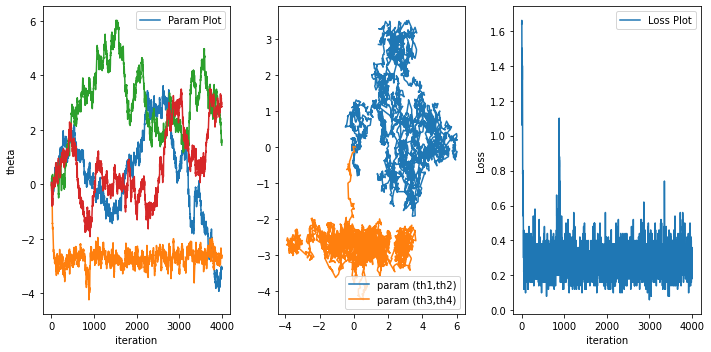

In [152]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
print('After 1000 iteration we have theta =',theta)
axes[0].plot(thdata)
axes[0].set_ylabel('theta')
axes[0].legend(['Param Plot'])
axes[0].set_xlabel('iteration')
axes[1].plot([item[2] for item in thdata],[item[3] for item in thdata],[item[0] for item in thdata],[item[1] for item in thdata])
axes[1].legend(['param (th1,th2)','param (th3,th4)'])

axes[2].plot(progress)
axes[2].legend(['Loss Plot'])
axes[2].set_ylabel('Loss')
axes[2].set_xlabel('iteration')
fig.tight_layout()    

In [153]:
progress=[];

thdata=[];
theta=[0,0,0,0];
c1=0.05;   
delta=6;
nshot=1000;
theta=np.array(theta)-SPSA(1,theta,c1,delta,nshot)
for ep in range(4000):
    delta=random.random()+0.3
    theta=theta-SPSA(1,theta,c1,delta,nshot)
    print(ep,"th iteration L=",lossCal2qubit(1,theta,nshot))
    progress.append(lossCal2qubit(1,theta,nshot))
    thdata.append(theta)

0 th iteration L= 1.6640000000000001
1 th iteration L= 1.6640000000000001
2 th iteration L= 1.698
3 th iteration L= 1.674
4 th iteration L= 1.6480000000000001
5 th iteration L= 1.616
6 th iteration L= 1.6360000000000001
7 th iteration L= 1.63
8 th iteration L= 1.674
9 th iteration L= 1.588
10 th iteration L= 1.6019999999999999
11 th iteration L= 1.56
12 th iteration L= 1.5779999999999998
13 th iteration L= 1.554
14 th iteration L= 1.5779999999999998
15 th iteration L= 1.542
16 th iteration L= 1.516
17 th iteration L= 1.552
18 th iteration L= 1.484
19 th iteration L= 1.546
20 th iteration L= 1.438
21 th iteration L= 1.476
22 th iteration L= 1.45
23 th iteration L= 1.432
24 th iteration L= 1.4020000000000001
25 th iteration L= 1.3719999999999999
26 th iteration L= 1.35
27 th iteration L= 1.324
28 th iteration L= 1.288
29 th iteration L= 1.148
30 th iteration L= 0.918
31 th iteration L= 0.914
32 th iteration L= 0.876
33 th iteration L= 0.776
34 th iteration L= 0.786
35 th iteration L= 0.7

274 th iteration L= 0.276
275 th iteration L= 0.26
276 th iteration L= 0.276
277 th iteration L= 0.266
278 th iteration L= 0.266
279 th iteration L= 0.19599999999999995
280 th iteration L= 0.242
281 th iteration L= 0.266
282 th iteration L= 0.28800000000000003
283 th iteration L= 0.266
284 th iteration L= 0.26
285 th iteration L= 0.22599999999999998
286 th iteration L= 0.21999999999999997
287 th iteration L= 0.23199999999999998
288 th iteration L= 0.266
289 th iteration L= 0.244
290 th iteration L= 0.28
291 th iteration L= 0.238
292 th iteration L= 0.256
293 th iteration L= 0.274
294 th iteration L= 0.21999999999999997
295 th iteration L= 0.274
296 th iteration L= 0.238
297 th iteration L= 0.28
298 th iteration L= 0.236
299 th iteration L= 0.24
300 th iteration L= 0.28
301 th iteration L= 0.24
302 th iteration L= 0.248
303 th iteration L= 0.27
304 th iteration L= 0.21999999999999997
305 th iteration L= 0.22799999999999998
306 th iteration L= 0.274
307 th iteration L= 0.26
308 th iterat

547 th iteration L= 0.268
548 th iteration L= 0.262
549 th iteration L= 0.262
550 th iteration L= 0.266
551 th iteration L= 0.274
552 th iteration L= 0.268
553 th iteration L= 0.276
554 th iteration L= 0.274
555 th iteration L= 0.27
556 th iteration L= 0.272
557 th iteration L= 0.25
558 th iteration L= 0.27
559 th iteration L= 0.25
560 th iteration L= 0.262
561 th iteration L= 0.272
562 th iteration L= 0.244
563 th iteration L= 0.25
564 th iteration L= 0.256
565 th iteration L= 0.246
566 th iteration L= 0.23399999999999999
567 th iteration L= 0.238
568 th iteration L= 0.266
569 th iteration L= 0.22399999999999998
570 th iteration L= 0.28400000000000003
571 th iteration L= 0.252
572 th iteration L= 0.262
573 th iteration L= 0.23399999999999999
574 th iteration L= 0.252
575 th iteration L= 0.29400000000000004
576 th iteration L= 0.22999999999999998
577 th iteration L= 0.244
578 th iteration L= 0.28
579 th iteration L= 0.23199999999999998
580 th iteration L= 0.264
581 th iteration L= 0.22

826 th iteration L= 0.252
827 th iteration L= 0.274
828 th iteration L= 0.256
829 th iteration L= 0.29200000000000004
830 th iteration L= 0.278
831 th iteration L= 0.264
832 th iteration L= 0.28600000000000003
833 th iteration L= 0.252
834 th iteration L= 0.26
835 th iteration L= 0.20199999999999996
836 th iteration L= 0.266
837 th iteration L= 0.29200000000000004
838 th iteration L= 0.28
839 th iteration L= 0.258
840 th iteration L= 0.29200000000000004
841 th iteration L= 0.27
842 th iteration L= 0.272
843 th iteration L= 0.266
844 th iteration L= 0.264
845 th iteration L= 0.25
846 th iteration L= 0.236
847 th iteration L= 0.268
848 th iteration L= 0.23399999999999999
849 th iteration L= 0.238
850 th iteration L= 0.236
851 th iteration L= 0.248
852 th iteration L= 0.272
853 th iteration L= 0.278
854 th iteration L= 0.29400000000000004
855 th iteration L= 0.278
856 th iteration L= 0.252
857 th iteration L= 0.28200000000000003
858 th iteration L= 0.268
859 th iteration L= 0.254
860 th i

1097 th iteration L= 0.262
1098 th iteration L= 0.264
1099 th iteration L= 0.236
1100 th iteration L= 0.254
1101 th iteration L= 0.21599999999999997
1102 th iteration L= 0.23399999999999999
1103 th iteration L= 0.256
1104 th iteration L= 0.244
1105 th iteration L= 0.274
1106 th iteration L= 0.276
1107 th iteration L= 0.236
1108 th iteration L= 0.256
1109 th iteration L= 0.23399999999999999
1110 th iteration L= 0.258
1111 th iteration L= 0.31200000000000006
1112 th iteration L= 0.242
1113 th iteration L= 0.258
1114 th iteration L= 0.262
1115 th iteration L= 0.26
1116 th iteration L= 0.29400000000000004
1117 th iteration L= 0.25
1118 th iteration L= 0.268
1119 th iteration L= 0.28
1120 th iteration L= 0.26
1121 th iteration L= 0.272
1122 th iteration L= 0.27
1123 th iteration L= 0.28400000000000003
1124 th iteration L= 0.278
1125 th iteration L= 0.242
1126 th iteration L= 0.268
1127 th iteration L= 0.254
1128 th iteration L= 0.242
1129 th iteration L= 0.244
1130 th iteration L= 0.254
113

1364 th iteration L= 0.254
1365 th iteration L= 0.29400000000000004
1366 th iteration L= 0.27
1367 th iteration L= 0.27
1368 th iteration L= 0.248
1369 th iteration L= 0.248
1370 th iteration L= 0.28400000000000003
1371 th iteration L= 0.29000000000000004
1372 th iteration L= 0.22999999999999998
1373 th iteration L= 0.246
1374 th iteration L= 0.23199999999999998
1375 th iteration L= 0.266
1376 th iteration L= 0.258
1377 th iteration L= 0.264
1378 th iteration L= 0.29200000000000004
1379 th iteration L= 0.20599999999999996
1380 th iteration L= 0.22399999999999998
1381 th iteration L= 0.272
1382 th iteration L= 0.252
1383 th iteration L= 0.236
1384 th iteration L= 0.244
1385 th iteration L= 0.248
1386 th iteration L= 0.26
1387 th iteration L= 0.28
1388 th iteration L= 0.258
1389 th iteration L= 0.28800000000000003
1390 th iteration L= 0.238
1391 th iteration L= 0.244
1392 th iteration L= 0.26
1393 th iteration L= 0.272
1394 th iteration L= 0.262
1395 th iteration L= 0.25
1396 th iteratio

1636 th iteration L= 0.238
1637 th iteration L= 0.262
1638 th iteration L= 0.262
1639 th iteration L= 0.28
1640 th iteration L= 0.254
1641 th iteration L= 0.252
1642 th iteration L= 0.28800000000000003
1643 th iteration L= 0.258
1644 th iteration L= 0.21199999999999997
1645 th iteration L= 0.29200000000000004
1646 th iteration L= 0.30600000000000005
1647 th iteration L= 0.272
1648 th iteration L= 0.256
1649 th iteration L= 0.26
1650 th iteration L= 0.258
1651 th iteration L= 0.246
1652 th iteration L= 0.28
1653 th iteration L= 0.28400000000000003
1654 th iteration L= 0.29400000000000004
1655 th iteration L= 0.28600000000000003
1656 th iteration L= 0.264
1657 th iteration L= 0.24
1658 th iteration L= 0.256
1659 th iteration L= 0.28400000000000003
1660 th iteration L= 0.26
1661 th iteration L= 0.262
1662 th iteration L= 0.246
1663 th iteration L= 0.22999999999999998
1664 th iteration L= 0.28
1665 th iteration L= 0.256
1666 th iteration L= 0.268
1667 th iteration L= 0.244
1668 th iteratio

1908 th iteration L= 0.274
1909 th iteration L= 0.262
1910 th iteration L= 0.266
1911 th iteration L= 0.28800000000000003
1912 th iteration L= 0.20599999999999996
1913 th iteration L= 0.262
1914 th iteration L= 0.276
1915 th iteration L= 0.29000000000000004
1916 th iteration L= 0.29000000000000004
1917 th iteration L= 0.246
1918 th iteration L= 0.268
1919 th iteration L= 0.272
1920 th iteration L= 0.23199999999999998
1921 th iteration L= 0.246
1922 th iteration L= 0.26
1923 th iteration L= 0.254
1924 th iteration L= 0.22599999999999998
1925 th iteration L= 0.276
1926 th iteration L= 0.246
1927 th iteration L= 0.246
1928 th iteration L= 0.276
1929 th iteration L= 0.23199999999999998
1930 th iteration L= 0.27
1931 th iteration L= 0.254
1932 th iteration L= 0.262
1933 th iteration L= 0.256
1934 th iteration L= 0.21199999999999997
1935 th iteration L= 0.256
1936 th iteration L= 0.21799999999999997
1937 th iteration L= 0.266
1938 th iteration L= 0.272
1939 th iteration L= 0.28
1940 th itera

2175 th iteration L= 0.236
2176 th iteration L= 0.27
2177 th iteration L= 0.262
2178 th iteration L= 0.22799999999999998
2179 th iteration L= 0.28
2180 th iteration L= 0.256
2181 th iteration L= 0.28
2182 th iteration L= 0.246
2183 th iteration L= 0.256
2184 th iteration L= 0.28400000000000003
2185 th iteration L= 0.246
2186 th iteration L= 0.256
2187 th iteration L= 0.31200000000000006
2188 th iteration L= 0.258
2189 th iteration L= 0.254
2190 th iteration L= 0.29800000000000004
2191 th iteration L= 0.29600000000000004
2192 th iteration L= 0.26
2193 th iteration L= 0.266
2194 th iteration L= 0.24
2195 th iteration L= 0.27
2196 th iteration L= 0.262
2197 th iteration L= 0.246
2198 th iteration L= 0.238
2199 th iteration L= 0.26
2200 th iteration L= 0.256
2201 th iteration L= 0.21799999999999997
2202 th iteration L= 0.266
2203 th iteration L= 0.25
2204 th iteration L= 0.23199999999999998
2205 th iteration L= 0.238
2206 th iteration L= 0.238
2207 th iteration L= 0.28
2208 th iteration L=

2443 th iteration L= 0.272
2444 th iteration L= 0.266
2445 th iteration L= 0.252
2446 th iteration L= 0.262
2447 th iteration L= 0.254
2448 th iteration L= 0.31399999999999995
2449 th iteration L= 0.254
2450 th iteration L= 0.252
2451 th iteration L= 0.264
2452 th iteration L= 0.276
2453 th iteration L= 0.28600000000000003
2454 th iteration L= 0.24
2455 th iteration L= 0.248
2456 th iteration L= 0.28200000000000003
2457 th iteration L= 0.254
2458 th iteration L= 0.27
2459 th iteration L= 0.274
2460 th iteration L= 0.258
2461 th iteration L= 0.242
2462 th iteration L= 0.26
2463 th iteration L= 0.258
2464 th iteration L= 0.248
2465 th iteration L= 0.254
2466 th iteration L= 0.25
2467 th iteration L= 0.25
2468 th iteration L= 0.244
2469 th iteration L= 0.30000000000000004
2470 th iteration L= 0.22799999999999998
2471 th iteration L= 0.27
2472 th iteration L= 0.238
2473 th iteration L= 0.22399999999999998
2474 th iteration L= 0.272
2475 th iteration L= 0.252
2476 th iteration L= 0.22999999

2710 th iteration L= 0.236
2711 th iteration L= 0.254
2712 th iteration L= 0.26
2713 th iteration L= 0.22599999999999998
2714 th iteration L= 0.26
2715 th iteration L= 0.28200000000000003
2716 th iteration L= 0.272
2717 th iteration L= 0.21799999999999997
2718 th iteration L= 0.23199999999999998
2719 th iteration L= 0.276
2720 th iteration L= 0.246
2721 th iteration L= 0.25
2722 th iteration L= 0.258
2723 th iteration L= 0.25
2724 th iteration L= 0.28600000000000003
2725 th iteration L= 0.26
2726 th iteration L= 0.276
2727 th iteration L= 0.238
2728 th iteration L= 0.22599999999999998
2729 th iteration L= 0.262
2730 th iteration L= 0.244
2731 th iteration L= 0.278
2732 th iteration L= 0.28800000000000003
2733 th iteration L= 0.258
2734 th iteration L= 0.25
2735 th iteration L= 0.252
2736 th iteration L= 0.246
2737 th iteration L= 0.29600000000000004
2738 th iteration L= 0.25
2739 th iteration L= 0.258
2740 th iteration L= 0.22599999999999998
2741 th iteration L= 0.262
2742 th iteration

2971 th iteration L= 0.256
2972 th iteration L= 0.26
2973 th iteration L= 0.27
2974 th iteration L= 0.274
2975 th iteration L= 0.29200000000000004
2976 th iteration L= 0.22799999999999998
2977 th iteration L= 0.258
2978 th iteration L= 0.276
2979 th iteration L= 0.258
2980 th iteration L= 0.258
2981 th iteration L= 0.242
2982 th iteration L= 0.254
2983 th iteration L= 0.266
2984 th iteration L= 0.236
2985 th iteration L= 0.242
2986 th iteration L= 0.266
2987 th iteration L= 0.264
2988 th iteration L= 0.32399999999999995
2989 th iteration L= 0.242
2990 th iteration L= 0.21999999999999997
2991 th iteration L= 0.276
2992 th iteration L= 0.24
2993 th iteration L= 0.28200000000000003
2994 th iteration L= 0.22799999999999998
2995 th iteration L= 0.272
2996 th iteration L= 0.256
2997 th iteration L= 0.242
2998 th iteration L= 0.272
2999 th iteration L= 0.25
3000 th iteration L= 0.23199999999999998
3001 th iteration L= 0.256
3002 th iteration L= 0.248
3003 th iteration L= 0.236
3004 th iterati

3241 th iteration L= 0.262
3242 th iteration L= 0.264
3243 th iteration L= 0.22799999999999998
3244 th iteration L= 0.274
3245 th iteration L= 0.262
3246 th iteration L= 0.262
3247 th iteration L= 0.27
3248 th iteration L= 0.21999999999999997
3249 th iteration L= 0.28600000000000003
3250 th iteration L= 0.254
3251 th iteration L= 0.244
3252 th iteration L= 0.278
3253 th iteration L= 0.274
3254 th iteration L= 0.256
3255 th iteration L= 0.262
3256 th iteration L= 0.264
3257 th iteration L= 0.28
3258 th iteration L= 0.29800000000000004
3259 th iteration L= 0.264
3260 th iteration L= 0.27
3261 th iteration L= 0.264
3262 th iteration L= 0.258
3263 th iteration L= 0.256
3264 th iteration L= 0.29200000000000004
3265 th iteration L= 0.26
3266 th iteration L= 0.258
3267 th iteration L= 0.246
3268 th iteration L= 0.256
3269 th iteration L= 0.256
3270 th iteration L= 0.27
3271 th iteration L= 0.238
3272 th iteration L= 0.23399999999999999
3273 th iteration L= 0.23199999999999998
3274 th iteratio

3511 th iteration L= 0.28600000000000003
3512 th iteration L= 0.246
3513 th iteration L= 0.264
3514 th iteration L= 0.272
3515 th iteration L= 0.248
3516 th iteration L= 0.262
3517 th iteration L= 0.24
3518 th iteration L= 0.20199999999999996
3519 th iteration L= 0.256
3520 th iteration L= 0.278
3521 th iteration L= 0.262
3522 th iteration L= 0.272
3523 th iteration L= 0.22199999999999998
3524 th iteration L= 0.256
3525 th iteration L= 0.272
3526 th iteration L= 0.248
3527 th iteration L= 0.24
3528 th iteration L= 0.25
3529 th iteration L= 0.22599999999999998
3530 th iteration L= 0.264
3531 th iteration L= 0.29400000000000004
3532 th iteration L= 0.248
3533 th iteration L= 0.28800000000000003
3534 th iteration L= 0.272
3535 th iteration L= 0.22199999999999998
3536 th iteration L= 0.256
3537 th iteration L= 0.248
3538 th iteration L= 0.29000000000000004
3539 th iteration L= 0.20399999999999996
3540 th iteration L= 0.248
3541 th iteration L= 0.28400000000000003
3542 th iteration L= 0.262

3776 th iteration L= 0.252
3777 th iteration L= 0.29200000000000004
3778 th iteration L= 0.24
3779 th iteration L= 0.272
3780 th iteration L= 0.248
3781 th iteration L= 0.28600000000000003
3782 th iteration L= 0.274
3783 th iteration L= 0.27
3784 th iteration L= 0.258
3785 th iteration L= 0.244
3786 th iteration L= 0.29000000000000004
3787 th iteration L= 0.28600000000000003
3788 th iteration L= 0.264
3789 th iteration L= 0.256
3790 th iteration L= 0.256
3791 th iteration L= 0.25
3792 th iteration L= 0.28
3793 th iteration L= 0.264
3794 th iteration L= 0.258
3795 th iteration L= 0.266
3796 th iteration L= 0.23399999999999999
3797 th iteration L= 0.276
3798 th iteration L= 0.28600000000000003
3799 th iteration L= 0.29600000000000004
3800 th iteration L= 0.262
3801 th iteration L= 0.264
3802 th iteration L= 0.21599999999999997
3803 th iteration L= 0.248
3804 th iteration L= 0.256
3805 th iteration L= 0.252
3806 th iteration L= 0.21799999999999997
3807 th iteration L= 0.264
3808 th iterat

After 1000 iteration we have theta = [-0.22572999 -2.72253771  0.34094337 -0.30667653]


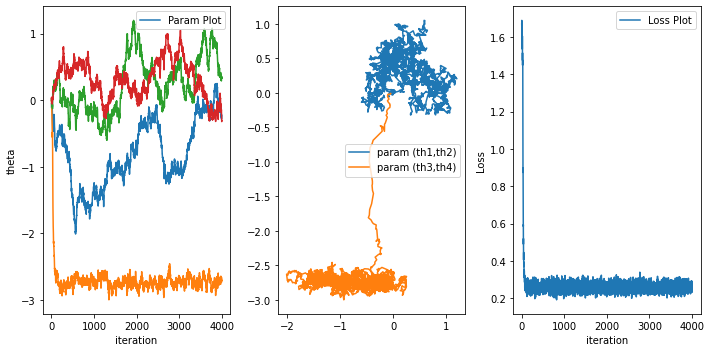

In [154]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
print('After 1000 iteration we have theta =',theta)
axes[0].plot(thdata)
axes[0].set_ylabel('theta')
axes[0].legend(['Param Plot'])
axes[0].set_xlabel('iteration')
axes[1].plot([item[2] for item in thdata],[item[3] for item in thdata],[item[0] for item in thdata],[item[1] for item in thdata])
axes[1].legend(['param (th1,th2)','param (th3,th4)'])

axes[2].plot(progress)
axes[2].legend(['Loss Plot'])
axes[2].set_ylabel('Loss')
axes[2].set_xlabel('iteration')
fig.tight_layout()    

In [155]:
progress=[];

thdata=[];
theta=[0,0,0,0];
c1=0.05;   
delta=6;
nshot=10000;
theta=np.array(theta)-SPSA(1,theta,c1,delta,nshot)
for ep in range(4000):
    delta=random.random()+0.3
    theta=theta-SPSA(1,theta,c1,delta,nshot)
    print(ep,"th iteration L=",lossCal2qubit(1,theta,nshot))
    progress.append(lossCal2qubit(1,theta,nshot))
    thdata.append(theta)

0 th iteration L= 1.6834
1 th iteration L= 1.671
2 th iteration L= 1.6758
3 th iteration L= 1.6722000000000001
4 th iteration L= 1.662
5 th iteration L= 1.6406
6 th iteration L= 1.6522000000000001
7 th iteration L= 1.617
8 th iteration L= 1.6219999999999999
9 th iteration L= 1.6186
10 th iteration L= 1.5856
11 th iteration L= 1.5596
12 th iteration L= 1.5544
13 th iteration L= 1.5196
14 th iteration L= 1.4862
15 th iteration L= 1.4546000000000001
16 th iteration L= 1.4126
17 th iteration L= 1.38
18 th iteration L= 1.3652
19 th iteration L= 1.3226
20 th iteration L= 1.2676
21 th iteration L= 1.1688
22 th iteration L= 1.1012
23 th iteration L= 1.0646
24 th iteration L= 1.0382
25 th iteration L= 0.9888
26 th iteration L= 0.9866
27 th iteration L= 0.916
28 th iteration L= 0.8726
29 th iteration L= 0.802
30 th iteration L= 0.7296
31 th iteration L= 0.6992
32 th iteration L= 0.6998
33 th iteration L= 0.6484
34 th iteration L= 0.6364000000000001
35 th iteration L= 0.6118
36 th iteration L= 0.

493 th iteration L= 0.26680000000000004
494 th iteration L= 0.24060000000000004
495 th iteration L= 0.25880000000000003
496 th iteration L= 0.25960000000000005
497 th iteration L= 0.2602
498 th iteration L= 0.2512
499 th iteration L= 0.25360000000000005
500 th iteration L= 0.2548
501 th iteration L= 0.2558
502 th iteration L= 0.25560000000000005
503 th iteration L= 0.272
504 th iteration L= 0.25780000000000003
505 th iteration L= 0.26180000000000003
506 th iteration L= 0.2572
507 th iteration L= 0.26359999999999995
508 th iteration L= 0.26480000000000004
509 th iteration L= 0.25780000000000003
510 th iteration L= 0.2518
511 th iteration L= 0.25239999999999996
512 th iteration L= 0.26180000000000003
513 th iteration L= 0.26160000000000005
514 th iteration L= 0.2532
515 th iteration L= 0.25339999999999996
516 th iteration L= 0.266
517 th iteration L= 0.2572
518 th iteration L= 0.25939999999999996
519 th iteration L= 0.2518
520 th iteration L= 0.2542
521 th iteration L= 0.2558
522 th iter

731 th iteration L= 0.25439999999999996
732 th iteration L= 0.24960000000000004
733 th iteration L= 0.26380000000000003
734 th iteration L= 0.25560000000000005
735 th iteration L= 0.26139999999999997
736 th iteration L= 0.24560000000000004
737 th iteration L= 0.2652
738 th iteration L= 0.257
739 th iteration L= 0.25780000000000003
740 th iteration L= 0.258
741 th iteration L= 0.26839999999999997
742 th iteration L= 0.24539999999999995
743 th iteration L= 0.26259999999999994
744 th iteration L= 0.267
745 th iteration L= 0.2532
746 th iteration L= 0.25139999999999996
747 th iteration L= 0.24819999999999998
748 th iteration L= 0.2508
749 th iteration L= 0.2532
750 th iteration L= 0.24919999999999998
751 th iteration L= 0.24919999999999998
752 th iteration L= 0.24060000000000004
753 th iteration L= 0.26039999999999996
754 th iteration L= 0.2548
755 th iteration L= 0.25160000000000005
756 th iteration L= 0.247
757 th iteration L= 0.25839999999999996
758 th iteration L= 0.26559999999999995
7

1198 th iteration L= 0.266
1199 th iteration L= 0.26
1200 th iteration L= 0.258
1201 th iteration L= 0.2518
1202 th iteration L= 0.2548
1203 th iteration L= 0.267
1204 th iteration L= 0.2542
1205 th iteration L= 0.26
1206 th iteration L= 0.271
1207 th iteration L= 0.24419999999999997
1208 th iteration L= 0.2632
1209 th iteration L= 0.253
1210 th iteration L= 0.262
1211 th iteration L= 0.26359999999999995
1212 th iteration L= 0.2532
1213 th iteration L= 0.26039999999999996
1214 th iteration L= 0.2732
1215 th iteration L= 0.25860000000000005
1216 th iteration L= 0.2612
1217 th iteration L= 0.2572
1218 th iteration L= 0.26880000000000004
1219 th iteration L= 0.25860000000000005
1220 th iteration L= 0.258
1221 th iteration L= 0.26239999999999997
1222 th iteration L= 0.26
1223 th iteration L= 0.258
1224 th iteration L= 0.25339999999999996
1225 th iteration L= 0.26439999999999997
1226 th iteration L= 0.24939999999999996
1227 th iteration L= 0.2642
1228 th iteration L= 0.25
1229 th iteration 

1435 th iteration L= 0.24980000000000002
1436 th iteration L= 0.25239999999999996
1437 th iteration L= 0.256
1438 th iteration L= 0.25939999999999996
1439 th iteration L= 0.25860000000000005
1440 th iteration L= 0.26139999999999997
1441 th iteration L= 0.25460000000000005
1442 th iteration L= 0.258
1443 th iteration L= 0.2694
1444 th iteration L= 0.2542
1445 th iteration L= 0.24980000000000002
1446 th iteration L= 0.26759999999999995
1447 th iteration L= 0.25960000000000005
1448 th iteration L= 0.2672
1449 th iteration L= 0.26659999999999995
1450 th iteration L= 0.2724
1451 th iteration L= 0.253
1452 th iteration L= 0.24619999999999997
1453 th iteration L= 0.25880000000000003
1454 th iteration L= 0.2528
1455 th iteration L= 0.25560000000000005
1456 th iteration L= 0.2572
1457 th iteration L= 0.25880000000000003
1458 th iteration L= 0.26280000000000003
1459 th iteration L= 0.26139999999999997
1460 th iteration L= 0.26060000000000005
1461 th iteration L= 0.24919999999999998
1462 th itera

1669 th iteration L= 0.25839999999999996
1670 th iteration L= 0.24760000000000004
1671 th iteration L= 0.25839999999999996
1672 th iteration L= 0.26359999999999995
1673 th iteration L= 0.24619999999999997
1674 th iteration L= 0.256
1675 th iteration L= 0.2508
1676 th iteration L= 0.26739999999999997
1677 th iteration L= 0.257
1678 th iteration L= 0.2724
1679 th iteration L= 0.26180000000000003
1680 th iteration L= 0.2562
1681 th iteration L= 0.24360000000000004
1682 th iteration L= 0.2572
1683 th iteration L= 0.25839999999999996
1684 th iteration L= 0.2662
1685 th iteration L= 0.24939999999999996
1686 th iteration L= 0.25960000000000005
1687 th iteration L= 0.24360000000000004
1688 th iteration L= 0.25139999999999996
1689 th iteration L= 0.26239999999999997
1690 th iteration L= 0.25539999999999996
1691 th iteration L= 0.24780000000000002
1692 th iteration L= 0.24880000000000002
1693 th iteration L= 0.25360000000000005
1694 th iteration L= 0.2592
1695 th iteration L= 0.2518
1696 th iter

1901 th iteration L= 0.25539999999999996
1902 th iteration L= 0.2538
1903 th iteration L= 0.25839999999999996
1904 th iteration L= 0.264
1905 th iteration L= 0.25560000000000005
1906 th iteration L= 0.27259999999999995
1907 th iteration L= 0.26
1908 th iteration L= 0.26439999999999997
1909 th iteration L= 0.24539999999999995
1910 th iteration L= 0.2632
1911 th iteration L= 0.2562
1912 th iteration L= 0.2558
1913 th iteration L= 0.26380000000000003
1914 th iteration L= 0.24839999999999995
1915 th iteration L= 0.25880000000000003
1916 th iteration L= 0.25680000000000003
1917 th iteration L= 0.2592
1918 th iteration L= 0.263
1919 th iteration L= 0.25839999999999996
1920 th iteration L= 0.25239999999999996
1921 th iteration L= 0.25860000000000005
1922 th iteration L= 0.25780000000000003
1923 th iteration L= 0.2652
1924 th iteration L= 0.26659999999999995
1925 th iteration L= 0.25160000000000005
1926 th iteration L= 0.25360000000000005
1927 th iteration L= 0.25760000000000005
1928 th iterat

2139 th iteration L= 0.25639999999999996
2140 th iteration L= 0.2562
2141 th iteration L= 0.25460000000000005
2142 th iteration L= 0.26439999999999997
2143 th iteration L= 0.26780000000000004
2144 th iteration L= 0.24939999999999996
2145 th iteration L= 0.25880000000000003
2146 th iteration L= 0.2694
2147 th iteration L= 0.2512
2148 th iteration L= 0.2542
2149 th iteration L= 0.26839999999999997
2150 th iteration L= 0.2572
2151 th iteration L= 0.25139999999999996
2152 th iteration L= 0.2714
2153 th iteration L= 0.24960000000000004
2154 th iteration L= 0.26339999999999997
2155 th iteration L= 0.24980000000000002
2156 th iteration L= 0.25460000000000005
2157 th iteration L= 0.264
2158 th iteration L= 0.25439999999999996
2159 th iteration L= 0.251
2160 th iteration L= 0.25639999999999996
2161 th iteration L= 0.272
2162 th iteration L= 0.265
2163 th iteration L= 0.26580000000000004
2164 th iteration L= 0.2548
2165 th iteration L= 0.252
2166 th iteration L= 0.259
2167 th iteration L= 0.2625

2374 th iteration L= 0.26359999999999995
2375 th iteration L= 0.2558
2376 th iteration L= 0.2622
2377 th iteration L= 0.261
2378 th iteration L= 0.2518
2379 th iteration L= 0.256
2380 th iteration L= 0.26359999999999995
2381 th iteration L= 0.25639999999999996
2382 th iteration L= 0.25460000000000005
2383 th iteration L= 0.2528
2384 th iteration L= 0.261
2385 th iteration L= 0.2612
2386 th iteration L= 0.26139999999999997
2387 th iteration L= 0.24639999999999995
2388 th iteration L= 0.262
2389 th iteration L= 0.2612
2390 th iteration L= 0.265
2391 th iteration L= 0.263
2392 th iteration L= 0.25760000000000005
2393 th iteration L= 0.2502
2394 th iteration L= 0.2548
2395 th iteration L= 0.26380000000000003
2396 th iteration L= 0.27159999999999995
2397 th iteration L= 0.25360000000000005
2398 th iteration L= 0.25239999999999996
2399 th iteration L= 0.2552
2400 th iteration L= 0.2582
2401 th iteration L= 0.249
2402 th iteration L= 0.267
2403 th iteration L= 0.258
2404 th iteration L= 0.263

2613 th iteration L= 0.25339999999999996
2614 th iteration L= 0.25360000000000005
2615 th iteration L= 0.2652
2616 th iteration L= 0.26539999999999997
2617 th iteration L= 0.25660000000000005
2618 th iteration L= 0.2532
2619 th iteration L= 0.24919999999999998
2620 th iteration L= 0.25039999999999996
2621 th iteration L= 0.2552
2622 th iteration L= 0.26880000000000004
2623 th iteration L= 0.26180000000000003
2624 th iteration L= 0.2612
2625 th iteration L= 0.258
2626 th iteration L= 0.25960000000000005
2627 th iteration L= 0.255
2628 th iteration L= 0.25839999999999996
2629 th iteration L= 0.26980000000000004
2630 th iteration L= 0.26160000000000005
2631 th iteration L= 0.24360000000000004
2632 th iteration L= 0.25680000000000003
2633 th iteration L= 0.25880000000000003
2634 th iteration L= 0.24960000000000004
2635 th iteration L= 0.2704
2636 th iteration L= 0.25739999999999996
2637 th iteration L= 0.26880000000000004
2638 th iteration L= 0.259
2639 th iteration L= 0.25360000000000005


2848 th iteration L= 0.25880000000000003
2849 th iteration L= 0.2508
2850 th iteration L= 0.25560000000000005
2851 th iteration L= 0.26080000000000003
2852 th iteration L= 0.26439999999999997
2853 th iteration L= 0.265
2854 th iteration L= 0.258
2855 th iteration L= 0.26339999999999997
2856 th iteration L= 0.26359999999999995
2857 th iteration L= 0.2592
2858 th iteration L= 0.25680000000000003
2859 th iteration L= 0.25439999999999996
2860 th iteration L= 0.249
2861 th iteration L= 0.26039999999999996
2862 th iteration L= 0.255
2863 th iteration L= 0.243
2864 th iteration L= 0.2592
2865 th iteration L= 0.26160000000000005
2866 th iteration L= 0.2632
2867 th iteration L= 0.26280000000000003
2868 th iteration L= 0.268
2869 th iteration L= 0.2652
2870 th iteration L= 0.2692
2871 th iteration L= 0.2662
2872 th iteration L= 0.27159999999999995
2873 th iteration L= 0.26539999999999997
2874 th iteration L= 0.25539999999999996
2875 th iteration L= 0.267
2876 th iteration L= 0.261
2877 th iterat

3080 th iteration L= 0.26559999999999995
3081 th iteration L= 0.26280000000000003
3082 th iteration L= 0.2662
3083 th iteration L= 0.26280000000000003
3084 th iteration L= 0.255
3085 th iteration L= 0.269
3086 th iteration L= 0.2562
3087 th iteration L= 0.2722
3088 th iteration L= 0.2502
3089 th iteration L= 0.25139999999999996
3090 th iteration L= 0.263
3091 th iteration L= 0.2582
3092 th iteration L= 0.2592
3093 th iteration L= 0.25139999999999996
3094 th iteration L= 0.2672
3095 th iteration L= 0.2522
3096 th iteration L= 0.26880000000000004
3097 th iteration L= 0.24980000000000002
3098 th iteration L= 0.253
3099 th iteration L= 0.2562
3100 th iteration L= 0.2602
3101 th iteration L= 0.2538
3102 th iteration L= 0.26339999999999997
3103 th iteration L= 0.26180000000000003
3104 th iteration L= 0.26559999999999995
3105 th iteration L= 0.26080000000000003
3106 th iteration L= 0.25639999999999996
3107 th iteration L= 0.2682
3108 th iteration L= 0.25639999999999996
3109 th iteration L= 0.

3316 th iteration L= 0.28080000000000005
3317 th iteration L= 0.24880000000000002
3318 th iteration L= 0.25760000000000005
3319 th iteration L= 0.2622
3320 th iteration L= 0.26139999999999997
3321 th iteration L= 0.25139999999999996
3322 th iteration L= 0.27280000000000004
3323 th iteration L= 0.2632
3324 th iteration L= 0.25560000000000005
3325 th iteration L= 0.25660000000000005
3326 th iteration L= 0.25439999999999996
3327 th iteration L= 0.25339999999999996
3328 th iteration L= 0.24739999999999995
3329 th iteration L= 0.25980000000000003
3330 th iteration L= 0.24919999999999998
3331 th iteration L= 0.26080000000000003
3332 th iteration L= 0.25939999999999996
3333 th iteration L= 0.2642
3334 th iteration L= 0.25460000000000005
3335 th iteration L= 0.24860000000000004
3336 th iteration L= 0.26
3337 th iteration L= 0.25239999999999996
3338 th iteration L= 0.2602
3339 th iteration L= 0.2388
3340 th iteration L= 0.2714
3341 th iteration L= 0.25360000000000005
3342 th iteration L= 0.2513

3549 th iteration L= 0.2652
3550 th iteration L= 0.26359999999999995
3551 th iteration L= 0.25860000000000005
3552 th iteration L= 0.25780000000000003
3553 th iteration L= 0.2512
3554 th iteration L= 0.25139999999999996
3555 th iteration L= 0.2552
3556 th iteration L= 0.255
3557 th iteration L= 0.25739999999999996
3558 th iteration L= 0.261
3559 th iteration L= 0.2592
3560 th iteration L= 0.262
3561 th iteration L= 0.24880000000000002
3562 th iteration L= 0.2558
3563 th iteration L= 0.2502
3564 th iteration L= 0.25660000000000005
3565 th iteration L= 0.25060000000000004
3566 th iteration L= 0.2582
3567 th iteration L= 0.25339999999999996
3568 th iteration L= 0.25760000000000005
3569 th iteration L= 0.26780000000000004
3570 th iteration L= 0.258
3571 th iteration L= 0.267
3572 th iteration L= 0.2622
3573 th iteration L= 0.258
3574 th iteration L= 0.2542
3575 th iteration L= 0.25880000000000003
3576 th iteration L= 0.25960000000000005
3577 th iteration L= 0.2558
3578 th iteration L= 0.24

3783 th iteration L= 0.252
3784 th iteration L= 0.25980000000000003
3785 th iteration L= 0.26459999999999995
3786 th iteration L= 0.24960000000000004
3787 th iteration L= 0.24739999999999995
3788 th iteration L= 0.2582
3789 th iteration L= 0.2558
3790 th iteration L= 0.26680000000000004
3791 th iteration L= 0.25680000000000003
3792 th iteration L= 0.25160000000000005
3793 th iteration L= 0.2622
3794 th iteration L= 0.257
3795 th iteration L= 0.2538
3796 th iteration L= 0.26839999999999997
3797 th iteration L= 0.2528
3798 th iteration L= 0.25680000000000003
3799 th iteration L= 0.25439999999999996
3800 th iteration L= 0.26039999999999996
3801 th iteration L= 0.24619999999999997
3802 th iteration L= 0.25339999999999996
3803 th iteration L= 0.26380000000000003
3804 th iteration L= 0.2582
3805 th iteration L= 0.2562
3806 th iteration L= 0.25880000000000003
3807 th iteration L= 0.25880000000000003
3808 th iteration L= 0.25860000000000005
3809 th iteration L= 0.27
3810 th iteration L= 0.2546

After 1000 iteration we have theta = [-0.77079885 -2.71457124  0.25986405 -0.16207888]


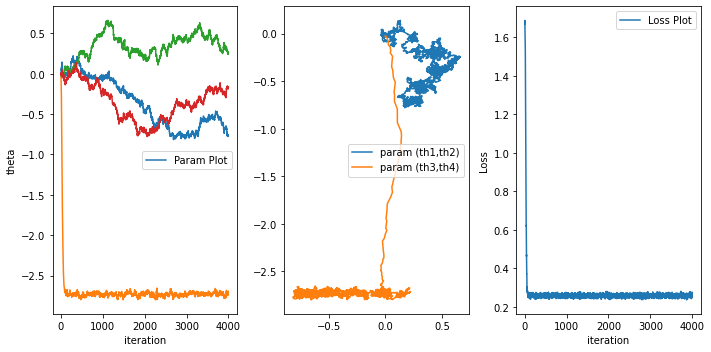

In [156]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
print('After 1000 iteration we have theta =',theta)
axes[0].plot(thdata)
axes[0].set_ylabel('theta')
axes[0].legend(['Param Plot'])
axes[0].set_xlabel('iteration')
axes[1].plot([item[2] for item in thdata],[item[3] for item in thdata],[item[0] for item in thdata],[item[1] for item in thdata])
axes[1].legend(['param (th1,th2)','param (th3,th4)'])

axes[2].plot(progress)
axes[2].legend(['Loss Plot'])
axes[2].set_ylabel('Loss')
axes[2].set_xlabel('iteration')
fig.tight_layout()    

## Two Qubit single data point

### c1=0.01(small movement) delta=0.3+ (small fluctuation)

In [157]:
progress=[];

thdata=[];
theta=[0,0,0,0];
c1=0.01   
delta=6
nshot=3000;
theta=np.array(theta)-SPSA(1,theta,c1,delta,nshot)
for ep in range(4000):
    delta=random.random()+0.3
    theta=theta-SPSA(1,theta,c1,delta,nshot)
    print(ep,"th iteration L=",lossCal2qubit(1,theta,nshot))
    progress.append(lossCal2qubit(1,theta,nshot))
    thdata.append(theta)

0 th iteration L= 1.6726666666666667
1 th iteration L= 1.6686666666666667
2 th iteration L= 1.6446666666666667
3 th iteration L= 1.6733333333333333
4 th iteration L= 1.6433333333333333
5 th iteration L= 1.6360000000000001
6 th iteration L= 1.6473333333333333
7 th iteration L= 1.6746666666666665
8 th iteration L= 1.6653333333333333
9 th iteration L= 1.638
10 th iteration L= 1.6033333333333335
11 th iteration L= 1.6373333333333333
12 th iteration L= 1.6613333333333333
13 th iteration L= 1.6733333333333333
14 th iteration L= 1.65
15 th iteration L= 1.6886666666666668
16 th iteration L= 1.6646666666666667
17 th iteration L= 1.63
18 th iteration L= 1.6433333333333333
19 th iteration L= 1.6333333333333333
20 th iteration L= 1.6413333333333333
21 th iteration L= 1.6213333333333333
22 th iteration L= 1.6360000000000001
23 th iteration L= 1.6226666666666667
24 th iteration L= 1.6346666666666667
25 th iteration L= 1.596
26 th iteration L= 1.6046666666666667
27 th iteration L= 1.5739999999999998


237 th iteration L= 0.33666666666666667
238 th iteration L= 0.3426666666666667
239 th iteration L= 0.3606666666666667
240 th iteration L= 0.32599999999999996
241 th iteration L= 0.32999999999999996
242 th iteration L= 0.30866666666666664
243 th iteration L= 0.30600000000000005
244 th iteration L= 0.32733333333333337
245 th iteration L= 0.30600000000000005
246 th iteration L= 0.30733333333333335
247 th iteration L= 0.2886666666666666
248 th iteration L= 0.29533333333333334
249 th iteration L= 0.33533333333333337
250 th iteration L= 0.28400000000000003
251 th iteration L= 0.2866666666666666
252 th iteration L= 0.31133333333333335
253 th iteration L= 0.2706666666666667
254 th iteration L= 0.29133333333333333
255 th iteration L= 0.30933333333333335
256 th iteration L= 0.29933333333333334
257 th iteration L= 0.30666666666666664
258 th iteration L= 0.29666666666666663
259 th iteration L= 0.29733333333333334
260 th iteration L= 0.2713333333333333
261 th iteration L= 0.29600000000000004
262 th

462 th iteration L= 0.248
463 th iteration L= 0.2826666666666666
464 th iteration L= 0.28933333333333333
465 th iteration L= 0.2713333333333333
466 th iteration L= 0.268
467 th iteration L= 0.2626666666666667
468 th iteration L= 0.242
469 th iteration L= 0.2573333333333333
470 th iteration L= 0.254
471 th iteration L= 0.2573333333333333
472 th iteration L= 0.264
473 th iteration L= 0.2673333333333333
474 th iteration L= 0.2646666666666667
475 th iteration L= 0.2586666666666667
476 th iteration L= 0.23199999999999998
477 th iteration L= 0.2706666666666667
478 th iteration L= 0.256
479 th iteration L= 0.254
480 th iteration L= 0.2673333333333333
481 th iteration L= 0.274
482 th iteration L= 0.2573333333333333
483 th iteration L= 0.2613333333333333
484 th iteration L= 0.22933333333333328
485 th iteration L= 0.262
486 th iteration L= 0.2593333333333333
487 th iteration L= 0.2513333333333333
488 th iteration L= 0.2386666666666667
489 th iteration L= 0.25
490 th iteration L= 0.24533333333333

702 th iteration L= 0.2726666666666666
703 th iteration L= 0.2733333333333333
704 th iteration L= 0.2746666666666666
705 th iteration L= 0.2753333333333333
706 th iteration L= 0.2733333333333333
707 th iteration L= 0.30666666666666664
708 th iteration L= 0.2693333333333333
709 th iteration L= 0.2846666666666666
710 th iteration L= 0.28
711 th iteration L= 0.2833333333333333
712 th iteration L= 0.29066666666666663
713 th iteration L= 0.28400000000000003
714 th iteration L= 0.2806666666666666
715 th iteration L= 0.272
716 th iteration L= 0.28200000000000003
717 th iteration L= 0.2673333333333333
718 th iteration L= 0.2666666666666667
719 th iteration L= 0.2793333333333333
720 th iteration L= 0.2653333333333333
721 th iteration L= 0.2846666666666666
722 th iteration L= 0.2786666666666666
723 th iteration L= 0.29600000000000004
724 th iteration L= 0.272
725 th iteration L= 0.2726666666666666
726 th iteration L= 0.2613333333333333
727 th iteration L= 0.2673333333333333
728 th iteration L= 0

930 th iteration L= 0.272
931 th iteration L= 0.2766666666666666
932 th iteration L= 0.2626666666666667
933 th iteration L= 0.2506666666666667
934 th iteration L= 0.2633333333333333
935 th iteration L= 0.26
936 th iteration L= 0.264
937 th iteration L= 0.2766666666666666
938 th iteration L= 0.2673333333333333
939 th iteration L= 0.2606666666666667
940 th iteration L= 0.274
941 th iteration L= 0.2553333333333333
942 th iteration L= 0.2633333333333333
943 th iteration L= 0.248
944 th iteration L= 0.2593333333333333
945 th iteration L= 0.2513333333333333
946 th iteration L= 0.2786666666666666
947 th iteration L= 0.2586666666666667
948 th iteration L= 0.2366666666666667
949 th iteration L= 0.2533333333333333
950 th iteration L= 0.2486666666666667
951 th iteration L= 0.2386666666666667
952 th iteration L= 0.2386666666666667
953 th iteration L= 0.2813333333333333
954 th iteration L= 0.2813333333333333
955 th iteration L= 0.2546666666666667
956 th iteration L= 0.2393333333333333
957 th iterat

1158 th iteration L= 0.2533333333333333
1159 th iteration L= 0.2746666666666666
1160 th iteration L= 0.2626666666666667
1161 th iteration L= 0.252
1162 th iteration L= 0.2653333333333333
1163 th iteration L= 0.238
1164 th iteration L= 0.278
1165 th iteration L= 0.2526666666666667
1166 th iteration L= 0.27
1167 th iteration L= 0.27
1168 th iteration L= 0.2766666666666666
1169 th iteration L= 0.2653333333333333
1170 th iteration L= 0.2853333333333333
1171 th iteration L= 0.254
1172 th iteration L= 0.2673333333333333
1173 th iteration L= 0.2386666666666667
1174 th iteration L= 0.244
1175 th iteration L= 0.2693333333333333
1176 th iteration L= 0.254
1177 th iteration L= 0.266
1178 th iteration L= 0.2453333333333333
1179 th iteration L= 0.2406666666666667
1180 th iteration L= 0.2673333333333333
1181 th iteration L= 0.2533333333333333
1182 th iteration L= 0.2573333333333333
1183 th iteration L= 0.258
1184 th iteration L= 0.2646666666666667
1185 th iteration L= 0.2706666666666667
1186 th iter

1385 th iteration L= 0.29333333333333333
1386 th iteration L= 0.2693333333333333
1387 th iteration L= 0.2593333333333333
1388 th iteration L= 0.29133333333333333
1389 th iteration L= 0.27
1390 th iteration L= 0.2646666666666667
1391 th iteration L= 0.2666666666666667
1392 th iteration L= 0.2593333333333333
1393 th iteration L= 0.2633333333333333
1394 th iteration L= 0.264
1395 th iteration L= 0.2546666666666667
1396 th iteration L= 0.2693333333333333
1397 th iteration L= 0.2733333333333333
1398 th iteration L= 0.264
1399 th iteration L= 0.2533333333333333
1400 th iteration L= 0.2526666666666667
1401 th iteration L= 0.2593333333333333
1402 th iteration L= 0.28
1403 th iteration L= 0.28600000000000003
1404 th iteration L= 0.258
1405 th iteration L= 0.2726666666666666
1406 th iteration L= 0.29333333333333333
1407 th iteration L= 0.2713333333333333
1408 th iteration L= 0.2733333333333333
1409 th iteration L= 0.2886666666666666
1410 th iteration L= 0.2393333333333333
1411 th iteration L= 0.

1610 th iteration L= 0.248
1611 th iteration L= 0.2533333333333333
1612 th iteration L= 0.238
1613 th iteration L= 0.254
1614 th iteration L= 0.2673333333333333
1615 th iteration L= 0.2773333333333333
1616 th iteration L= 0.2606666666666667
1617 th iteration L= 0.262
1618 th iteration L= 0.2613333333333333
1619 th iteration L= 0.2646666666666667
1620 th iteration L= 0.2573333333333333
1621 th iteration L= 0.266
1622 th iteration L= 0.254
1623 th iteration L= 0.2753333333333333
1624 th iteration L= 0.29466666666666663
1625 th iteration L= 0.2386666666666667
1626 th iteration L= 0.2753333333333333
1627 th iteration L= 0.246
1628 th iteration L= 0.2753333333333333
1629 th iteration L= 0.2473333333333333
1630 th iteration L= 0.2586666666666667
1631 th iteration L= 0.256
1632 th iteration L= 0.27
1633 th iteration L= 0.2686666666666667
1634 th iteration L= 0.2413333333333333
1635 th iteration L= 0.258
1636 th iteration L= 0.2713333333333333
1637 th iteration L= 0.2566666666666667
1638 th it

1844 th iteration L= 0.23533333333333328
1845 th iteration L= 0.2533333333333333
1846 th iteration L= 0.26
1847 th iteration L= 0.2726666666666666
1848 th iteration L= 0.236
1849 th iteration L= 0.2533333333333333
1850 th iteration L= 0.272
1851 th iteration L= 0.264
1852 th iteration L= 0.242
1853 th iteration L= 0.262
1854 th iteration L= 0.264
1855 th iteration L= 0.2473333333333333
1856 th iteration L= 0.258
1857 th iteration L= 0.29266666666666663
1858 th iteration L= 0.276
1859 th iteration L= 0.2633333333333333
1860 th iteration L= 0.2533333333333333
1861 th iteration L= 0.28
1862 th iteration L= 0.2713333333333333
1863 th iteration L= 0.252
1864 th iteration L= 0.2733333333333333
1865 th iteration L= 0.248
1866 th iteration L= 0.26
1867 th iteration L= 0.2533333333333333
1868 th iteration L= 0.2713333333333333
1869 th iteration L= 0.2453333333333333
1870 th iteration L= 0.266
1871 th iteration L= 0.2693333333333333
1872 th iteration L= 0.2866666666666666
1873 th iteration L= 0.

2072 th iteration L= 0.23533333333333328
2073 th iteration L= 0.274
2074 th iteration L= 0.2506666666666667
2075 th iteration L= 0.29466666666666663
2076 th iteration L= 0.2653333333333333
2077 th iteration L= 0.2573333333333333
2078 th iteration L= 0.2613333333333333
2079 th iteration L= 0.258
2080 th iteration L= 0.274
2081 th iteration L= 0.2666666666666667
2082 th iteration L= 0.266
2083 th iteration L= 0.2753333333333333
2084 th iteration L= 0.2713333333333333
2085 th iteration L= 0.2646666666666667
2086 th iteration L= 0.278
2087 th iteration L= 0.258
2088 th iteration L= 0.28
2089 th iteration L= 0.2486666666666667
2090 th iteration L= 0.268
2091 th iteration L= 0.2506666666666667
2092 th iteration L= 0.2613333333333333
2093 th iteration L= 0.2653333333333333
2094 th iteration L= 0.2473333333333333
2095 th iteration L= 0.2673333333333333
2096 th iteration L= 0.2546666666666667
2097 th iteration L= 0.264
2098 th iteration L= 0.2633333333333333
2099 th iteration L= 0.278
2100 th i

2303 th iteration L= 0.2666666666666667
2304 th iteration L= 0.2706666666666667
2305 th iteration L= 0.264
2306 th iteration L= 0.252
2307 th iteration L= 0.2666666666666667
2308 th iteration L= 0.2426666666666667
2309 th iteration L= 0.26
2310 th iteration L= 0.266
2311 th iteration L= 0.2553333333333333
2312 th iteration L= 0.2553333333333333
2313 th iteration L= 0.2533333333333333
2314 th iteration L= 0.2613333333333333
2315 th iteration L= 0.2593333333333333
2316 th iteration L= 0.2426666666666667
2317 th iteration L= 0.2593333333333333
2318 th iteration L= 0.268
2319 th iteration L= 0.2513333333333333
2320 th iteration L= 0.2586666666666667
2321 th iteration L= 0.24
2322 th iteration L= 0.2766666666666666
2323 th iteration L= 0.2613333333333333
2324 th iteration L= 0.2586666666666667
2325 th iteration L= 0.2573333333333333
2326 th iteration L= 0.29533333333333334
2327 th iteration L= 0.2606666666666667
2328 th iteration L= 0.23333333333333328
2329 th iteration L= 0.260666666666666

2533 th iteration L= 0.256
2534 th iteration L= 0.2486666666666667
2535 th iteration L= 0.2593333333333333
2536 th iteration L= 0.2733333333333333
2537 th iteration L= 0.2533333333333333
2538 th iteration L= 0.262
2539 th iteration L= 0.2466666666666667
2540 th iteration L= 0.278
2541 th iteration L= 0.2646666666666667
2542 th iteration L= 0.2433333333333333
2543 th iteration L= 0.2546666666666667
2544 th iteration L= 0.256
2545 th iteration L= 0.2606666666666667
2546 th iteration L= 0.2633333333333333
2547 th iteration L= 0.2553333333333333
2548 th iteration L= 0.2466666666666667
2549 th iteration L= 0.262
2550 th iteration L= 0.2653333333333333
2551 th iteration L= 0.28200000000000003
2552 th iteration L= 0.2573333333333333
2553 th iteration L= 0.2526666666666667
2554 th iteration L= 0.266
2555 th iteration L= 0.2866666666666666
2556 th iteration L= 0.2686666666666667
2557 th iteration L= 0.2473333333333333
2558 th iteration L= 0.2666666666666667
2559 th iteration L= 0.26666666666666

2758 th iteration L= 0.2653333333333333
2759 th iteration L= 0.2553333333333333
2760 th iteration L= 0.256
2761 th iteration L= 0.2573333333333333
2762 th iteration L= 0.2553333333333333
2763 th iteration L= 0.2566666666666667
2764 th iteration L= 0.2713333333333333
2765 th iteration L= 0.25
2766 th iteration L= 0.2386666666666667
2767 th iteration L= 0.24
2768 th iteration L= 0.258
2769 th iteration L= 0.276
2770 th iteration L= 0.254
2771 th iteration L= 0.2533333333333333
2772 th iteration L= 0.2546666666666667
2773 th iteration L= 0.258
2774 th iteration L= 0.2553333333333333
2775 th iteration L= 0.274
2776 th iteration L= 0.244
2777 th iteration L= 0.2633333333333333
2778 th iteration L= 0.274
2779 th iteration L= 0.2686666666666667
2780 th iteration L= 0.23199999999999998
2781 th iteration L= 0.252
2782 th iteration L= 0.2386666666666667
2783 th iteration L= 0.2673333333333333
2784 th iteration L= 0.2773333333333333
2785 th iteration L= 0.2673333333333333
2786 th iteration L= 0.2

2985 th iteration L= 0.2686666666666667
2986 th iteration L= 0.262
2987 th iteration L= 0.2593333333333333
2988 th iteration L= 0.2626666666666667
2989 th iteration L= 0.23733333333333329
2990 th iteration L= 0.2766666666666666
2991 th iteration L= 0.29133333333333333
2992 th iteration L= 0.27
2993 th iteration L= 0.2673333333333333
2994 th iteration L= 0.2493333333333333
2995 th iteration L= 0.246
2996 th iteration L= 0.2526666666666667
2997 th iteration L= 0.2686666666666667
2998 th iteration L= 0.2746666666666666
2999 th iteration L= 0.2473333333333333
3000 th iteration L= 0.2753333333333333
3001 th iteration L= 0.2626666666666667
3002 th iteration L= 0.2606666666666667
3003 th iteration L= 0.264
3004 th iteration L= 0.242
3005 th iteration L= 0.2713333333333333
3006 th iteration L= 0.2566666666666667
3007 th iteration L= 0.256
3008 th iteration L= 0.254
3009 th iteration L= 0.2546666666666667
3010 th iteration L= 0.272
3011 th iteration L= 0.2693333333333333
3012 th iteration L= 0.

3213 th iteration L= 0.2793333333333333
3214 th iteration L= 0.2546666666666667
3215 th iteration L= 0.2626666666666667
3216 th iteration L= 0.2506666666666667
3217 th iteration L= 0.2773333333333333
3218 th iteration L= 0.248
3219 th iteration L= 0.2653333333333333
3220 th iteration L= 0.238
3221 th iteration L= 0.2513333333333333
3222 th iteration L= 0.2413333333333333
3223 th iteration L= 0.2606666666666667
3224 th iteration L= 0.268
3225 th iteration L= 0.2733333333333333
3226 th iteration L= 0.2633333333333333
3227 th iteration L= 0.2653333333333333
3228 th iteration L= 0.2413333333333333
3229 th iteration L= 0.2606666666666667
3230 th iteration L= 0.2486666666666667
3231 th iteration L= 0.29133333333333333
3232 th iteration L= 0.2486666666666667
3233 th iteration L= 0.2713333333333333
3234 th iteration L= 0.256
3235 th iteration L= 0.2826666666666666
3236 th iteration L= 0.2733333333333333
3237 th iteration L= 0.2526666666666667
3238 th iteration L= 0.252
3239 th iteration L= 0.2

3444 th iteration L= 0.22466666666666668
3445 th iteration L= 0.2546666666666667
3446 th iteration L= 0.262
3447 th iteration L= 0.2773333333333333
3448 th iteration L= 0.2413333333333333
3449 th iteration L= 0.254
3450 th iteration L= 0.29000000000000004
3451 th iteration L= 0.2786666666666666
3452 th iteration L= 0.2686666666666667
3453 th iteration L= 0.2573333333333333
3454 th iteration L= 0.26
3455 th iteration L= 0.2413333333333333
3456 th iteration L= 0.2433333333333333
3457 th iteration L= 0.2546666666666667
3458 th iteration L= 0.23133333333333328
3459 th iteration L= 0.2706666666666667
3460 th iteration L= 0.2693333333333333
3461 th iteration L= 0.2666666666666667
3462 th iteration L= 0.2733333333333333
3463 th iteration L= 0.278
3464 th iteration L= 0.2566666666666667
3465 th iteration L= 0.26
3466 th iteration L= 0.274
3467 th iteration L= 0.276
3468 th iteration L= 0.2753333333333333
3469 th iteration L= 0.276
3470 th iteration L= 0.26
3471 th iteration L= 0.26533333333333

3668 th iteration L= 0.264
3669 th iteration L= 0.29466666666666663
3670 th iteration L= 0.254
3671 th iteration L= 0.2486666666666667
3672 th iteration L= 0.2613333333333333
3673 th iteration L= 0.246
3674 th iteration L= 0.264
3675 th iteration L= 0.266
3676 th iteration L= 0.266
3677 th iteration L= 0.2366666666666667
3678 th iteration L= 0.2753333333333333
3679 th iteration L= 0.2706666666666667
3680 th iteration L= 0.2493333333333333
3681 th iteration L= 0.248
3682 th iteration L= 0.2453333333333333
3683 th iteration L= 0.2653333333333333
3684 th iteration L= 0.2413333333333333
3685 th iteration L= 0.252
3686 th iteration L= 0.2533333333333333
3687 th iteration L= 0.256
3688 th iteration L= 0.2813333333333333
3689 th iteration L= 0.258
3690 th iteration L= 0.2633333333333333
3691 th iteration L= 0.2633333333333333
3692 th iteration L= 0.2746666666666666
3693 th iteration L= 0.2613333333333333
3694 th iteration L= 0.254
3695 th iteration L= 0.266
3696 th iteration L= 0.254666666666

3902 th iteration L= 0.2686666666666667
3903 th iteration L= 0.2626666666666667
3904 th iteration L= 0.2513333333333333
3905 th iteration L= 0.2486666666666667
3906 th iteration L= 0.2806666666666666
3907 th iteration L= 0.2693333333333333
3908 th iteration L= 0.2513333333333333
3909 th iteration L= 0.2446666666666667
3910 th iteration L= 0.2566666666666667
3911 th iteration L= 0.252
3912 th iteration L= 0.23399999999999999
3913 th iteration L= 0.2673333333333333
3914 th iteration L= 0.2693333333333333
3915 th iteration L= 0.2713333333333333
3916 th iteration L= 0.2673333333333333
3917 th iteration L= 0.2846666666666666
3918 th iteration L= 0.2526666666666667
3919 th iteration L= 0.25
3920 th iteration L= 0.248
3921 th iteration L= 0.248
3922 th iteration L= 0.258
3923 th iteration L= 0.2573333333333333
3924 th iteration L= 0.2646666666666667
3925 th iteration L= 0.268
3926 th iteration L= 0.2593333333333333
3927 th iteration L= 0.254
3928 th iteration L= 0.23533333333333328
3929 th it

After 1000 iteration we have theta = [ 0.35167368 -2.75101446 -1.66286682  0.72911323]


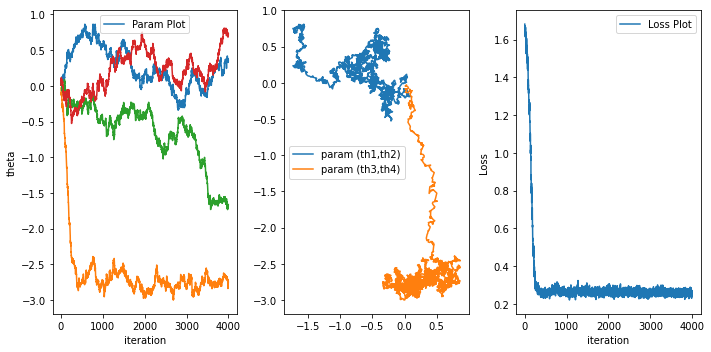

In [158]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
print('After 1000 iteration we have theta =',theta)
axes[0].plot(thdata)
axes[0].set_ylabel('theta')
axes[0].legend(['Param Plot'])
axes[0].set_xlabel('iteration')
axes[1].plot([item[2] for item in thdata],[item[3] for item in thdata],[item[0] for item in thdata],[item[1] for item in thdata])
axes[1].legend(['param (th1,th2)','param (th3,th4)'])

axes[2].plot(progress)
axes[2].legend(['Loss Plot'])
axes[2].set_ylabel('Loss')
axes[2].set_xlabel('iteration')
fig.tight_layout()

### c1=0.01(small movement) delta=0.1+ (medium fluctuation)

In [159]:
progress=[];
theta=[0,0,0,0];
thdata=[];

c1=0.01   
delta=6
nshot=3000;
theta=np.array(theta)-SPSA(1,theta,c1,delta,nshot)
for ep in range(4000):
    delta=random.random()+0.1
    theta=theta-SPSA(1,theta,c1,delta,nshot)
    print(ep,"th iteration L=",lossCal2qubit(1,theta,nshot))
    progress.append(lossCal2qubit(1,theta,nshot))
    thdata.append(theta)

0 th iteration L= 1.6973333333333334
1 th iteration L= 1.692
2 th iteration L= 1.6733333333333333
3 th iteration L= 1.6853333333333333
4 th iteration L= 1.6653333333333333
5 th iteration L= 1.6706666666666665
6 th iteration L= 1.6586666666666665
7 th iteration L= 1.688
8 th iteration L= 1.6526666666666667
9 th iteration L= 1.6393333333333333
10 th iteration L= 1.6413333333333333
11 th iteration L= 1.6453333333333333
12 th iteration L= 1.6426666666666667
13 th iteration L= 1.654
14 th iteration L= 1.6406666666666667
15 th iteration L= 1.6413333333333333
16 th iteration L= 1.6640000000000001
17 th iteration L= 1.6466666666666665
18 th iteration L= 1.6133333333333333
19 th iteration L= 1.616
20 th iteration L= 1.6066666666666667
21 th iteration L= 1.5966666666666667
22 th iteration L= 1.592
23 th iteration L= 1.5993333333333335
24 th iteration L= 1.6086666666666667
25 th iteration L= 1.6013333333333333
26 th iteration L= 1.6
27 th iteration L= 1.5613333333333332
28 th iteration L= 1.58733

228 th iteration L= 0.3993333333333333
229 th iteration L= 0.368
230 th iteration L= 0.33999999999999997
231 th iteration L= 0.3433333333333334
232 th iteration L= 0.3893333333333333
233 th iteration L= 0.3493333333333334
234 th iteration L= 0.3433333333333334
235 th iteration L= 0.3506666666666667
236 th iteration L= 0.382
237 th iteration L= 0.3426666666666667
238 th iteration L= 0.356
239 th iteration L= 0.32599999999999996
240 th iteration L= 0.33466666666666667
241 th iteration L= 0.30400000000000005
242 th iteration L= 0.29066666666666663
243 th iteration L= 0.30266666666666664
244 th iteration L= 0.31266666666666665
245 th iteration L= 0.3406666666666667
246 th iteration L= 0.29933333333333334
247 th iteration L= 0.30933333333333335
248 th iteration L= 0.30266666666666664
249 th iteration L= 0.30466666666666664
250 th iteration L= 0.30600000000000005
251 th iteration L= 0.29866666666666664
252 th iteration L= 0.30800000000000005
253 th iteration L= 0.31666666666666665
254 th ite

462 th iteration L= 0.2553333333333333
463 th iteration L= 0.2793333333333333
464 th iteration L= 0.2706666666666667
465 th iteration L= 0.238
466 th iteration L= 0.2626666666666667
467 th iteration L= 0.2466666666666667
468 th iteration L= 0.2673333333333333
469 th iteration L= 0.2666666666666667
470 th iteration L= 0.2406666666666667
471 th iteration L= 0.26
472 th iteration L= 0.2586666666666667
473 th iteration L= 0.2566666666666667
474 th iteration L= 0.264
475 th iteration L= 0.2566666666666667
476 th iteration L= 0.262
477 th iteration L= 0.278
478 th iteration L= 0.2426666666666667
479 th iteration L= 0.2733333333333333
480 th iteration L= 0.258
481 th iteration L= 0.252
482 th iteration L= 0.2806666666666666
483 th iteration L= 0.2486666666666667
484 th iteration L= 0.256
485 th iteration L= 0.2626666666666667
486 th iteration L= 0.2633333333333333
487 th iteration L= 0.264
488 th iteration L= 0.2453333333333333
489 th iteration L= 0.2413333333333333
490 th iteration L= 0.258


696 th iteration L= 0.2673333333333333
697 th iteration L= 0.2406666666666667
698 th iteration L= 0.2626666666666667
699 th iteration L= 0.258
700 th iteration L= 0.2553333333333333
701 th iteration L= 0.254
702 th iteration L= 0.2633333333333333
703 th iteration L= 0.2513333333333333
704 th iteration L= 0.252
705 th iteration L= 0.2793333333333333
706 th iteration L= 0.242
707 th iteration L= 0.25
708 th iteration L= 0.2626666666666667
709 th iteration L= 0.2606666666666667
710 th iteration L= 0.2726666666666666
711 th iteration L= 0.2413333333333333
712 th iteration L= 0.2633333333333333
713 th iteration L= 0.268
714 th iteration L= 0.2526666666666667
715 th iteration L= 0.248
716 th iteration L= 0.2626666666666667
717 th iteration L= 0.2466666666666667
718 th iteration L= 0.2393333333333333
719 th iteration L= 0.2486666666666667
720 th iteration L= 0.258
721 th iteration L= 0.2773333333333333
722 th iteration L= 0.2693333333333333
723 th iteration L= 0.28
724 th iteration L= 0.24133

930 th iteration L= 0.2626666666666667
931 th iteration L= 0.29000000000000004
932 th iteration L= 0.2706666666666667
933 th iteration L= 0.29200000000000004
934 th iteration L= 0.272
935 th iteration L= 0.266
936 th iteration L= 0.2606666666666667
937 th iteration L= 0.2806666666666666
938 th iteration L= 0.2686666666666667
939 th iteration L= 0.28800000000000003
940 th iteration L= 0.2753333333333333
941 th iteration L= 0.29200000000000004
942 th iteration L= 0.28800000000000003
943 th iteration L= 0.2733333333333333
944 th iteration L= 0.2786666666666666
945 th iteration L= 0.29066666666666663
946 th iteration L= 0.29600000000000004
947 th iteration L= 0.30266666666666664
948 th iteration L= 0.32533333333333336
949 th iteration L= 0.31200000000000006
950 th iteration L= 0.32666666666666666
951 th iteration L= 0.31399999999999995
952 th iteration L= 0.3693333333333333
953 th iteration L= 0.3626666666666667
954 th iteration L= 0.3433333333333334
955 th iteration L= 0.3526666666666667


1155 th iteration L= 0.266
1156 th iteration L= 0.2773333333333333
1157 th iteration L= 0.264
1158 th iteration L= 0.2486666666666667
1159 th iteration L= 0.268
1160 th iteration L= 0.2513333333333333
1161 th iteration L= 0.2606666666666667
1162 th iteration L= 0.2546666666666667
1163 th iteration L= 0.2553333333333333
1164 th iteration L= 0.2506666666666667
1165 th iteration L= 0.2486666666666667
1166 th iteration L= 0.2586666666666667
1167 th iteration L= 0.28600000000000003
1168 th iteration L= 0.274
1169 th iteration L= 0.2826666666666666
1170 th iteration L= 0.264
1171 th iteration L= 0.2673333333333333
1172 th iteration L= 0.2453333333333333
1173 th iteration L= 0.2626666666666667
1174 th iteration L= 0.2566666666666667
1175 th iteration L= 0.2813333333333333
1176 th iteration L= 0.27
1177 th iteration L= 0.248
1178 th iteration L= 0.2686666666666667
1179 th iteration L= 0.264
1180 th iteration L= 0.2593333333333333
1181 th iteration L= 0.2626666666666667
1182 th iteration L= 0.2

1385 th iteration L= 0.244
1386 th iteration L= 0.29400000000000004
1387 th iteration L= 0.2626666666666667
1388 th iteration L= 0.2653333333333333
1389 th iteration L= 0.27
1390 th iteration L= 0.2666666666666667
1391 th iteration L= 0.25
1392 th iteration L= 0.2726666666666666
1393 th iteration L= 0.266
1394 th iteration L= 0.2633333333333333
1395 th iteration L= 0.2506666666666667
1396 th iteration L= 0.2606666666666667
1397 th iteration L= 0.2606666666666667
1398 th iteration L= 0.2573333333333333
1399 th iteration L= 0.2473333333333333
1400 th iteration L= 0.256
1401 th iteration L= 0.2826666666666666
1402 th iteration L= 0.2506666666666667
1403 th iteration L= 0.2726666666666666
1404 th iteration L= 0.2533333333333333
1405 th iteration L= 0.2646666666666667
1406 th iteration L= 0.246
1407 th iteration L= 0.278
1408 th iteration L= 0.252
1409 th iteration L= 0.24
1410 th iteration L= 0.2466666666666667
1411 th iteration L= 0.276
1412 th iteration L= 0.262
1413 th iteration L= 0.27

1615 th iteration L= 0.2486666666666667
1616 th iteration L= 0.278
1617 th iteration L= 0.2646666666666667
1618 th iteration L= 0.254
1619 th iteration L= 0.2693333333333333
1620 th iteration L= 0.272
1621 th iteration L= 0.27
1622 th iteration L= 0.2846666666666666
1623 th iteration L= 0.254
1624 th iteration L= 0.2533333333333333
1625 th iteration L= 0.2746666666666666
1626 th iteration L= 0.258
1627 th iteration L= 0.268
1628 th iteration L= 0.2553333333333333
1629 th iteration L= 0.2566666666666667
1630 th iteration L= 0.2553333333333333
1631 th iteration L= 0.268
1632 th iteration L= 0.2533333333333333
1633 th iteration L= 0.24
1634 th iteration L= 0.2833333333333333
1635 th iteration L= 0.274
1636 th iteration L= 0.278
1637 th iteration L= 0.2426666666666667
1638 th iteration L= 0.2586666666666667
1639 th iteration L= 0.2726666666666666
1640 th iteration L= 0.2773333333333333
1641 th iteration L= 0.2466666666666667
1642 th iteration L= 0.2566666666666667
1643 th iteration L= 0.24

1844 th iteration L= 0.2393333333333333
1845 th iteration L= 0.2473333333333333
1846 th iteration L= 0.2593333333333333
1847 th iteration L= 0.28200000000000003
1848 th iteration L= 0.2506666666666667
1849 th iteration L= 0.2473333333333333
1850 th iteration L= 0.2693333333333333
1851 th iteration L= 0.27
1852 th iteration L= 0.272
1853 th iteration L= 0.2666666666666667
1854 th iteration L= 0.2726666666666666
1855 th iteration L= 0.272
1856 th iteration L= 0.2606666666666667
1857 th iteration L= 0.262
1858 th iteration L= 0.2593333333333333
1859 th iteration L= 0.2486666666666667
1860 th iteration L= 0.2746666666666666
1861 th iteration L= 0.2713333333333333
1862 th iteration L= 0.2593333333333333
1863 th iteration L= 0.276
1864 th iteration L= 0.28733333333333333
1865 th iteration L= 0.254
1866 th iteration L= 0.248
1867 th iteration L= 0.266
1868 th iteration L= 0.27
1869 th iteration L= 0.238
1870 th iteration L= 0.248
1871 th iteration L= 0.2486666666666667
1872 th iteration L= 0.

2075 th iteration L= 0.2573333333333333
2076 th iteration L= 0.2786666666666666
2077 th iteration L= 0.2633333333333333
2078 th iteration L= 0.2546666666666667
2079 th iteration L= 0.268
2080 th iteration L= 0.2433333333333333
2081 th iteration L= 0.23533333333333328
2082 th iteration L= 0.2753333333333333
2083 th iteration L= 0.2506666666666667
2084 th iteration L= 0.276
2085 th iteration L= 0.2426666666666667
2086 th iteration L= 0.2426666666666667
2087 th iteration L= 0.2593333333333333
2088 th iteration L= 0.266
2089 th iteration L= 0.2533333333333333
2090 th iteration L= 0.2633333333333333
2091 th iteration L= 0.238
2092 th iteration L= 0.252
2093 th iteration L= 0.2533333333333333
2094 th iteration L= 0.26
2095 th iteration L= 0.2613333333333333
2096 th iteration L= 0.248
2097 th iteration L= 0.246
2098 th iteration L= 0.2633333333333333
2099 th iteration L= 0.276
2100 th iteration L= 0.2546666666666667
2101 th iteration L= 0.246
2102 th iteration L= 0.2706666666666667
2103 th it

2300 th iteration L= 0.2693333333333333
2301 th iteration L= 0.2653333333333333
2302 th iteration L= 0.2666666666666667
2303 th iteration L= 0.256
2304 th iteration L= 0.2593333333333333
2305 th iteration L= 0.2506666666666667
2306 th iteration L= 0.2653333333333333
2307 th iteration L= 0.278
2308 th iteration L= 0.266
2309 th iteration L= 0.2526666666666667
2310 th iteration L= 0.23199999999999998
2311 th iteration L= 0.28933333333333333
2312 th iteration L= 0.2553333333333333
2313 th iteration L= 0.2633333333333333
2314 th iteration L= 0.2633333333333333
2315 th iteration L= 0.2506666666666667
2316 th iteration L= 0.2653333333333333
2317 th iteration L= 0.2653333333333333
2318 th iteration L= 0.2586666666666667
2319 th iteration L= 0.2733333333333333
2320 th iteration L= 0.2726666666666666
2321 th iteration L= 0.2393333333333333
2322 th iteration L= 0.26
2323 th iteration L= 0.2413333333333333
2324 th iteration L= 0.2673333333333333
2325 th iteration L= 0.244
2326 th iteration L= 0.2

2524 th iteration L= 0.27
2525 th iteration L= 0.28600000000000003
2526 th iteration L= 0.2573333333333333
2527 th iteration L= 0.2653333333333333
2528 th iteration L= 0.2573333333333333
2529 th iteration L= 0.2533333333333333
2530 th iteration L= 0.268
2531 th iteration L= 0.2306666666666667
2532 th iteration L= 0.27
2533 th iteration L= 0.28400000000000003
2534 th iteration L= 0.2753333333333333
2535 th iteration L= 0.2573333333333333
2536 th iteration L= 0.2513333333333333
2537 th iteration L= 0.272
2538 th iteration L= 0.2633333333333333
2539 th iteration L= 0.2686666666666667
2540 th iteration L= 0.2653333333333333
2541 th iteration L= 0.2466666666666667
2542 th iteration L= 0.2553333333333333
2543 th iteration L= 0.2506666666666667
2544 th iteration L= 0.258
2545 th iteration L= 0.2506666666666667
2546 th iteration L= 0.264
2547 th iteration L= 0.2553333333333333
2548 th iteration L= 0.28600000000000003
2549 th iteration L= 0.28600000000000003
2550 th iteration L= 0.2633333333333

2746 th iteration L= 0.266
2747 th iteration L= 0.28400000000000003
2748 th iteration L= 0.266
2749 th iteration L= 0.23533333333333328
2750 th iteration L= 0.2446666666666667
2751 th iteration L= 0.2573333333333333
2752 th iteration L= 0.264
2753 th iteration L= 0.2566666666666667
2754 th iteration L= 0.2646666666666667
2755 th iteration L= 0.2706666666666667
2756 th iteration L= 0.2753333333333333
2757 th iteration L= 0.246
2758 th iteration L= 0.2513333333333333
2759 th iteration L= 0.28
2760 th iteration L= 0.2606666666666667
2761 th iteration L= 0.2673333333333333
2762 th iteration L= 0.236
2763 th iteration L= 0.2666666666666667
2764 th iteration L= 0.2606666666666667
2765 th iteration L= 0.2586666666666667
2766 th iteration L= 0.2733333333333333
2767 th iteration L= 0.25
2768 th iteration L= 0.2593333333333333
2769 th iteration L= 0.25
2770 th iteration L= 0.2493333333333333
2771 th iteration L= 0.2693333333333333
2772 th iteration L= 0.2626666666666667
2773 th iteration L= 0.24

2971 th iteration L= 0.2853333333333333
2972 th iteration L= 0.25
2973 th iteration L= 0.2526666666666667
2974 th iteration L= 0.2666666666666667
2975 th iteration L= 0.2666666666666667
2976 th iteration L= 0.2646666666666667
2977 th iteration L= 0.2773333333333333
2978 th iteration L= 0.23733333333333329
2979 th iteration L= 0.2326666666666667
2980 th iteration L= 0.2386666666666667
2981 th iteration L= 0.2506666666666667
2982 th iteration L= 0.2566666666666667
2983 th iteration L= 0.248
2984 th iteration L= 0.2526666666666667
2985 th iteration L= 0.2746666666666666
2986 th iteration L= 0.254
2987 th iteration L= 0.23533333333333328
2988 th iteration L= 0.2653333333333333
2989 th iteration L= 0.2513333333333333
2990 th iteration L= 0.2653333333333333
2991 th iteration L= 0.2606666666666667
2992 th iteration L= 0.2573333333333333
2993 th iteration L= 0.2646666666666667
2994 th iteration L= 0.28733333333333333
2995 th iteration L= 0.23533333333333328
2996 th iteration L= 0.2353333333333

3198 th iteration L= 0.2693333333333333
3199 th iteration L= 0.248
3200 th iteration L= 0.2866666666666666
3201 th iteration L= 0.2386666666666667
3202 th iteration L= 0.276
3203 th iteration L= 0.2626666666666667
3204 th iteration L= 0.2693333333333333
3205 th iteration L= 0.276
3206 th iteration L= 0.278
3207 th iteration L= 0.268
3208 th iteration L= 0.2773333333333333
3209 th iteration L= 0.2606666666666667
3210 th iteration L= 0.262
3211 th iteration L= 0.242
3212 th iteration L= 0.2786666666666666
3213 th iteration L= 0.2593333333333333
3214 th iteration L= 0.252
3215 th iteration L= 0.2506666666666667
3216 th iteration L= 0.256
3217 th iteration L= 0.272
3218 th iteration L= 0.2393333333333333
3219 th iteration L= 0.2466666666666667
3220 th iteration L= 0.2866666666666666
3221 th iteration L= 0.2366666666666667
3222 th iteration L= 0.2653333333333333
3223 th iteration L= 0.2533333333333333
3224 th iteration L= 0.248
3225 th iteration L= 0.2533333333333333
3226 th iteration L= 0.

3425 th iteration L= 0.2653333333333333
3426 th iteration L= 0.2533333333333333
3427 th iteration L= 0.2773333333333333
3428 th iteration L= 0.27
3429 th iteration L= 0.2573333333333333
3430 th iteration L= 0.2473333333333333
3431 th iteration L= 0.27
3432 th iteration L= 0.2533333333333333
3433 th iteration L= 0.266
3434 th iteration L= 0.26
3435 th iteration L= 0.2853333333333333
3436 th iteration L= 0.2826666666666666
3437 th iteration L= 0.2586666666666667
3438 th iteration L= 0.274
3439 th iteration L= 0.28600000000000003
3440 th iteration L= 0.2633333333333333
3441 th iteration L= 0.274
3442 th iteration L= 0.28933333333333333
3443 th iteration L= 0.28600000000000003
3444 th iteration L= 0.2673333333333333
3445 th iteration L= 0.27
3446 th iteration L= 0.2666666666666667
3447 th iteration L= 0.254
3448 th iteration L= 0.2493333333333333
3449 th iteration L= 0.276
3450 th iteration L= 0.2866666666666666
3451 th iteration L= 0.2493333333333333
3452 th iteration L= 0.269333333333333

3656 th iteration L= 0.2713333333333333
3657 th iteration L= 0.2533333333333333
3658 th iteration L= 0.252
3659 th iteration L= 0.2713333333333333
3660 th iteration L= 0.272
3661 th iteration L= 0.252
3662 th iteration L= 0.2573333333333333
3663 th iteration L= 0.2393333333333333
3664 th iteration L= 0.2706666666666667
3665 th iteration L= 0.244
3666 th iteration L= 0.2546666666666667
3667 th iteration L= 0.2546666666666667
3668 th iteration L= 0.2613333333333333
3669 th iteration L= 0.256
3670 th iteration L= 0.2686666666666667
3671 th iteration L= 0.2606666666666667
3672 th iteration L= 0.272
3673 th iteration L= 0.2813333333333333
3674 th iteration L= 0.2686666666666667
3675 th iteration L= 0.268
3676 th iteration L= 0.2713333333333333
3677 th iteration L= 0.2673333333333333
3678 th iteration L= 0.262
3679 th iteration L= 0.2626666666666667
3680 th iteration L= 0.2626666666666667
3681 th iteration L= 0.254
3682 th iteration L= 0.2613333333333333
3683 th iteration L= 0.24866666666666

3886 th iteration L= 0.2773333333333333
3887 th iteration L= 0.2673333333333333
3888 th iteration L= 0.2806666666666666
3889 th iteration L= 0.2606666666666667
3890 th iteration L= 0.2866666666666666
3891 th iteration L= 0.2586666666666667
3892 th iteration L= 0.28200000000000003
3893 th iteration L= 0.2626666666666667
3894 th iteration L= 0.2726666666666666
3895 th iteration L= 0.2793333333333333
3896 th iteration L= 0.2566666666666667
3897 th iteration L= 0.2666666666666667
3898 th iteration L= 0.28200000000000003
3899 th iteration L= 0.2706666666666667
3900 th iteration L= 0.244
3901 th iteration L= 0.264
3902 th iteration L= 0.26
3903 th iteration L= 0.2506666666666667
3904 th iteration L= 0.2626666666666667
3905 th iteration L= 0.2586666666666667
3906 th iteration L= 0.2726666666666666
3907 th iteration L= 0.2406666666666667
3908 th iteration L= 0.262
3909 th iteration L= 0.2706666666666667
3910 th iteration L= 0.2593333333333333
3911 th iteration L= 0.2433333333333333
3912 th ite

After 1000 iteration we have theta = [ 2.68933459 -2.81553331 -1.58911096  0.06151941]


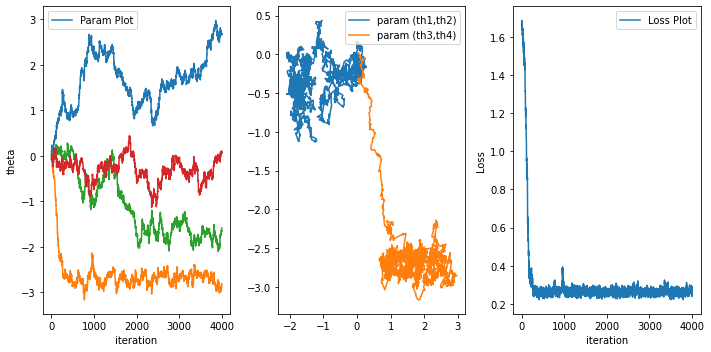

In [160]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
print('After 1000 iteration we have theta =',theta)
axes[0].plot(thdata)
axes[0].set_ylabel('theta')
axes[0].legend(['Param Plot'])
axes[0].set_xlabel('iteration')
axes[1].plot([item[2] for item in thdata],[item[3] for item in thdata],[item[0] for item in thdata],[item[1] for item in thdata])
axes[1].legend(['param (th1,th2)','param (th3,th4)'])

axes[2].plot(progress)
axes[2].legend(['Loss Plot'])
axes[2].set_ylabel('Loss')
axes[2].set_xlabel('iteration')
fig.tight_layout()

### c1=0.01(small movement) delta=0+ (Large fluctuation)

In [161]:
progress=[];
theta=[0,0,0,0];
thdata=[];

c1=0.01   
delta=6
nshot=3000;
theta=np.array(theta)-SPSA(1,theta,c1,delta,nshot)
for ep in range(4000):
    delta=random.random()
    theta=theta-SPSA(1,theta,c1,delta,nshot)
    print(ep,"th iteration L=",lossCal2qubit(1,theta,nshot))
    progress.append(lossCal2qubit(1,theta,nshot))
    thdata.append(theta)

0 th iteration L= 1.6800000000000002
1 th iteration L= 1.6760000000000002
2 th iteration L= 1.6560000000000001
3 th iteration L= 1.6633333333333333
4 th iteration L= 1.6786666666666665
5 th iteration L= 1.6773333333333333
6 th iteration L= 1.6666666666666665
7 th iteration L= 1.6600000000000001
8 th iteration L= 1.69
9 th iteration L= 1.658
10 th iteration L= 1.6633333333333333
11 th iteration L= 1.638
12 th iteration L= 1.6513333333333333
13 th iteration L= 1.6146666666666667
14 th iteration L= 1.6440000000000001
15 th iteration L= 1.6393333333333333
16 th iteration L= 1.604
17 th iteration L= 1.6306666666666667
18 th iteration L= 1.6113333333333333
19 th iteration L= 1.6206666666666667
20 th iteration L= 1.6333333333333333
21 th iteration L= 1.6153333333333333
22 th iteration L= 1.588
23 th iteration L= 1.6206666666666667
24 th iteration L= 1.5979999999999999
25 th iteration L= 1.6113333333333333
26 th iteration L= 1.572
27 th iteration L= 1.6046666666666667
28 th iteration L= 1.6053

237 th iteration L= 0.4813333333333333
238 th iteration L= 0.4733333333333334
239 th iteration L= 0.5246666666666666
240 th iteration L= 0.4946666666666667
241 th iteration L= 0.4933333333333333
242 th iteration L= 0.4826666666666667
243 th iteration L= 0.5113333333333333
244 th iteration L= 0.506
245 th iteration L= 0.5306666666666666
246 th iteration L= 0.5146666666666666
247 th iteration L= 0.4746666666666667
248 th iteration L= 0.5206666666666666
249 th iteration L= 0.5473333333333333
250 th iteration L= 0.542
251 th iteration L= 0.5326666666666666
252 th iteration L= 0.5
253 th iteration L= 0.502
254 th iteration L= 0.504
255 th iteration L= 0.4746666666666667
256 th iteration L= 0.4806666666666667
257 th iteration L= 0.45866666666666667
258 th iteration L= 0.4613333333333334
259 th iteration L= 0.46199999999999997
260 th iteration L= 0.44733333333333336
261 th iteration L= 0.546
262 th iteration L= 0.4633333333333334
263 th iteration L= 0.4613333333333334
264 th iteration L= 0.46

465 th iteration L= 0.2866666666666666
466 th iteration L= 0.29000000000000004
467 th iteration L= 0.2693333333333333
468 th iteration L= 0.278
469 th iteration L= 0.22666666666666668
470 th iteration L= 0.29000000000000004
471 th iteration L= 0.29000000000000004
472 th iteration L= 0.26
473 th iteration L= 0.2646666666666667
474 th iteration L= 0.2766666666666666
475 th iteration L= 0.268
476 th iteration L= 0.2826666666666666
477 th iteration L= 0.2573333333333333
478 th iteration L= 0.2713333333333333
479 th iteration L= 0.2666666666666667
480 th iteration L= 0.2673333333333333
481 th iteration L= 0.2593333333333333
482 th iteration L= 0.2413333333333333
483 th iteration L= 0.268
484 th iteration L= 0.2546666666666667
485 th iteration L= 0.28400000000000003
486 th iteration L= 0.25
487 th iteration L= 0.264
488 th iteration L= 1.424
489 th iteration L= 1.418
490 th iteration L= 1.3780000000000001
491 th iteration L= 1.388
492 th iteration L= 1.3333333333333333
493 th iteration L= 1.

696 th iteration L= 0.272
697 th iteration L= 0.31066666666666665
698 th iteration L= 0.2733333333333333
699 th iteration L= 0.2613333333333333
700 th iteration L= 0.29000000000000004
701 th iteration L= 0.31466666666666665
702 th iteration L= 0.28800000000000003
703 th iteration L= 0.2793333333333333
704 th iteration L= 0.2886666666666666
705 th iteration L= 0.2806666666666666
706 th iteration L= 0.2626666666666667
707 th iteration L= 0.29000000000000004
708 th iteration L= 0.2726666666666666
709 th iteration L= 0.2773333333333333
710 th iteration L= 0.2686666666666667
711 th iteration L= 0.2713333333333333
712 th iteration L= 0.29466666666666663
713 th iteration L= 0.27
714 th iteration L= 0.29000000000000004
715 th iteration L= 0.29600000000000004
716 th iteration L= 0.2813333333333333
717 th iteration L= 0.2713333333333333
718 th iteration L= 0.2493333333333333
719 th iteration L= 0.27
720 th iteration L= 0.2666666666666667
721 th iteration L= 0.27
722 th iteration L= 0.24333333333

928 th iteration L= 0.2826666666666666
929 th iteration L= 0.274
930 th iteration L= 0.28933333333333333
931 th iteration L= 0.2713333333333333
932 th iteration L= 0.274
933 th iteration L= 0.2746666666666666
934 th iteration L= 0.2546666666666667
935 th iteration L= 0.264
936 th iteration L= 0.24
937 th iteration L= 0.26
938 th iteration L= 0.2673333333333333
939 th iteration L= 0.22933333333333328
940 th iteration L= 0.2453333333333333
941 th iteration L= 0.2713333333333333
942 th iteration L= 0.28800000000000003
943 th iteration L= 0.2753333333333333
944 th iteration L= 0.29400000000000004
945 th iteration L= 0.29133333333333333
946 th iteration L= 0.2826666666666666
947 th iteration L= 0.274
948 th iteration L= 0.30000000000000004
949 th iteration L= 0.2686666666666667
950 th iteration L= 0.2833333333333333
951 th iteration L= 0.2853333333333333
952 th iteration L= 0.2626666666666667
953 th iteration L= 0.2606666666666667
954 th iteration L= 0.266
955 th iteration L= 0.274
956 th i

1146 th iteration L= 0.30533333333333335
1147 th iteration L= 0.31399999999999995
1148 th iteration L= 0.2886666666666666
1149 th iteration L= 0.32666666666666666
1150 th iteration L= 0.30866666666666664
1151 th iteration L= 0.29533333333333334
1152 th iteration L= 0.2833333333333333
1153 th iteration L= 0.2826666666666666
1154 th iteration L= 0.2786666666666666
1155 th iteration L= 0.33133333333333337
1156 th iteration L= 0.28800000000000003
1157 th iteration L= 0.31399999999999995
1158 th iteration L= 0.30733333333333335
1159 th iteration L= 0.30800000000000005
1160 th iteration L= 0.30266666666666664
1161 th iteration L= 0.30733333333333335
1162 th iteration L= 0.29800000000000004
1163 th iteration L= 0.28600000000000003
1164 th iteration L= 0.29200000000000004
1165 th iteration L= 0.30333333333333334
1166 th iteration L= 0.30200000000000005
1167 th iteration L= 0.2813333333333333
1168 th iteration L= 0.2793333333333333
1169 th iteration L= 0.30733333333333335
1170 th iteration L= 0

1366 th iteration L= 0.2613333333333333
1367 th iteration L= 0.258
1368 th iteration L= 0.27
1369 th iteration L= 0.266
1370 th iteration L= 0.266
1371 th iteration L= 0.2626666666666667
1372 th iteration L= 0.2446666666666667
1373 th iteration L= 0.2546666666666667
1374 th iteration L= 0.268
1375 th iteration L= 0.2393333333333333
1376 th iteration L= 0.2526666666666667
1377 th iteration L= 0.2666666666666667
1378 th iteration L= 0.276
1379 th iteration L= 0.28400000000000003
1380 th iteration L= 0.2306666666666667
1381 th iteration L= 0.274
1382 th iteration L= 0.2553333333333333
1383 th iteration L= 0.2686666666666667
1384 th iteration L= 0.2673333333333333
1385 th iteration L= 0.268
1386 th iteration L= 0.2573333333333333
1387 th iteration L= 0.2513333333333333
1388 th iteration L= 0.256
1389 th iteration L= 0.2586666666666667
1390 th iteration L= 0.2546666666666667
1391 th iteration L= 0.46799999999999997
1392 th iteration L= 0.4886666666666667
1393 th iteration L= 0.53
1394 th it

1588 th iteration L= 1.2506666666666666
1589 th iteration L= 1.1
1590 th iteration L= 1.1280000000000001
1591 th iteration L= 1.148
1592 th iteration L= 1.1179999999999999
1593 th iteration L= 1.1526666666666667
1594 th iteration L= 1.0993333333333333
1595 th iteration L= 1.1206666666666667
1596 th iteration L= 1.0966666666666667
1597 th iteration L= 0.9673333333333334
1598 th iteration L= 0.912
1599 th iteration L= 0.8306666666666667
1600 th iteration L= 0.832
1601 th iteration L= 0.79
1602 th iteration L= 0.846
1603 th iteration L= 0.8306666666666667
1604 th iteration L= 0.7306666666666667
1605 th iteration L= 0.79
1606 th iteration L= 0.772
1607 th iteration L= 0.786
1608 th iteration L= 0.7993333333333333
1609 th iteration L= 0.7673333333333333
1610 th iteration L= 0.722
1611 th iteration L= 0.7313333333333334
1612 th iteration L= 0.7193333333333334
1613 th iteration L= 0.7873333333333333
1614 th iteration L= 0.4773333333333334
1615 th iteration L= 0.4766666666666667
1616 th iterat

1815 th iteration L= 0.27
1816 th iteration L= 0.2726666666666666
1817 th iteration L= 0.2586666666666667
1818 th iteration L= 0.2806666666666666
1819 th iteration L= 0.2593333333333333
1820 th iteration L= 0.2846666666666666
1821 th iteration L= 0.2693333333333333
1822 th iteration L= 0.2773333333333333
1823 th iteration L= 0.28200000000000003
1824 th iteration L= 0.264
1825 th iteration L= 0.2526666666666667
1826 th iteration L= 0.30133333333333334
1827 th iteration L= 0.2833333333333333
1828 th iteration L= 0.29000000000000004
1829 th iteration L= 0.28733333333333333
1830 th iteration L= 0.268
1831 th iteration L= 0.31466666666666665
1832 th iteration L= 0.29200000000000004
1833 th iteration L= 0.29466666666666663
1834 th iteration L= 0.274
1835 th iteration L= 0.2766666666666666
1836 th iteration L= 0.28
1837 th iteration L= 0.2793333333333333
1838 th iteration L= 0.29866666666666664
1839 th iteration L= 0.2653333333333333
1840 th iteration L= 0.29066666666666663
1841 th iteration 

2033 th iteration L= 0.2633333333333333
2034 th iteration L= 0.26
2035 th iteration L= 0.278
2036 th iteration L= 0.2593333333333333
2037 th iteration L= 0.264
2038 th iteration L= 0.254
2039 th iteration L= 0.28
2040 th iteration L= 0.29266666666666663
2041 th iteration L= 0.2606666666666667
2042 th iteration L= 0.2713333333333333
2043 th iteration L= 0.2713333333333333
2044 th iteration L= 0.252
2045 th iteration L= 0.252
2046 th iteration L= 0.254
2047 th iteration L= 0.2626666666666667
2048 th iteration L= 0.252
2049 th iteration L= 0.2646666666666667
2050 th iteration L= 0.2713333333333333
2051 th iteration L= 0.262
2052 th iteration L= 0.2626666666666667
2053 th iteration L= 0.272
2054 th iteration L= 0.5486666666666666
2055 th iteration L= 0.5033333333333334
2056 th iteration L= 0.5533333333333333
2057 th iteration L= 0.5433333333333333
2058 th iteration L= 0.5006666666666666
2059 th iteration L= 0.488
2060 th iteration L= 0.4806666666666667
2061 th iteration L= 0.48133333333333

2256 th iteration L= 0.2806666666666666
2257 th iteration L= 0.30066666666666664
2258 th iteration L= 0.30200000000000005
2259 th iteration L= 0.256
2260 th iteration L= 0.2673333333333333
2261 th iteration L= 0.238
2262 th iteration L= 0.2573333333333333
2263 th iteration L= 0.2633333333333333
2264 th iteration L= 0.2686666666666667
2265 th iteration L= 0.2746666666666666
2266 th iteration L= 0.278
2267 th iteration L= 0.2653333333333333
2268 th iteration L= 0.23133333333333328
2269 th iteration L= 0.28600000000000003
2270 th iteration L= 0.2613333333333333
2271 th iteration L= 0.2753333333333333
2272 th iteration L= 0.29533333333333334
2273 th iteration L= 0.29266666666666663
2274 th iteration L= 0.29866666666666664
2275 th iteration L= 0.2853333333333333
2276 th iteration L= 0.28
2277 th iteration L= 0.30266666666666664
2278 th iteration L= 0.2866666666666666
2279 th iteration L= 0.29600000000000004
2280 th iteration L= 0.2793333333333333
2281 th iteration L= 0.31333333333333335
228

2478 th iteration L= 0.2733333333333333
2479 th iteration L= 0.2573333333333333
2480 th iteration L= 0.2546666666666667
2481 th iteration L= 0.2606666666666667
2482 th iteration L= 0.2573333333333333
2483 th iteration L= 0.2613333333333333
2484 th iteration L= 0.2766666666666666
2485 th iteration L= 0.248
2486 th iteration L= 0.252
2487 th iteration L= 0.2506666666666667
2488 th iteration L= 0.2646666666666667
2489 th iteration L= 0.3473333333333334
2490 th iteration L= 0.3466666666666667
2491 th iteration L= 0.35
2492 th iteration L= 0.382
2493 th iteration L= 0.3406666666666667
2494 th iteration L= 0.35
2495 th iteration L= 0.3626666666666667
2496 th iteration L= 0.30933333333333335
2497 th iteration L= 0.3373333333333334
2498 th iteration L= 0.32066666666666666
2499 th iteration L= 0.30466666666666664
2500 th iteration L= 1.1360000000000001
2501 th iteration L= 1.104
2502 th iteration L= 1.0766666666666667
2503 th iteration L= 1.0506666666666666
2504 th iteration L= 1.01466666666666

2703 th iteration L= 0.30466666666666664
2704 th iteration L= 0.29533333333333334
2705 th iteration L= 0.29666666666666663
2706 th iteration L= 0.2833333333333333
2707 th iteration L= 0.29733333333333334
2708 th iteration L= 0.29533333333333334
2709 th iteration L= 0.29466666666666663
2710 th iteration L= 0.2746666666666666
2711 th iteration L= 0.2726666666666666
2712 th iteration L= 0.2753333333333333
2713 th iteration L= 0.2746666666666666
2714 th iteration L= 0.256
2715 th iteration L= 0.274
2716 th iteration L= 0.2553333333333333
2717 th iteration L= 0.2853333333333333
2718 th iteration L= 0.2653333333333333
2719 th iteration L= 0.2686666666666667
2720 th iteration L= 0.2513333333333333
2721 th iteration L= 0.252
2722 th iteration L= 0.28733333333333333
2723 th iteration L= 0.2733333333333333
2724 th iteration L= 0.2566666666666667
2725 th iteration L= 0.272
2726 th iteration L= 0.274
2727 th iteration L= 0.2753333333333333
2728 th iteration L= 0.264
2729 th iteration L= 0.28266666

2931 th iteration L= 0.2646666666666667
2932 th iteration L= 0.2513333333333333
2933 th iteration L= 0.254
2934 th iteration L= 0.2853333333333333
2935 th iteration L= 0.28800000000000003
2936 th iteration L= 0.27
2937 th iteration L= 0.2553333333333333
2938 th iteration L= 0.2713333333333333
2939 th iteration L= 0.2613333333333333
2940 th iteration L= 0.28
2941 th iteration L= 0.264
2942 th iteration L= 0.2473333333333333
2943 th iteration L= 0.2426666666666667
2944 th iteration L= 0.2646666666666667
2945 th iteration L= 0.272
2946 th iteration L= 0.2726666666666666
2947 th iteration L= 0.2833333333333333
2948 th iteration L= 0.2753333333333333
2949 th iteration L= 0.246
2950 th iteration L= 0.3433333333333334
2951 th iteration L= 0.3566666666666667
2952 th iteration L= 0.36
2953 th iteration L= 0.4086666666666666
2954 th iteration L= 0.4093333333333333
2955 th iteration L= 0.41333333333333333
2956 th iteration L= 0.33533333333333337
2957 th iteration L= 0.33133333333333337
2958 th it

3155 th iteration L= 0.29066666666666663
3156 th iteration L= 0.32999999999999996
3157 th iteration L= 0.31066666666666665
3158 th iteration L= 0.29266666666666663
3159 th iteration L= 0.31533333333333335
3160 th iteration L= 0.26
3161 th iteration L= 0.2666666666666667
3162 th iteration L= 0.28800000000000003
3163 th iteration L= 0.2746666666666666
3164 th iteration L= 0.2753333333333333
3165 th iteration L= 0.29533333333333334
3166 th iteration L= 0.2586666666666667
3167 th iteration L= 0.28
3168 th iteration L= 0.2746666666666666
3169 th iteration L= 0.2866666666666666
3170 th iteration L= 0.2746666666666666
3171 th iteration L= 0.2693333333333333
3172 th iteration L= 0.29866666666666664
3173 th iteration L= 0.31466666666666665
3174 th iteration L= 0.30400000000000005
3175 th iteration L= 0.29533333333333334
3176 th iteration L= 0.31399999999999995
3177 th iteration L= 0.33399999999999996
3178 th iteration L= 0.33999999999999997
3179 th iteration L= 0.3673333333333333
3180 th iterat

3379 th iteration L= 0.5146666666666666
3380 th iteration L= 0.488
3381 th iteration L= 0.4813333333333333
3382 th iteration L= 0.5133333333333333
3383 th iteration L= 0.4986666666666667
3384 th iteration L= 0.4893333333333333
3385 th iteration L= 0.536
3386 th iteration L= 0.542
3387 th iteration L= 0.5533333333333333
3388 th iteration L= 0.5713333333333334
3389 th iteration L= 0.5533333333333333
3390 th iteration L= 0.534
3391 th iteration L= 0.502
3392 th iteration L= 0.45666666666666667
3393 th iteration L= 0.478
3394 th iteration L= 0.4933333333333333
3395 th iteration L= 0.48
3396 th iteration L= 0.42133333333333334
3397 th iteration L= 0.4013333333333333
3398 th iteration L= 0.41866666666666663
3399 th iteration L= 0.41466666666666663
3400 th iteration L= 0.44333333333333336
3401 th iteration L= 0.41466666666666663
3402 th iteration L= 0.4126666666666666
3403 th iteration L= 0.3986666666666666
3404 th iteration L= 0.44599999999999995
3405 th iteration L= 0.4033333333333333
3406 

3599 th iteration L= 0.3973333333333333
3600 th iteration L= 0.41400000000000003
3601 th iteration L= 0.29800000000000004
3602 th iteration L= 0.31999999999999995
3603 th iteration L= 0.30200000000000005
3604 th iteration L= 0.32466666666666666
3605 th iteration L= 0.32133333333333336
3606 th iteration L= 0.31066666666666665
3607 th iteration L= 0.274
3608 th iteration L= 0.2533333333333333
3609 th iteration L= 0.2733333333333333
3610 th iteration L= 0.262
3611 th iteration L= 0.28400000000000003
3612 th iteration L= 0.2633333333333333
3613 th iteration L= 0.29933333333333334
3614 th iteration L= 0.30333333333333334
3615 th iteration L= 0.2793333333333333
3616 th iteration L= 0.2646666666666667
3617 th iteration L= 0.7246666666666667
3618 th iteration L= 0.7213333333333334
3619 th iteration L= 0.7073333333333334
3620 th iteration L= 0.6819999999999999
3621 th iteration L= 0.6673333333333333
3622 th iteration L= 0.5333333333333333
3623 th iteration L= 0.4646666666666667
3624 th iteratio

3820 th iteration L= 0.2646666666666667
3821 th iteration L= 0.28
3822 th iteration L= 0.28200000000000003
3823 th iteration L= 0.262
3824 th iteration L= 0.276
3825 th iteration L= 0.2573333333333333
3826 th iteration L= 1.1226666666666667
3827 th iteration L= 1.0873333333333333
3828 th iteration L= 1.1219999999999999
3829 th iteration L= 1.2266666666666666
3830 th iteration L= 0.3806666666666667
3831 th iteration L= 0.33333333333333337
3832 th iteration L= 0.33866666666666667
3833 th iteration L= 0.31933333333333336
3834 th iteration L= 0.30533333333333335
3835 th iteration L= 0.30933333333333335
3836 th iteration L= 0.31466666666666665
3837 th iteration L= 0.31266666666666665
3838 th iteration L= 0.30266666666666664
3839 th iteration L= 0.2686666666666667
3840 th iteration L= 0.2733333333333333
3841 th iteration L= 0.252
3842 th iteration L= 0.2553333333333333
3843 th iteration L= 0.2546666666666667
3844 th iteration L= 0.2633333333333333
3845 th iteration L= 0.25
3846 th iteration 

After 1000 iteration we have theta = [100.43988423 103.3903027    8.4549686  -36.2618455 ]


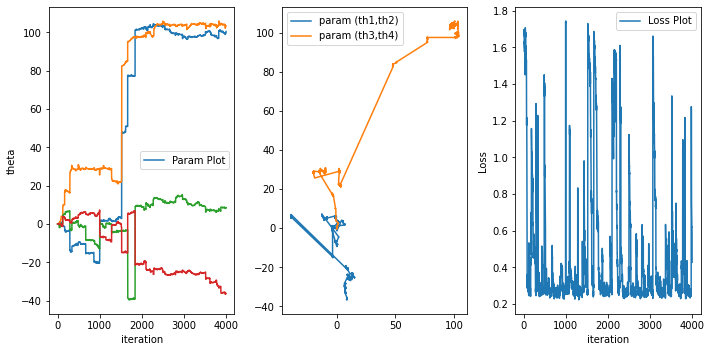

In [162]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
print('After 1000 iteration we have theta =',theta)
axes[0].plot(thdata)
axes[0].set_ylabel('theta')
axes[0].legend(['Param Plot'])
axes[0].set_xlabel('iteration')
axes[1].plot([item[2] for item in thdata],[item[3] for item in thdata],[item[0] for item in thdata],[item[1] for item in thdata])
axes[1].legend(['param (th1,th2)','param (th3,th4)'])

axes[2].plot(progress)
axes[2].legend(['Loss Plot'])
axes[2].set_ylabel('Loss')
axes[2].set_xlabel('iteration')
fig.tight_layout()

### c1=0.05(Medium movement) delta=0.3+ (Small fluctuation)

In [163]:
progress=[];
theta=[0,0,0,0];
thdata=[];

c1=0.05
delta=6
nshot=3000;
theta=np.array(theta)-SPSA(1,theta,c1,delta,nshot)
for ep in range(4000):
    delta=random.random()+0.3
    theta=theta-SPSA(1,theta,c1,delta,nshot)
    print(ep,"th iteration L=",lossCal2qubit(1,theta,nshot))
    progress.append(lossCal2qubit(1,theta,nshot))
    thdata.append(theta)

0 th iteration L= 1.6753333333333333
1 th iteration L= 1.6720000000000002
2 th iteration L= 1.6400000000000001
3 th iteration L= 1.654
4 th iteration L= 1.6313333333333333
5 th iteration L= 1.65
6 th iteration L= 1.62
7 th iteration L= 1.6006666666666667
8 th iteration L= 1.5859999999999999
9 th iteration L= 1.6126666666666667
10 th iteration L= 1.6133333333333333
11 th iteration L= 1.532
12 th iteration L= 1.588
13 th iteration L= 1.53
14 th iteration L= 1.4853333333333334
15 th iteration L= 1.4713333333333334
16 th iteration L= 1.462
17 th iteration L= 1.4493333333333334
18 th iteration L= 1.384
19 th iteration L= 1.3786666666666667
20 th iteration L= 1.4133333333333333
21 th iteration L= 1.3593333333333333
22 th iteration L= 1.3206666666666667
23 th iteration L= 1.3166666666666667
24 th iteration L= 1.2253333333333334
25 th iteration L= 1.2333333333333334
26 th iteration L= 1.21
27 th iteration L= 1.176
28 th iteration L= 1.0793333333333333
29 th iteration L= 1.0646666666666667
30 t

239 th iteration L= 0.266
240 th iteration L= 0.2726666666666666
241 th iteration L= 0.2793333333333333
242 th iteration L= 0.252
243 th iteration L= 0.2446666666666667
244 th iteration L= 0.2773333333333333
245 th iteration L= 0.264
246 th iteration L= 0.2486666666666667
247 th iteration L= 0.2733333333333333
248 th iteration L= 0.2433333333333333
249 th iteration L= 0.2553333333333333
250 th iteration L= 0.2393333333333333
251 th iteration L= 0.254
252 th iteration L= 0.2453333333333333
253 th iteration L= 0.2706666666666667
254 th iteration L= 0.2526666666666667
255 th iteration L= 0.2546666666666667
256 th iteration L= 0.2513333333333333
257 th iteration L= 0.2346666666666667
258 th iteration L= 0.2526666666666667
259 th iteration L= 0.2593333333333333
260 th iteration L= 0.2553333333333333
261 th iteration L= 0.2626666666666667
262 th iteration L= 0.276
263 th iteration L= 0.2593333333333333
264 th iteration L= 0.248
265 th iteration L= 0.2526666666666667
266 th iteration L= 0.255

478 th iteration L= 0.2793333333333333
479 th iteration L= 0.272
480 th iteration L= 0.2453333333333333
481 th iteration L= 0.2486666666666667
482 th iteration L= 0.2633333333333333
483 th iteration L= 0.244
484 th iteration L= 0.25
485 th iteration L= 0.2453333333333333
486 th iteration L= 0.262
487 th iteration L= 0.2786666666666666
488 th iteration L= 0.2706666666666667
489 th iteration L= 0.2413333333333333
490 th iteration L= 0.25
491 th iteration L= 0.26
492 th iteration L= 0.25
493 th iteration L= 0.2613333333333333
494 th iteration L= 0.2386666666666667
495 th iteration L= 0.2813333333333333
496 th iteration L= 0.2533333333333333
497 th iteration L= 0.258
498 th iteration L= 0.2366666666666667
499 th iteration L= 0.2573333333333333
500 th iteration L= 0.2666666666666667
501 th iteration L= 0.2713333333333333
502 th iteration L= 0.26
503 th iteration L= 0.2733333333333333
504 th iteration L= 0.29333333333333333
505 th iteration L= 0.244
506 th iteration L= 0.2646666666666667
507

714 th iteration L= 0.2653333333333333
715 th iteration L= 0.276
716 th iteration L= 0.254
717 th iteration L= 0.264
718 th iteration L= 0.2753333333333333
719 th iteration L= 0.2493333333333333
720 th iteration L= 0.2666666666666667
721 th iteration L= 0.28600000000000003
722 th iteration L= 0.2686666666666667
723 th iteration L= 0.2646666666666667
724 th iteration L= 0.276
725 th iteration L= 0.2493333333333333
726 th iteration L= 0.26
727 th iteration L= 0.2733333333333333
728 th iteration L= 0.25
729 th iteration L= 0.2693333333333333
730 th iteration L= 0.2666666666666667
731 th iteration L= 0.26
732 th iteration L= 0.2626666666666667
733 th iteration L= 0.274
734 th iteration L= 0.2466666666666667
735 th iteration L= 0.2513333333333333
736 th iteration L= 0.21733333333333338
737 th iteration L= 0.2493333333333333
738 th iteration L= 0.262
739 th iteration L= 0.27
740 th iteration L= 0.2473333333333333
741 th iteration L= 0.25
742 th iteration L= 0.2446666666666667
743 th iteratio

954 th iteration L= 0.2506666666666667
955 th iteration L= 0.2613333333333333
956 th iteration L= 0.2613333333333333
957 th iteration L= 0.24
958 th iteration L= 0.2586666666666667
959 th iteration L= 0.2633333333333333
960 th iteration L= 0.2753333333333333
961 th iteration L= 0.2633333333333333
962 th iteration L= 0.2553333333333333
963 th iteration L= 0.2513333333333333
964 th iteration L= 0.2686666666666667
965 th iteration L= 0.2613333333333333
966 th iteration L= 0.2713333333333333
967 th iteration L= 0.2626666666666667
968 th iteration L= 0.2426666666666667
969 th iteration L= 0.2613333333333333
970 th iteration L= 0.2693333333333333
971 th iteration L= 0.2573333333333333
972 th iteration L= 0.2453333333333333
973 th iteration L= 0.2726666666666666
974 th iteration L= 0.256
975 th iteration L= 0.254
976 th iteration L= 0.256
977 th iteration L= 0.258
978 th iteration L= 0.2673333333333333
979 th iteration L= 0.242
980 th iteration L= 0.2713333333333333
981 th iteration L= 0.2506

1188 th iteration L= 0.2466666666666667
1189 th iteration L= 0.2633333333333333
1190 th iteration L= 0.2593333333333333
1191 th iteration L= 0.2593333333333333
1192 th iteration L= 0.2453333333333333
1193 th iteration L= 0.2586666666666667
1194 th iteration L= 0.2646666666666667
1195 th iteration L= 0.2566666666666667
1196 th iteration L= 0.268
1197 th iteration L= 0.268
1198 th iteration L= 0.242
1199 th iteration L= 0.252
1200 th iteration L= 0.2326666666666667
1201 th iteration L= 0.2706666666666667
1202 th iteration L= 0.2526666666666667
1203 th iteration L= 0.28733333333333333
1204 th iteration L= 0.2553333333333333
1205 th iteration L= 0.2553333333333333
1206 th iteration L= 0.2613333333333333
1207 th iteration L= 0.2713333333333333
1208 th iteration L= 0.258
1209 th iteration L= 0.2746666666666666
1210 th iteration L= 0.262
1211 th iteration L= 0.2553333333333333
1212 th iteration L= 0.26
1213 th iteration L= 0.262
1214 th iteration L= 0.276
1215 th iteration L= 0.26266666666666

1417 th iteration L= 0.2506666666666667
1418 th iteration L= 0.2633333333333333
1419 th iteration L= 0.252
1420 th iteration L= 0.2673333333333333
1421 th iteration L= 0.2793333333333333
1422 th iteration L= 0.29000000000000004
1423 th iteration L= 0.2693333333333333
1424 th iteration L= 0.2406666666666667
1425 th iteration L= 0.2613333333333333
1426 th iteration L= 0.274
1427 th iteration L= 0.2606666666666667
1428 th iteration L= 0.2726666666666666
1429 th iteration L= 0.26
1430 th iteration L= 0.2386666666666667
1431 th iteration L= 0.2666666666666667
1432 th iteration L= 0.266
1433 th iteration L= 0.246
1434 th iteration L= 0.264
1435 th iteration L= 0.2733333333333333
1436 th iteration L= 0.258
1437 th iteration L= 0.2826666666666666
1438 th iteration L= 0.2593333333333333
1439 th iteration L= 0.2753333333333333
1440 th iteration L= 0.2853333333333333
1441 th iteration L= 0.2506666666666667
1442 th iteration L= 0.2513333333333333
1443 th iteration L= 0.2493333333333333
1444 th ite

1642 th iteration L= 0.2673333333333333
1643 th iteration L= 0.2533333333333333
1644 th iteration L= 0.23533333333333328
1645 th iteration L= 0.2686666666666667
1646 th iteration L= 0.2826666666666666
1647 th iteration L= 0.2453333333333333
1648 th iteration L= 0.2546666666666667
1649 th iteration L= 0.236
1650 th iteration L= 0.274
1651 th iteration L= 0.2473333333333333
1652 th iteration L= 0.2746666666666666
1653 th iteration L= 0.2473333333333333
1654 th iteration L= 0.2566666666666667
1655 th iteration L= 0.2413333333333333
1656 th iteration L= 0.2553333333333333
1657 th iteration L= 0.2613333333333333
1658 th iteration L= 0.252
1659 th iteration L= 0.25
1660 th iteration L= 0.2626666666666667
1661 th iteration L= 0.2653333333333333
1662 th iteration L= 0.2606666666666667
1663 th iteration L= 0.2746666666666666
1664 th iteration L= 0.2573333333333333
1665 th iteration L= 0.246
1666 th iteration L= 0.2586666666666667
1667 th iteration L= 0.264
1668 th iteration L= 0.264666666666666

1870 th iteration L= 0.2633333333333333
1871 th iteration L= 0.256
1872 th iteration L= 0.2573333333333333
1873 th iteration L= 0.276
1874 th iteration L= 0.2626666666666667
1875 th iteration L= 0.248
1876 th iteration L= 0.258
1877 th iteration L= 0.2573333333333333
1878 th iteration L= 0.2593333333333333
1879 th iteration L= 0.2613333333333333
1880 th iteration L= 0.2613333333333333
1881 th iteration L= 0.2533333333333333
1882 th iteration L= 0.2586666666666667
1883 th iteration L= 0.2613333333333333
1884 th iteration L= 0.2406666666666667
1885 th iteration L= 0.2526666666666667
1886 th iteration L= 0.266
1887 th iteration L= 0.2626666666666667
1888 th iteration L= 0.2546666666666667
1889 th iteration L= 0.2553333333333333
1890 th iteration L= 0.2653333333333333
1891 th iteration L= 0.2526666666666667
1892 th iteration L= 0.2633333333333333
1893 th iteration L= 0.2626666666666667
1894 th iteration L= 0.28
1895 th iteration L= 0.258
1896 th iteration L= 0.2713333333333333
1897 th iter

2104 th iteration L= 0.2406666666666667
2105 th iteration L= 0.2726666666666666
2106 th iteration L= 0.2613333333333333
2107 th iteration L= 0.2453333333333333
2108 th iteration L= 0.2513333333333333
2109 th iteration L= 0.2673333333333333
2110 th iteration L= 0.2506666666666667
2111 th iteration L= 0.23399999999999999
2112 th iteration L= 0.2506666666666667
2113 th iteration L= 0.274
2114 th iteration L= 0.2413333333333333
2115 th iteration L= 0.2693333333333333
2116 th iteration L= 0.2766666666666666
2117 th iteration L= 0.2586666666666667
2118 th iteration L= 0.2686666666666667
2119 th iteration L= 0.2733333333333333
2120 th iteration L= 0.2673333333333333
2121 th iteration L= 0.274
2122 th iteration L= 0.2606666666666667
2123 th iteration L= 0.2666666666666667
2124 th iteration L= 0.27
2125 th iteration L= 0.2566666666666667
2126 th iteration L= 0.26
2127 th iteration L= 0.2406666666666667
2128 th iteration L= 0.2653333333333333
2129 th iteration L= 0.2633333333333333
2130 th itera

2335 th iteration L= 0.252
2336 th iteration L= 0.258
2337 th iteration L= 0.2666666666666667
2338 th iteration L= 0.23733333333333329
2339 th iteration L= 0.264
2340 th iteration L= 0.2606666666666667
2341 th iteration L= 0.2493333333333333
2342 th iteration L= 0.2646666666666667
2343 th iteration L= 0.2733333333333333
2344 th iteration L= 0.2393333333333333
2345 th iteration L= 0.2593333333333333
2346 th iteration L= 0.2673333333333333
2347 th iteration L= 0.27
2348 th iteration L= 0.2613333333333333
2349 th iteration L= 0.27
2350 th iteration L= 0.266
2351 th iteration L= 0.2326666666666667
2352 th iteration L= 0.252
2353 th iteration L= 0.2666666666666667
2354 th iteration L= 0.2553333333333333
2355 th iteration L= 0.2513333333333333
2356 th iteration L= 0.256
2357 th iteration L= 0.2473333333333333
2358 th iteration L= 0.2433333333333333
2359 th iteration L= 0.2526666666666667
2360 th iteration L= 0.23533333333333328
2361 th iteration L= 0.22999999999999998
2362 th iteration L= 0.

2561 th iteration L= 0.2626666666666667
2562 th iteration L= 0.2706666666666667
2563 th iteration L= 0.2626666666666667
2564 th iteration L= 0.2646666666666667
2565 th iteration L= 0.2306666666666667
2566 th iteration L= 0.2453333333333333
2567 th iteration L= 0.264
2568 th iteration L= 0.2726666666666666
2569 th iteration L= 0.2526666666666667
2570 th iteration L= 0.2653333333333333
2571 th iteration L= 0.29666666666666663
2572 th iteration L= 0.2753333333333333
2573 th iteration L= 0.2513333333333333
2574 th iteration L= 0.2773333333333333
2575 th iteration L= 0.22266666666666668
2576 th iteration L= 0.266
2577 th iteration L= 0.2613333333333333
2578 th iteration L= 0.2653333333333333
2579 th iteration L= 0.2533333333333333
2580 th iteration L= 0.2566666666666667
2581 th iteration L= 0.2526666666666667
2582 th iteration L= 0.2533333333333333
2583 th iteration L= 0.2506666666666667
2584 th iteration L= 0.2746666666666666
2585 th iteration L= 0.2513333333333333
2586 th iteration L= 0.2

2788 th iteration L= 0.2593333333333333
2789 th iteration L= 0.2486666666666667
2790 th iteration L= 0.2533333333333333
2791 th iteration L= 0.256
2792 th iteration L= 0.2513333333333333
2793 th iteration L= 0.262
2794 th iteration L= 0.24
2795 th iteration L= 0.2633333333333333
2796 th iteration L= 0.2473333333333333
2797 th iteration L= 0.272
2798 th iteration L= 0.2586666666666667
2799 th iteration L= 0.2546666666666667
2800 th iteration L= 0.2533333333333333
2801 th iteration L= 0.2533333333333333
2802 th iteration L= 0.2393333333333333
2803 th iteration L= 0.2486666666666667
2804 th iteration L= 0.2533333333333333
2805 th iteration L= 0.2746666666666666
2806 th iteration L= 0.2586666666666667
2807 th iteration L= 0.2633333333333333
2808 th iteration L= 0.2646666666666667
2809 th iteration L= 0.258
2810 th iteration L= 0.2626666666666667
2811 th iteration L= 0.276
2812 th iteration L= 0.2573333333333333
2813 th iteration L= 0.2593333333333333
2814 th iteration L= 0.2806666666666666

3016 th iteration L= 0.2506666666666667
3017 th iteration L= 0.254
3018 th iteration L= 0.27
3019 th iteration L= 0.242
3020 th iteration L= 0.2633333333333333
3021 th iteration L= 0.2766666666666666
3022 th iteration L= 0.2606666666666667
3023 th iteration L= 0.256
3024 th iteration L= 0.2513333333333333
3025 th iteration L= 0.2573333333333333
3026 th iteration L= 0.2513333333333333
3027 th iteration L= 0.2626666666666667
3028 th iteration L= 0.23533333333333328
3029 th iteration L= 0.266
3030 th iteration L= 0.2646666666666667
3031 th iteration L= 0.2746666666666666
3032 th iteration L= 0.29066666666666663
3033 th iteration L= 0.2533333333333333
3034 th iteration L= 0.2773333333333333
3035 th iteration L= 0.268
3036 th iteration L= 0.26
3037 th iteration L= 0.2673333333333333
3038 th iteration L= 0.248
3039 th iteration L= 0.2586666666666667
3040 th iteration L= 0.2506666666666667
3041 th iteration L= 0.2546666666666667
3042 th iteration L= 0.254
3043 th iteration L= 0.266
3044 th it

3246 th iteration L= 0.2626666666666667
3247 th iteration L= 0.26
3248 th iteration L= 0.2446666666666667
3249 th iteration L= 0.2433333333333333
3250 th iteration L= 0.2346666666666667
3251 th iteration L= 0.29066666666666663
3252 th iteration L= 0.2653333333333333
3253 th iteration L= 0.2573333333333333
3254 th iteration L= 0.2473333333333333
3255 th iteration L= 0.2546666666666667
3256 th iteration L= 0.2593333333333333
3257 th iteration L= 0.2506666666666667
3258 th iteration L= 0.2713333333333333
3259 th iteration L= 0.2573333333333333
3260 th iteration L= 0.2466666666666667
3261 th iteration L= 0.2713333333333333
3262 th iteration L= 0.244
3263 th iteration L= 0.2526666666666667
3264 th iteration L= 0.256
3265 th iteration L= 0.266
3266 th iteration L= 0.2506666666666667
3267 th iteration L= 0.274
3268 th iteration L= 0.2733333333333333
3269 th iteration L= 0.2466666666666667
3270 th iteration L= 0.258
3271 th iteration L= 0.2646666666666667
3272 th iteration L= 0.262
3273 th ite

3476 th iteration L= 0.2593333333333333
3477 th iteration L= 0.2466666666666667
3478 th iteration L= 0.2606666666666667
3479 th iteration L= 0.254
3480 th iteration L= 0.256
3481 th iteration L= 0.252
3482 th iteration L= 0.278
3483 th iteration L= 0.2813333333333333
3484 th iteration L= 0.2426666666666667
3485 th iteration L= 0.242
3486 th iteration L= 0.2686666666666667
3487 th iteration L= 0.22599999999999998
3488 th iteration L= 0.2546666666666667
3489 th iteration L= 0.2773333333333333
3490 th iteration L= 0.2466666666666667
3491 th iteration L= 0.2413333333333333
3492 th iteration L= 0.2653333333333333
3493 th iteration L= 0.2586666666666667
3494 th iteration L= 0.2793333333333333
3495 th iteration L= 0.248
3496 th iteration L= 0.2513333333333333
3497 th iteration L= 0.2533333333333333
3498 th iteration L= 0.2706666666666667
3499 th iteration L= 0.2606666666666667
3500 th iteration L= 0.2573333333333333
3501 th iteration L= 0.2753333333333333
3502 th iteration L= 0.25066666666666

3704 th iteration L= 0.266
3705 th iteration L= 0.2466666666666667
3706 th iteration L= 0.268
3707 th iteration L= 0.254
3708 th iteration L= 0.2673333333333333
3709 th iteration L= 0.2766666666666666
3710 th iteration L= 0.238
3711 th iteration L= 0.2553333333333333
3712 th iteration L= 0.256
3713 th iteration L= 0.2513333333333333
3714 th iteration L= 0.2726666666666666
3715 th iteration L= 0.248
3716 th iteration L= 0.2486666666666667
3717 th iteration L= 0.27
3718 th iteration L= 0.266
3719 th iteration L= 0.2506666666666667
3720 th iteration L= 0.2713333333333333
3721 th iteration L= 0.25
3722 th iteration L= 0.2553333333333333
3723 th iteration L= 0.2646666666666667
3724 th iteration L= 0.2526666666666667
3725 th iteration L= 0.246
3726 th iteration L= 0.2393333333333333
3727 th iteration L= 0.2586666666666667
3728 th iteration L= 0.2593333333333333
3729 th iteration L= 0.2566666666666667
3730 th iteration L= 0.2633333333333333
3731 th iteration L= 0.248
3732 th iteration L= 0.24

3936 th iteration L= 0.27
3937 th iteration L= 0.2773333333333333
3938 th iteration L= 0.2666666666666667
3939 th iteration L= 0.2666666666666667
3940 th iteration L= 0.264
3941 th iteration L= 0.2646666666666667
3942 th iteration L= 0.2553333333333333
3943 th iteration L= 0.2853333333333333
3944 th iteration L= 0.2733333333333333
3945 th iteration L= 0.242
3946 th iteration L= 0.238
3947 th iteration L= 0.26
3948 th iteration L= 0.21799999999999997
3949 th iteration L= 0.2493333333333333
3950 th iteration L= 0.2613333333333333
3951 th iteration L= 0.2513333333333333
3952 th iteration L= 0.266
3953 th iteration L= 0.23133333333333328
3954 th iteration L= 0.25
3955 th iteration L= 0.2646666666666667
3956 th iteration L= 0.25
3957 th iteration L= 0.238
3958 th iteration L= 0.2513333333333333
3959 th iteration L= 0.2393333333333333
3960 th iteration L= 0.262
3961 th iteration L= 0.2533333333333333
3962 th iteration L= 0.2566666666666667
3963 th iteration L= 0.2453333333333333
3964 th iter

After 1000 iteration we have theta = [ 0.63709584 -2.71611025  0.85931948  0.98989377]


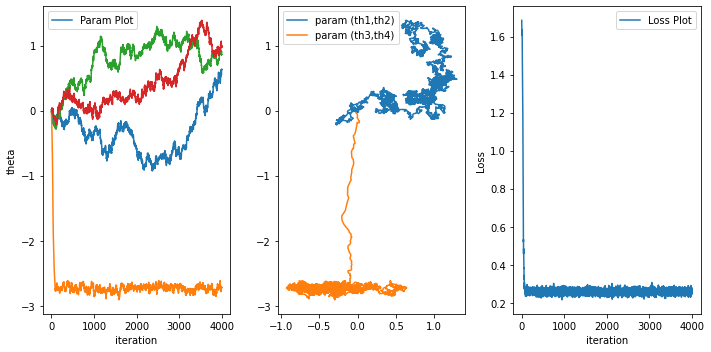

In [164]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
print('After 1000 iteration we have theta =',theta)
axes[0].plot(thdata)
axes[0].set_ylabel('theta')
axes[0].legend(['Param Plot'])
axes[0].set_xlabel('iteration')
axes[1].plot([item[2] for item in thdata],[item[3] for item in thdata],[item[0] for item in thdata],[item[1] for item in thdata])
axes[1].legend(['param (th1,th2)','param (th3,th4)'])

axes[2].plot(progress)
axes[2].legend(['Loss Plot'])
axes[2].set_ylabel('Loss')
axes[2].set_xlabel('iteration')
fig.tight_layout()

### c1=0.05(Medium movement) delta=0.1+ (Medium fluctuation)

In [165]:
progress=[];
theta=[0,0,0,0];
thdata=[];

c1=0.05
delta=6
nshot=3000;
theta=np.array(theta)-SPSA(1,theta,c1,delta,nshot)
for ep in range(4000):
    delta=random.random()+0.1
    theta=theta-SPSA(1,theta,c1,delta,nshot)
    print(ep,"th iteration L=",lossCal2qubit(1,theta,nshot))
    progress.append(lossCal2qubit(1,theta,nshot))
    thdata.append(theta)

0 th iteration L= 1.6586666666666665
1 th iteration L= 1.6646666666666667
2 th iteration L= 1.6
3 th iteration L= 1.56
4 th iteration L= 1.5153333333333334
5 th iteration L= 1.5353333333333334
6 th iteration L= 1.498
7 th iteration L= 1.488
8 th iteration L= 1.3566666666666667
9 th iteration L= 1.3266666666666667
10 th iteration L= 1.3086666666666666
11 th iteration L= 1.2806666666666666
12 th iteration L= 1.3053333333333335
13 th iteration L= 1.1313333333333333
14 th iteration L= 1.12
15 th iteration L= 1.028
16 th iteration L= 1.028
17 th iteration L= 0.862
18 th iteration L= 0.8013333333333333
19 th iteration L= 0.708
20 th iteration L= 0.6886666666666666
21 th iteration L= 0.5640000000000001
22 th iteration L= 0.51
23 th iteration L= 0.536
24 th iteration L= 0.508
25 th iteration L= 0.524
26 th iteration L= 0.5086666666666666
27 th iteration L= 0.4653333333333334
28 th iteration L= 0.44733333333333336
29 th iteration L= 0.4093333333333333
30 th iteration L= 0.3966666666666666
31 th

238 th iteration L= 0.2513333333333333
239 th iteration L= 0.246
240 th iteration L= 0.2553333333333333
241 th iteration L= 0.2766666666666666
242 th iteration L= 0.264
243 th iteration L= 0.264
244 th iteration L= 0.2773333333333333
245 th iteration L= 0.2586666666666667
246 th iteration L= 0.2466666666666667
247 th iteration L= 0.28600000000000003
248 th iteration L= 0.2613333333333333
249 th iteration L= 0.2586666666666667
250 th iteration L= 0.2513333333333333
251 th iteration L= 0.2473333333333333
252 th iteration L= 0.23133333333333328
253 th iteration L= 0.2613333333333333
254 th iteration L= 0.2693333333333333
255 th iteration L= 0.252
256 th iteration L= 0.2573333333333333
257 th iteration L= 0.238
258 th iteration L= 0.2726666666666666
259 th iteration L= 0.264
260 th iteration L= 0.2546666666666667
261 th iteration L= 0.2746666666666666
262 th iteration L= 0.2693333333333333
263 th iteration L= 0.256
264 th iteration L= 0.256
265 th iteration L= 0.28400000000000003
266 th it

473 th iteration L= 0.2786666666666666
474 th iteration L= 0.2566666666666667
475 th iteration L= 0.2506666666666667
476 th iteration L= 0.23533333333333328
477 th iteration L= 0.2533333333333333
478 th iteration L= 0.2613333333333333
479 th iteration L= 0.2413333333333333
480 th iteration L= 0.28400000000000003
481 th iteration L= 0.2853333333333333
482 th iteration L= 0.2326666666666667
483 th iteration L= 0.2746666666666666
484 th iteration L= 0.2686666666666667
485 th iteration L= 0.2806666666666666
486 th iteration L= 0.2686666666666667
487 th iteration L= 0.2526666666666667
488 th iteration L= 0.2806666666666666
489 th iteration L= 0.2753333333333333
490 th iteration L= 0.2486666666666667
491 th iteration L= 0.256
492 th iteration L= 0.2593333333333333
493 th iteration L= 0.2846666666666666
494 th iteration L= 0.28
495 th iteration L= 0.2773333333333333
496 th iteration L= 0.28600000000000003
497 th iteration L= 0.2426666666666667
498 th iteration L= 0.262
499 th iteration L= 0.2

709 th iteration L= 0.2566666666666667
710 th iteration L= 0.2533333333333333
711 th iteration L= 0.2653333333333333
712 th iteration L= 0.2673333333333333
713 th iteration L= 0.22799999999999998
714 th iteration L= 0.274
715 th iteration L= 0.2586666666666667
716 th iteration L= 0.2566666666666667
717 th iteration L= 0.2506666666666667
718 th iteration L= 0.2626666666666667
719 th iteration L= 0.2466666666666667
720 th iteration L= 0.2433333333333333
721 th iteration L= 0.262
722 th iteration L= 0.2566666666666667
723 th iteration L= 0.264
724 th iteration L= 0.2513333333333333
725 th iteration L= 0.2733333333333333
726 th iteration L= 0.264
727 th iteration L= 0.264
728 th iteration L= 0.2546666666666667
729 th iteration L= 0.2666666666666667
730 th iteration L= 0.2506666666666667
731 th iteration L= 0.252
732 th iteration L= 0.2566666666666667
733 th iteration L= 0.26
734 th iteration L= 0.28800000000000003
735 th iteration L= 0.264
736 th iteration L= 0.266
737 th iteration L= 0.24

947 th iteration L= 0.2726666666666666
948 th iteration L= 0.2346666666666667
949 th iteration L= 0.244
950 th iteration L= 0.2586666666666667
951 th iteration L= 0.2593333333333333
952 th iteration L= 0.2786666666666666
953 th iteration L= 0.274
954 th iteration L= 0.2593333333333333
955 th iteration L= 0.2566666666666667
956 th iteration L= 0.2626666666666667
957 th iteration L= 0.2753333333333333
958 th iteration L= 0.2486666666666667
959 th iteration L= 0.2433333333333333
960 th iteration L= 0.2586666666666667
961 th iteration L= 0.29200000000000004
962 th iteration L= 0.2586666666666667
963 th iteration L= 0.254
964 th iteration L= 0.2586666666666667
965 th iteration L= 0.2726666666666666
966 th iteration L= 0.2546666666666667
967 th iteration L= 0.22266666666666668
968 th iteration L= 0.258
969 th iteration L= 0.2586666666666667
970 th iteration L= 0.2406666666666667
971 th iteration L= 0.2633333333333333
972 th iteration L= 0.2626666666666667
973 th iteration L= 0.266
974 th ite

1174 th iteration L= 0.2473333333333333
1175 th iteration L= 0.256
1176 th iteration L= 0.26
1177 th iteration L= 0.2566666666666667
1178 th iteration L= 0.2653333333333333
1179 th iteration L= 0.2573333333333333
1180 th iteration L= 0.2713333333333333
1181 th iteration L= 0.2426666666666667
1182 th iteration L= 0.242
1183 th iteration L= 0.2593333333333333
1184 th iteration L= 0.2753333333333333
1185 th iteration L= 0.2666666666666667
1186 th iteration L= 0.252
1187 th iteration L= 0.2593333333333333
1188 th iteration L= 0.266
1189 th iteration L= 0.262
1190 th iteration L= 0.2386666666666667
1191 th iteration L= 0.254
1192 th iteration L= 0.2493333333333333
1193 th iteration L= 0.264
1194 th iteration L= 0.21599999999999997
1195 th iteration L= 0.2586666666666667
1196 th iteration L= 0.244
1197 th iteration L= 0.2553333333333333
1198 th iteration L= 0.2653333333333333
1199 th iteration L= 0.246
1200 th iteration L= 0.2773333333333333
1201 th iteration L= 0.2466666666666667
1202 th it

1401 th iteration L= 0.2573333333333333
1402 th iteration L= 0.276
1403 th iteration L= 0.2613333333333333
1404 th iteration L= 0.2546666666666667
1405 th iteration L= 0.2433333333333333
1406 th iteration L= 0.2653333333333333
1407 th iteration L= 0.248
1408 th iteration L= 0.2673333333333333
1409 th iteration L= 0.2586666666666667
1410 th iteration L= 0.254
1411 th iteration L= 0.266
1412 th iteration L= 0.2566666666666667
1413 th iteration L= 0.2806666666666666
1414 th iteration L= 0.2686666666666667
1415 th iteration L= 0.2726666666666666
1416 th iteration L= 0.2446666666666667
1417 th iteration L= 0.2846666666666666
1418 th iteration L= 0.2466666666666667
1419 th iteration L= 0.2486666666666667
1420 th iteration L= 0.2473333333333333
1421 th iteration L= 0.264
1422 th iteration L= 0.2573333333333333
1423 th iteration L= 0.2566666666666667
1424 th iteration L= 0.2653333333333333
1425 th iteration L= 0.258
1426 th iteration L= 0.2766666666666666
1427 th iteration L= 0.241333333333333

1630 th iteration L= 0.2586666666666667
1631 th iteration L= 0.2466666666666667
1632 th iteration L= 0.2366666666666667
1633 th iteration L= 0.22266666666666668
1634 th iteration L= 0.254
1635 th iteration L= 0.2646666666666667
1636 th iteration L= 0.2613333333333333
1637 th iteration L= 0.2453333333333333
1638 th iteration L= 0.28200000000000003
1639 th iteration L= 0.2526666666666667
1640 th iteration L= 0.2426666666666667
1641 th iteration L= 0.2573333333333333
1642 th iteration L= 0.2406666666666667
1643 th iteration L= 0.2586666666666667
1644 th iteration L= 0.2653333333333333
1645 th iteration L= 0.2753333333333333
1646 th iteration L= 0.2453333333333333
1647 th iteration L= 0.2573333333333333
1648 th iteration L= 0.2413333333333333
1649 th iteration L= 0.2673333333333333
1650 th iteration L= 0.26
1651 th iteration L= 0.2553333333333333
1652 th iteration L= 0.274
1653 th iteration L= 0.2673333333333333
1654 th iteration L= 0.2673333333333333
1655 th iteration L= 0.244
1656 th ite

1857 th iteration L= 0.258
1858 th iteration L= 0.2566666666666667
1859 th iteration L= 0.252
1860 th iteration L= 0.242
1861 th iteration L= 0.2546666666666667
1862 th iteration L= 0.2433333333333333
1863 th iteration L= 0.254
1864 th iteration L= 0.2566666666666667
1865 th iteration L= 0.276
1866 th iteration L= 0.28400000000000003
1867 th iteration L= 0.2426666666666667
1868 th iteration L= 0.2566666666666667
1869 th iteration L= 0.254
1870 th iteration L= 0.256
1871 th iteration L= 0.2573333333333333
1872 th iteration L= 0.2706666666666667
1873 th iteration L= 0.2593333333333333
1874 th iteration L= 0.2513333333333333
1875 th iteration L= 0.2733333333333333
1876 th iteration L= 0.2706666666666667
1877 th iteration L= 0.2606666666666667
1878 th iteration L= 0.28733333333333333
1879 th iteration L= 0.2526666666666667
1880 th iteration L= 0.2786666666666666
1881 th iteration L= 0.2406666666666667
1882 th iteration L= 0.2766666666666666
1883 th iteration L= 0.27
1884 th iteration L= 0.

2085 th iteration L= 0.248
2086 th iteration L= 0.23333333333333328
2087 th iteration L= 0.2346666666666667
2088 th iteration L= 0.258
2089 th iteration L= 0.2533333333333333
2090 th iteration L= 0.248
2091 th iteration L= 0.23333333333333328
2092 th iteration L= 0.2633333333333333
2093 th iteration L= 0.266
2094 th iteration L= 0.2366666666666667
2095 th iteration L= 0.2533333333333333
2096 th iteration L= 0.2506666666666667
2097 th iteration L= 0.238
2098 th iteration L= 0.2606666666666667
2099 th iteration L= 0.2546666666666667
2100 th iteration L= 0.252
2101 th iteration L= 0.27
2102 th iteration L= 0.2586666666666667
2103 th iteration L= 0.236
2104 th iteration L= 0.2826666666666666
2105 th iteration L= 0.2706666666666667
2106 th iteration L= 0.2686666666666667
2107 th iteration L= 0.2453333333333333
2108 th iteration L= 0.2466666666666667
2109 th iteration L= 0.2626666666666667
2110 th iteration L= 0.2566666666666667
2111 th iteration L= 0.2806666666666666
2112 th iteration L= 0.

2312 th iteration L= 0.266
2313 th iteration L= 0.2666666666666667
2314 th iteration L= 0.244
2315 th iteration L= 0.26
2316 th iteration L= 0.2473333333333333
2317 th iteration L= 0.2506666666666667
2318 th iteration L= 0.2586666666666667
2319 th iteration L= 0.2686666666666667
2320 th iteration L= 0.2826666666666666
2321 th iteration L= 0.258
2322 th iteration L= 0.2633333333333333
2323 th iteration L= 0.264
2324 th iteration L= 0.23333333333333328
2325 th iteration L= 0.2406666666666667
2326 th iteration L= 0.256
2327 th iteration L= 0.2586666666666667
2328 th iteration L= 0.2553333333333333
2329 th iteration L= 0.266
2330 th iteration L= 0.272
2331 th iteration L= 0.2466666666666667
2332 th iteration L= 0.246
2333 th iteration L= 0.2633333333333333
2334 th iteration L= 0.2713333333333333
2335 th iteration L= 0.2426666666666667
2336 th iteration L= 0.2633333333333333
2337 th iteration L= 0.2593333333333333
2338 th iteration L= 0.2573333333333333
2339 th iteration L= 0.26533333333333

2538 th iteration L= 0.264
2539 th iteration L= 0.2453333333333333
2540 th iteration L= 0.2786666666666666
2541 th iteration L= 0.2686666666666667
2542 th iteration L= 0.2846666666666666
2543 th iteration L= 0.2593333333333333
2544 th iteration L= 0.2706666666666667
2545 th iteration L= 0.2533333333333333
2546 th iteration L= 0.254
2547 th iteration L= 0.2666666666666667
2548 th iteration L= 0.2273333333333334
2549 th iteration L= 0.272
2550 th iteration L= 0.258
2551 th iteration L= 0.2426666666666667
2552 th iteration L= 0.2513333333333333
2553 th iteration L= 0.256
2554 th iteration L= 0.2586666666666667
2555 th iteration L= 0.2526666666666667
2556 th iteration L= 0.28600000000000003
2557 th iteration L= 0.258
2558 th iteration L= 0.276
2559 th iteration L= 0.25
2560 th iteration L= 0.23333333333333328
2561 th iteration L= 0.276
2562 th iteration L= 0.2513333333333333
2563 th iteration L= 0.2586666666666667
2564 th iteration L= 0.274
2565 th iteration L= 0.2486666666666667
2566 th i

2765 th iteration L= 0.272
2766 th iteration L= 0.2673333333333333
2767 th iteration L= 0.2406666666666667
2768 th iteration L= 0.2453333333333333
2769 th iteration L= 0.2673333333333333
2770 th iteration L= 0.2846666666666666
2771 th iteration L= 0.2473333333333333
2772 th iteration L= 0.256
2773 th iteration L= 0.2406666666666667
2774 th iteration L= 0.272
2775 th iteration L= 0.2733333333333333
2776 th iteration L= 0.2486666666666667
2777 th iteration L= 0.2493333333333333
2778 th iteration L= 0.2346666666666667
2779 th iteration L= 0.2653333333333333
2780 th iteration L= 0.2546666666666667
2781 th iteration L= 0.272
2782 th iteration L= 0.2646666666666667
2783 th iteration L= 0.2566666666666667
2784 th iteration L= 0.2546666666666667
2785 th iteration L= 0.2673333333333333
2786 th iteration L= 0.2786666666666666
2787 th iteration L= 0.2486666666666667
2788 th iteration L= 0.2633333333333333
2789 th iteration L= 0.2666666666666667
2790 th iteration L= 0.2646666666666667
2791 th iter

2992 th iteration L= 0.262
2993 th iteration L= 0.262
2994 th iteration L= 0.2526666666666667
2995 th iteration L= 0.242
2996 th iteration L= 0.2406666666666667
2997 th iteration L= 0.2673333333333333
2998 th iteration L= 0.2806666666666666
2999 th iteration L= 0.2673333333333333
3000 th iteration L= 0.2586666666666667
3001 th iteration L= 0.2693333333333333
3002 th iteration L= 0.2626666666666667
3003 th iteration L= 0.2633333333333333
3004 th iteration L= 0.2653333333333333
3005 th iteration L= 0.262
3006 th iteration L= 0.2646666666666667
3007 th iteration L= 0.2773333333333333
3008 th iteration L= 0.2533333333333333
3009 th iteration L= 0.2726666666666666
3010 th iteration L= 0.2466666666666667
3011 th iteration L= 0.262
3012 th iteration L= 0.2553333333333333
3013 th iteration L= 0.2673333333333333
3014 th iteration L= 0.264
3015 th iteration L= 0.262
3016 th iteration L= 0.2586666666666667
3017 th iteration L= 0.25
3018 th iteration L= 0.2473333333333333
3019 th iteration L= 0.25

3220 th iteration L= 0.2413333333333333
3221 th iteration L= 0.2693333333333333
3222 th iteration L= 0.256
3223 th iteration L= 0.266
3224 th iteration L= 0.252
3225 th iteration L= 0.256
3226 th iteration L= 0.2593333333333333
3227 th iteration L= 0.274
3228 th iteration L= 0.2693333333333333
3229 th iteration L= 0.25
3230 th iteration L= 0.2666666666666667
3231 th iteration L= 0.26
3232 th iteration L= 0.2566666666666667
3233 th iteration L= 0.256
3234 th iteration L= 0.2733333333333333
3235 th iteration L= 0.2606666666666667
3236 th iteration L= 0.28400000000000003
3237 th iteration L= 0.2526666666666667
3238 th iteration L= 0.2753333333333333
3239 th iteration L= 0.248
3240 th iteration L= 0.2653333333333333
3241 th iteration L= 0.2613333333333333
3242 th iteration L= 0.2706666666666667
3243 th iteration L= 0.266
3244 th iteration L= 0.2273333333333334
3245 th iteration L= 0.262
3246 th iteration L= 0.258
3247 th iteration L= 0.266
3248 th iteration L= 0.256
3249 th iteration L= 0.

3450 th iteration L= 0.2386666666666667
3451 th iteration L= 0.2713333333333333
3452 th iteration L= 0.2653333333333333
3453 th iteration L= 0.254
3454 th iteration L= 0.23533333333333328
3455 th iteration L= 0.2546666666666667
3456 th iteration L= 0.258
3457 th iteration L= 0.2433333333333333
3458 th iteration L= 0.2786666666666666
3459 th iteration L= 0.2666666666666667
3460 th iteration L= 0.2473333333333333
3461 th iteration L= 0.2693333333333333
3462 th iteration L= 0.22399999999999998
3463 th iteration L= 0.266
3464 th iteration L= 0.2453333333333333
3465 th iteration L= 0.2753333333333333
3466 th iteration L= 0.258
3467 th iteration L= 0.2606666666666667
3468 th iteration L= 0.2813333333333333
3469 th iteration L= 0.244
3470 th iteration L= 0.2753333333333333
3471 th iteration L= 0.248
3472 th iteration L= 0.2653333333333333
3473 th iteration L= 0.2473333333333333
3474 th iteration L= 0.2473333333333333
3475 th iteration L= 0.2593333333333333
3476 th iteration L= 0.2553333333333

3674 th iteration L= 0.2713333333333333
3675 th iteration L= 0.2593333333333333
3676 th iteration L= 0.252
3677 th iteration L= 0.2646666666666667
3678 th iteration L= 0.2813333333333333
3679 th iteration L= 0.2653333333333333
3680 th iteration L= 0.2626666666666667
3681 th iteration L= 0.2573333333333333
3682 th iteration L= 0.2493333333333333
3683 th iteration L= 0.2626666666666667
3684 th iteration L= 0.274
3685 th iteration L= 0.2626666666666667
3686 th iteration L= 0.2606666666666667
3687 th iteration L= 0.258
3688 th iteration L= 0.23399999999999999
3689 th iteration L= 0.266
3690 th iteration L= 0.2526666666666667
3691 th iteration L= 0.2666666666666667
3692 th iteration L= 0.23399999999999999
3693 th iteration L= 0.242
3694 th iteration L= 0.258
3695 th iteration L= 0.2513333333333333
3696 th iteration L= 0.26
3697 th iteration L= 0.2433333333333333
3698 th iteration L= 0.2473333333333333
3699 th iteration L= 0.26
3700 th iteration L= 0.252
3701 th iteration L= 0.27333333333333

3903 th iteration L= 0.27
3904 th iteration L= 0.2506666666666667
3905 th iteration L= 0.262
3906 th iteration L= 0.2553333333333333
3907 th iteration L= 0.2693333333333333
3908 th iteration L= 0.278
3909 th iteration L= 0.266
3910 th iteration L= 0.2653333333333333
3911 th iteration L= 0.264
3912 th iteration L= 0.2673333333333333
3913 th iteration L= 0.2633333333333333
3914 th iteration L= 0.274
3915 th iteration L= 0.254
3916 th iteration L= 0.2666666666666667
3917 th iteration L= 0.2486666666666667
3918 th iteration L= 0.2853333333333333
3919 th iteration L= 0.2586666666666667
3920 th iteration L= 0.252
3921 th iteration L= 0.2433333333333333
3922 th iteration L= 0.2606666666666667
3923 th iteration L= 0.258
3924 th iteration L= 0.2346666666666667
3925 th iteration L= 0.2613333333333333
3926 th iteration L= 0.2613333333333333
3927 th iteration L= 0.2573333333333333
3928 th iteration L= 0.27
3929 th iteration L= 0.2553333333333333
3930 th iteration L= 0.2553333333333333
3931 th iter

After 1000 iteration we have theta = [-1.59721634 -2.6808427   2.32849765  0.1924541 ]


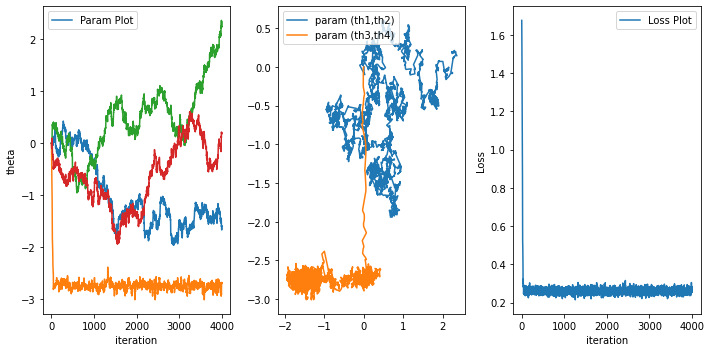

In [166]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
print('After 1000 iteration we have theta =',theta)
axes[0].plot(thdata)
axes[0].set_ylabel('theta')
axes[0].legend(['Param Plot'])
axes[0].set_xlabel('iteration')
axes[1].plot([item[2] for item in thdata],[item[3] for item in thdata],[item[0] for item in thdata],[item[1] for item in thdata])
axes[1].legend(['param (th1,th2)','param (th3,th4)'])

axes[2].plot(progress)
axes[2].legend(['Loss Plot'])
axes[2].set_ylabel('Loss')
axes[2].set_xlabel('iteration')
fig.tight_layout()

### c1=0.05(Medium movement) delta=0+ (Large fluctuation)

In [167]:
progress=[];
theta=[0,0,0,0];
thdata=[];

c1=0.05
delta=6
nshot=3000;
theta=np.array(theta)-SPSA(1,theta,c1,delta,nshot)
for ep in range(4000):
    delta=random.random()
    theta=theta-SPSA(1,theta,c1,delta,nshot)
    print(ep,"th iteration L=",lossCal2qubit(1,theta,nshot))
    progress.append(lossCal2qubit(1,theta,nshot))
    thdata.append(theta)

0 th iteration L= 1.6613333333333333
1 th iteration L= 1.712
2 th iteration L= 1.6873333333333334
3 th iteration L= 1.6853333333333333
4 th iteration L= 1.6393333333333333
5 th iteration L= 1.6400000000000001
6 th iteration L= 1.6386666666666667
7 th iteration L= 1.6346666666666667
8 th iteration L= 1.63
9 th iteration L= 1.6113333333333333
10 th iteration L= 1.5873333333333335
11 th iteration L= 1.5626666666666666
12 th iteration L= 1.488
13 th iteration L= 1.488
14 th iteration L= 1.3813333333333333
15 th iteration L= 1.278
16 th iteration L= 1.288
17 th iteration L= 1.158
18 th iteration L= 1.068
19 th iteration L= 1.0273333333333334
20 th iteration L= 0.946
21 th iteration L= 0.892
22 th iteration L= 0.7353333333333334
23 th iteration L= 0.7093333333333334
24 th iteration L= 0.6626666666666667
25 th iteration L= 0.5720000000000001
26 th iteration L= 0.5653333333333334
27 th iteration L= 0.3886666666666667
28 th iteration L= 0.33599999999999997
29 th iteration L= 0.33466666666666667

234 th iteration L= 0.2833333333333333
235 th iteration L= 0.2813333333333333
236 th iteration L= 0.2733333333333333
237 th iteration L= 0.2613333333333333
238 th iteration L= 0.268
239 th iteration L= 0.2693333333333333
240 th iteration L= 0.2673333333333333
241 th iteration L= 0.2786666666666666
242 th iteration L= 0.2686666666666667
243 th iteration L= 0.28933333333333333
244 th iteration L= 0.268
245 th iteration L= 0.2713333333333333
246 th iteration L= 0.2613333333333333
247 th iteration L= 0.2593333333333333
248 th iteration L= 0.2726666666666666
249 th iteration L= 0.2726666666666666
250 th iteration L= 0.2606666666666667
251 th iteration L= 0.2666666666666667
252 th iteration L= 0.2546666666666667
253 th iteration L= 0.2593333333333333
254 th iteration L= 0.2773333333333333
255 th iteration L= 0.26
256 th iteration L= 0.266
257 th iteration L= 0.2673333333333333
258 th iteration L= 0.2446666666666667
259 th iteration L= 0.266
260 th iteration L= 0.2506666666666667
261 th itera

467 th iteration L= 0.2733333333333333
468 th iteration L= 0.2533333333333333
469 th iteration L= 0.2693333333333333
470 th iteration L= 0.2506666666666667
471 th iteration L= 0.2613333333333333
472 th iteration L= 0.23133333333333328
473 th iteration L= 0.22399999999999998
474 th iteration L= 0.2526666666666667
475 th iteration L= 0.2753333333333333
476 th iteration L= 0.254
477 th iteration L= 0.2533333333333333
478 th iteration L= 0.2733333333333333
479 th iteration L= 0.258
480 th iteration L= 0.2366666666666667
481 th iteration L= 0.272
482 th iteration L= 0.2573333333333333
483 th iteration L= 0.26
484 th iteration L= 0.272
485 th iteration L= 0.5913333333333333
486 th iteration L= 0.5833333333333333
487 th iteration L= 0.44533333333333336
488 th iteration L= 0.45466666666666666
489 th iteration L= 0.3613333333333333
490 th iteration L= 0.3993333333333333
491 th iteration L= 0.3773333333333333
492 th iteration L= 0.3666666666666667
493 th iteration L= 0.3533333333333334
494 th it

696 th iteration L= 0.2606666666666667
697 th iteration L= 0.262
698 th iteration L= 0.28400000000000003
699 th iteration L= 0.2626666666666667
700 th iteration L= 0.2426666666666667
701 th iteration L= 0.2746666666666666
702 th iteration L= 0.2533333333333333
703 th iteration L= 0.2693333333333333
704 th iteration L= 0.2746666666666666
705 th iteration L= 0.2493333333333333
706 th iteration L= 0.256
707 th iteration L= 0.3446666666666667
708 th iteration L= 0.3486666666666667
709 th iteration L= 0.346
710 th iteration L= 0.4933333333333333
711 th iteration L= 0.4873333333333333
712 th iteration L= 0.4866666666666667
713 th iteration L= 0.4653333333333334
714 th iteration L= 1.6246666666666667
715 th iteration L= 1.4893333333333334
716 th iteration L= 1.436
717 th iteration L= 1.3066666666666666
718 th iteration L= 1.1493333333333333
719 th iteration L= 1.088
720 th iteration L= 0.97
721 th iteration L= 0.8933333333333333
722 th iteration L= 0.8433333333333333
723 th iteration L= 0.750

930 th iteration L= 0.28200000000000003
931 th iteration L= 0.29733333333333334
932 th iteration L= 0.2626666666666667
933 th iteration L= 0.27
934 th iteration L= 0.28400000000000003
935 th iteration L= 0.2546666666666667
936 th iteration L= 0.266
937 th iteration L= 0.2573333333333333
938 th iteration L= 0.23133333333333328
939 th iteration L= 0.2466666666666667
940 th iteration L= 0.266
941 th iteration L= 0.2646666666666667
942 th iteration L= 0.264
943 th iteration L= 0.2633333333333333
944 th iteration L= 0.2646666666666667
945 th iteration L= 0.922
946 th iteration L= 0.6233333333333333
947 th iteration L= 0.6226666666666667
948 th iteration L= 0.5640000000000001
949 th iteration L= 0.5133333333333333
950 th iteration L= 0.4733333333333334
951 th iteration L= 0.43266666666666664
952 th iteration L= 0.3773333333333333
953 th iteration L= 0.3746666666666667
954 th iteration L= 0.3473333333333334
955 th iteration L= 0.33999999999999997
956 th iteration L= 0.3446666666666667
957 th 

1157 th iteration L= 0.2673333333333333
1158 th iteration L= 0.264
1159 th iteration L= 0.2693333333333333
1160 th iteration L= 0.2846666666666666
1161 th iteration L= 0.2753333333333333
1162 th iteration L= 0.254
1163 th iteration L= 0.2633333333333333
1164 th iteration L= 0.262
1165 th iteration L= 0.2833333333333333
1166 th iteration L= 0.266
1167 th iteration L= 0.2586666666666667
1168 th iteration L= 0.256
1169 th iteration L= 0.2606666666666667
1170 th iteration L= 0.2586666666666667
1171 th iteration L= 0.2626666666666667
1172 th iteration L= 0.2326666666666667
1173 th iteration L= 0.2653333333333333
1174 th iteration L= 0.2713333333333333
1175 th iteration L= 0.406
1176 th iteration L= 0.41133333333333333
1177 th iteration L= 0.3626666666666667
1178 th iteration L= 0.356
1179 th iteration L= 0.3526666666666667
1180 th iteration L= 0.354
1181 th iteration L= 0.2833333333333333
1182 th iteration L= 0.29800000000000004
1183 th iteration L= 0.2866666666666666
1184 th iteration L= 0

1380 th iteration L= 0.2506666666666667
1381 th iteration L= 0.2653333333333333
1382 th iteration L= 0.254
1383 th iteration L= 0.278
1384 th iteration L= 0.278
1385 th iteration L= 0.2546666666666667
1386 th iteration L= 0.254
1387 th iteration L= 0.2626666666666667
1388 th iteration L= 0.2506666666666667
1389 th iteration L= 0.2526666666666667
1390 th iteration L= 0.264
1391 th iteration L= 0.238
1392 th iteration L= 0.266
1393 th iteration L= 0.258
1394 th iteration L= 0.2606666666666667
1395 th iteration L= 0.2453333333333333
1396 th iteration L= 0.26
1397 th iteration L= 0.28600000000000003
1398 th iteration L= 0.2513333333333333
1399 th iteration L= 0.254
1400 th iteration L= 0.2713333333333333
1401 th iteration L= 0.274
1402 th iteration L= 0.2786666666666666
1403 th iteration L= 0.2593333333333333
1404 th iteration L= 0.31000000000000005
1405 th iteration L= 0.29933333333333334
1406 th iteration L= 0.29000000000000004
1407 th iteration L= 0.33533333333333337
1408 th iteration L

1608 th iteration L= 0.27
1609 th iteration L= 0.2786666666666666
1610 th iteration L= 0.2386666666666667
1611 th iteration L= 0.29400000000000004
1612 th iteration L= 0.2426666666666667
1613 th iteration L= 0.2386666666666667
1614 th iteration L= 0.2526666666666667
1615 th iteration L= 0.256
1616 th iteration L= 0.2593333333333333
1617 th iteration L= 0.244
1618 th iteration L= 0.2633333333333333
1619 th iteration L= 0.258
1620 th iteration L= 0.252
1621 th iteration L= 0.2493333333333333
1622 th iteration L= 0.2346666666666667
1623 th iteration L= 0.256
1624 th iteration L= 0.258
1625 th iteration L= 0.2606666666666667
1626 th iteration L= 0.262
1627 th iteration L= 0.2393333333333333
1628 th iteration L= 0.2586666666666667
1629 th iteration L= 0.2746666666666666
1630 th iteration L= 0.28
1631 th iteration L= 0.2766666666666666
1632 th iteration L= 0.262
1633 th iteration L= 0.2486666666666667
1634 th iteration L= 0.2533333333333333
1635 th iteration L= 0.2713333333333333
1636 th ite

1834 th iteration L= 0.2553333333333333
1835 th iteration L= 0.2646666666666667
1836 th iteration L= 0.25
1837 th iteration L= 0.27
1838 th iteration L= 0.2573333333333333
1839 th iteration L= 0.25
1840 th iteration L= 0.2686666666666667
1841 th iteration L= 0.23399999999999999
1842 th iteration L= 0.2813333333333333
1843 th iteration L= 0.2653333333333333
1844 th iteration L= 0.2606666666666667
1845 th iteration L= 0.2573333333333333
1846 th iteration L= 0.266
1847 th iteration L= 0.274
1848 th iteration L= 0.2506666666666667
1849 th iteration L= 0.248
1850 th iteration L= 0.2466666666666667
1851 th iteration L= 0.28
1852 th iteration L= 0.2533333333333333
1853 th iteration L= 0.2766666666666666
1854 th iteration L= 0.2833333333333333
1855 th iteration L= 0.2693333333333333
1856 th iteration L= 0.25
1857 th iteration L= 0.2626666666666667
1858 th iteration L= 0.29133333333333333
1859 th iteration L= 0.2553333333333333
1860 th iteration L= 0.2666666666666667
1861 th iteration L= 0.2886

2058 th iteration L= 0.2506666666666667
2059 th iteration L= 0.2646666666666667
2060 th iteration L= 0.2653333333333333
2061 th iteration L= 0.272
2062 th iteration L= 0.2686666666666667
2063 th iteration L= 0.2486666666666667
2064 th iteration L= 0.2613333333333333
2065 th iteration L= 0.2566666666666667
2066 th iteration L= 0.256
2067 th iteration L= 0.2506666666666667
2068 th iteration L= 0.2813333333333333
2069 th iteration L= 0.2586666666666667
2070 th iteration L= 0.258
2071 th iteration L= 0.2493333333333333
2072 th iteration L= 0.2853333333333333
2073 th iteration L= 0.25
2074 th iteration L= 0.28400000000000003
2075 th iteration L= 0.2866666666666666
2076 th iteration L= 0.2686666666666667
2077 th iteration L= 0.2546666666666667
2078 th iteration L= 0.276
2079 th iteration L= 0.27
2080 th iteration L= 0.2513333333333333
2081 th iteration L= 0.2646666666666667
2082 th iteration L= 0.2693333333333333
2083 th iteration L= 0.2786666666666666
2084 th iteration L= 0.2586666666666667

2283 th iteration L= 0.29666666666666663
2284 th iteration L= 0.28200000000000003
2285 th iteration L= 0.2413333333333333
2286 th iteration L= 0.2473333333333333
2287 th iteration L= 0.2593333333333333
2288 th iteration L= 1.3639999999999999
2289 th iteration L= 1.3006666666666666
2290 th iteration L= 1.2646666666666666
2291 th iteration L= 1.2673333333333332
2292 th iteration L= 1.2233333333333334
2293 th iteration L= 1.1493333333333333
2294 th iteration L= 0.6986666666666667
2295 th iteration L= 0.71
2296 th iteration L= 0.6746666666666667
2297 th iteration L= 0.5640000000000001
2298 th iteration L= 0.5346666666666666
2299 th iteration L= 0.4873333333333333
2300 th iteration L= 0.46399999999999997
2301 th iteration L= 0.45133333333333336
2302 th iteration L= 0.42133333333333334
2303 th iteration L= 0.3806666666666667
2304 th iteration L= 0.3533333333333334
2305 th iteration L= 0.3526666666666667
2306 th iteration L= 0.30466666666666664
2307 th iteration L= 0.35
2308 th iteration L= 0

2505 th iteration L= 0.2706666666666667
2506 th iteration L= 0.2566666666666667
2507 th iteration L= 0.262
2508 th iteration L= 0.272
2509 th iteration L= 0.2606666666666667
2510 th iteration L= 0.2506666666666667
2511 th iteration L= 0.256
2512 th iteration L= 0.2753333333333333
2513 th iteration L= 0.266
2514 th iteration L= 0.258
2515 th iteration L= 0.2666666666666667
2516 th iteration L= 0.26
2517 th iteration L= 0.2573333333333333
2518 th iteration L= 0.2706666666666667
2519 th iteration L= 0.2573333333333333
2520 th iteration L= 0.252
2521 th iteration L= 0.2533333333333333
2522 th iteration L= 0.29733333333333334
2523 th iteration L= 0.30066666666666664
2524 th iteration L= 0.30466666666666664
2525 th iteration L= 0.2846666666666666
2526 th iteration L= 0.29866666666666664
2527 th iteration L= 0.2693333333333333
2528 th iteration L= 0.30066666666666664
2529 th iteration L= 0.28200000000000003
2530 th iteration L= 0.2726666666666666
2531 th iteration L= 0.2613333333333333
2532 t

2732 th iteration L= 0.2693333333333333
2733 th iteration L= 0.252
2734 th iteration L= 0.31399999999999995
2735 th iteration L= 0.2433333333333333
2736 th iteration L= 0.248
2737 th iteration L= 0.2793333333333333
2738 th iteration L= 0.2713333333333333
2739 th iteration L= 0.262
2740 th iteration L= 0.2566666666666667
2741 th iteration L= 0.2673333333333333
2742 th iteration L= 0.2446666666666667
2743 th iteration L= 0.274
2744 th iteration L= 0.258
2745 th iteration L= 0.2633333333333333
2746 th iteration L= 0.2613333333333333
2747 th iteration L= 0.2606666666666667
2748 th iteration L= 0.2486666666666667
2749 th iteration L= 0.2666666666666667
2750 th iteration L= 0.278
2751 th iteration L= 0.2433333333333333
2752 th iteration L= 0.2566666666666667
2753 th iteration L= 0.2486666666666667
2754 th iteration L= 0.29800000000000004
2755 th iteration L= 0.2493333333333333
2756 th iteration L= 0.2593333333333333
2757 th iteration L= 0.2526666666666667
2758 th iteration L= 0.2413333333333

2960 th iteration L= 0.9299999999999999
2961 th iteration L= 0.8
2962 th iteration L= 0.7893333333333333
2963 th iteration L= 0.7673333333333333
2964 th iteration L= 0.704
2965 th iteration L= 0.6593333333333333
2966 th iteration L= 0.61
2967 th iteration L= 0.3893333333333333
2968 th iteration L= 0.3746666666666667
2969 th iteration L= 0.3686666666666667
2970 th iteration L= 0.3613333333333333
2971 th iteration L= 0.3693333333333333
2972 th iteration L= 0.33466666666666667
2973 th iteration L= 0.32733333333333337
2974 th iteration L= 0.2786666666666666
2975 th iteration L= 0.252
2976 th iteration L= 0.29266666666666663
2977 th iteration L= 0.28
2978 th iteration L= 0.26
2979 th iteration L= 0.2566666666666667
2980 th iteration L= 0.2506666666666667
2981 th iteration L= 0.2586666666666667
2982 th iteration L= 0.2633333333333333
2983 th iteration L= 0.2846666666666666
2984 th iteration L= 0.2386666666666667
2985 th iteration L= 0.2826666666666666
2986 th iteration L= 0.2713333333333333


3185 th iteration L= 0.26
3186 th iteration L= 0.25
3187 th iteration L= 0.258
3188 th iteration L= 0.2713333333333333
3189 th iteration L= 0.2626666666666667
3190 th iteration L= 0.2453333333333333
3191 th iteration L= 0.2633333333333333
3192 th iteration L= 0.2686666666666667
3193 th iteration L= 0.27
3194 th iteration L= 0.2473333333333333
3195 th iteration L= 0.252
3196 th iteration L= 0.2413333333333333
3197 th iteration L= 0.246
3198 th iteration L= 0.2633333333333333
3199 th iteration L= 0.2653333333333333
3200 th iteration L= 0.2746666666666666
3201 th iteration L= 0.2786666666666666
3202 th iteration L= 0.276
3203 th iteration L= 0.2566666666666667
3204 th iteration L= 0.256
3205 th iteration L= 0.254
3206 th iteration L= 0.2706666666666667
3207 th iteration L= 0.2706666666666667
3208 th iteration L= 0.2653333333333333
3209 th iteration L= 0.2406666666666667
3210 th iteration L= 0.27
3211 th iteration L= 0.2573333333333333
3212 th iteration L= 0.2673333333333333
3213 th iterat

3411 th iteration L= 0.274
3412 th iteration L= 0.272
3413 th iteration L= 0.2826666666666666
3414 th iteration L= 0.2753333333333333
3415 th iteration L= 0.2633333333333333
3416 th iteration L= 0.262
3417 th iteration L= 0.268
3418 th iteration L= 0.2566666666666667
3419 th iteration L= 0.264
3420 th iteration L= 0.2733333333333333
3421 th iteration L= 0.254
3422 th iteration L= 0.2686666666666667
3423 th iteration L= 0.2586666666666667
3424 th iteration L= 0.256
3425 th iteration L= 0.2726666666666666
3426 th iteration L= 0.24
3427 th iteration L= 0.27
3428 th iteration L= 0.2493333333333333
3429 th iteration L= 0.2613333333333333
3430 th iteration L= 0.2713333333333333
3431 th iteration L= 0.264
3432 th iteration L= 0.22599999999999998
3433 th iteration L= 0.23399999999999999
3434 th iteration L= 0.2533333333333333
3435 th iteration L= 0.27
3436 th iteration L= 0.254
3437 th iteration L= 0.2426666666666667
3438 th iteration L= 0.2746666666666666
3439 th iteration L= 0.278
3440 th it

3638 th iteration L= 0.2706666666666667
3639 th iteration L= 0.2546666666666667
3640 th iteration L= 0.2626666666666667
3641 th iteration L= 0.254
3642 th iteration L= 0.2753333333333333
3643 th iteration L= 0.23533333333333328
3644 th iteration L= 0.2746666666666666
3645 th iteration L= 0.268
3646 th iteration L= 0.2566666666666667
3647 th iteration L= 0.2693333333333333
3648 th iteration L= 0.254
3649 th iteration L= 0.248
3650 th iteration L= 0.2526666666666667
3651 th iteration L= 0.2586666666666667
3652 th iteration L= 0.2806666666666666
3653 th iteration L= 0.2506666666666667
3654 th iteration L= 0.2586666666666667
3655 th iteration L= 0.2446666666666667
3656 th iteration L= 0.252
3657 th iteration L= 0.2766666666666666
3658 th iteration L= 0.2626666666666667
3659 th iteration L= 0.254
3660 th iteration L= 0.258
3661 th iteration L= 0.268
3662 th iteration L= 0.262
3663 th iteration L= 0.268
3664 th iteration L= 0.2653333333333333
3665 th iteration L= 0.2366666666666667
3666 th i

3863 th iteration L= 0.252
3864 th iteration L= 0.258
3865 th iteration L= 0.29066666666666663
3866 th iteration L= 0.2413333333333333
3867 th iteration L= 0.262
3868 th iteration L= 0.2626666666666667
3869 th iteration L= 0.29466666666666663
3870 th iteration L= 0.2506666666666667
3871 th iteration L= 0.2473333333333333
3872 th iteration L= 0.2886666666666666
3873 th iteration L= 0.2413333333333333
3874 th iteration L= 0.258
3875 th iteration L= 0.2633333333333333
3876 th iteration L= 0.26
3877 th iteration L= 0.2606666666666667
3878 th iteration L= 0.2693333333333333
3879 th iteration L= 0.2686666666666667
3880 th iteration L= 0.2633333333333333
3881 th iteration L= 0.2726666666666666
3882 th iteration L= 0.2746666666666666
3883 th iteration L= 0.2553333333333333
3884 th iteration L= 0.254
3885 th iteration L= 0.2693333333333333
3886 th iteration L= 0.256
3887 th iteration L= 0.2546666666666667
3888 th iteration L= 0.2306666666666667
3889 th iteration L= 0.2533333333333333
3890 th it

After 1000 iteration we have theta = [-21.75496883  -2.75522218 -13.25950019  -4.34197778]


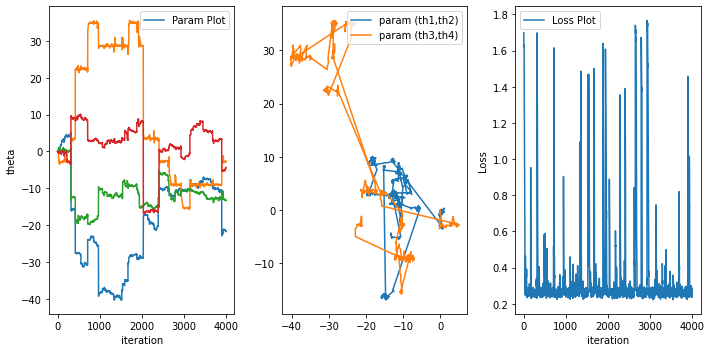

In [168]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
print('After 1000 iteration we have theta =',theta)
axes[0].plot(thdata)
axes[0].set_ylabel('theta')
axes[0].legend(['Param Plot'])
axes[0].set_xlabel('iteration')
axes[1].plot([item[2] for item in thdata],[item[3] for item in thdata],[item[0] for item in thdata],[item[1] for item in thdata])
axes[1].legend(['param (th1,th2)','param (th3,th4)'])

axes[2].plot(progress)
axes[2].legend(['Loss Plot'])
axes[2].set_ylabel('Loss')
axes[2].set_xlabel('iteration')
fig.tight_layout()

### c1=0.1(Large movement) delta=0.3+ (Small fluctuation)

In [169]:
progress=[];
theta=[0,0,0,0];
thdata=[];

c1=0.1   
delta=6
nshot=3000;
theta=np.array(theta)-SPSA(1,theta,c1,delta,nshot)
for ep in range(4000):
    delta=random.random()+0.3
    theta=theta-SPSA(1,theta,c1,delta,nshot)
    print(ep,"th iteration L=",lossCal2qubit(1,theta,nshot))
    progress.append(lossCal2qubit(1,theta,nshot))
    thdata.append(theta)

0 th iteration L= 1.6793333333333333
1 th iteration L= 1.6400000000000001
2 th iteration L= 1.6513333333333333
3 th iteration L= 1.6093333333333333
4 th iteration L= 1.5699999999999998
5 th iteration L= 1.5779999999999998
6 th iteration L= 1.5093333333333332
7 th iteration L= 1.4926666666666666
8 th iteration L= 1.414
9 th iteration L= 1.4046666666666667
10 th iteration L= 1.3166666666666667
11 th iteration L= 1.1993333333333334
12 th iteration L= 1.0693333333333332
13 th iteration L= 0.938
14 th iteration L= 0.74
15 th iteration L= 0.7053333333333334
16 th iteration L= 0.6586666666666667
17 th iteration L= 0.5946666666666667
18 th iteration L= 0.5433333333333333
19 th iteration L= 0.486
20 th iteration L= 0.45133333333333336
21 th iteration L= 0.41400000000000003
22 th iteration L= 0.3486666666666667
23 th iteration L= 0.362
24 th iteration L= 0.33333333333333337
25 th iteration L= 0.3446666666666667
26 th iteration L= 0.30800000000000005
27 th iteration L= 0.29666666666666663
28 th i

240 th iteration L= 0.258
241 th iteration L= 0.2453333333333333
242 th iteration L= 0.23133333333333328
243 th iteration L= 0.2593333333333333
244 th iteration L= 0.2713333333333333
245 th iteration L= 0.2526666666666667
246 th iteration L= 0.262
247 th iteration L= 0.2593333333333333
248 th iteration L= 0.2633333333333333
249 th iteration L= 0.27
250 th iteration L= 0.2413333333333333
251 th iteration L= 0.2726666666666666
252 th iteration L= 0.27
253 th iteration L= 0.248
254 th iteration L= 0.2733333333333333
255 th iteration L= 0.262
256 th iteration L= 0.2593333333333333
257 th iteration L= 0.2626666666666667
258 th iteration L= 0.2626666666666667
259 th iteration L= 0.268
260 th iteration L= 0.2506666666666667
261 th iteration L= 0.25
262 th iteration L= 0.2573333333333333
263 th iteration L= 0.2486666666666667
264 th iteration L= 0.2533333333333333
265 th iteration L= 0.2586666666666667
266 th iteration L= 0.2846666666666666
267 th iteration L= 0.2553333333333333
268 th iterati

471 th iteration L= 0.262
472 th iteration L= 0.2393333333333333
473 th iteration L= 0.25
474 th iteration L= 0.2453333333333333
475 th iteration L= 0.256
476 th iteration L= 0.2653333333333333
477 th iteration L= 0.2566666666666667
478 th iteration L= 0.2606666666666667
479 th iteration L= 0.2593333333333333
480 th iteration L= 0.2753333333333333
481 th iteration L= 0.2833333333333333
482 th iteration L= 0.2466666666666667
483 th iteration L= 0.2513333333333333
484 th iteration L= 0.242
485 th iteration L= 0.2526666666666667
486 th iteration L= 0.256
487 th iteration L= 0.2653333333333333
488 th iteration L= 0.268
489 th iteration L= 0.252
490 th iteration L= 0.274
491 th iteration L= 0.2586666666666667
492 th iteration L= 0.2846666666666666
493 th iteration L= 0.2586666666666667
494 th iteration L= 0.246
495 th iteration L= 0.2586666666666667
496 th iteration L= 0.274
497 th iteration L= 0.2746666666666666
498 th iteration L= 0.2426666666666667
499 th iteration L= 0.256
500 th iterat

711 th iteration L= 0.2533333333333333
712 th iteration L= 0.2666666666666667
713 th iteration L= 0.276
714 th iteration L= 0.258
715 th iteration L= 0.266
716 th iteration L= 0.2553333333333333
717 th iteration L= 0.2626666666666667
718 th iteration L= 0.256
719 th iteration L= 0.2486666666666667
720 th iteration L= 0.2273333333333334
721 th iteration L= 0.2466666666666667
722 th iteration L= 0.244
723 th iteration L= 0.2573333333333333
724 th iteration L= 0.2673333333333333
725 th iteration L= 0.2833333333333333
726 th iteration L= 0.2533333333333333
727 th iteration L= 0.2386666666666667
728 th iteration L= 0.29066666666666663
729 th iteration L= 0.2693333333333333
730 th iteration L= 0.2666666666666667
731 th iteration L= 0.2653333333333333
732 th iteration L= 0.2533333333333333
733 th iteration L= 0.2606666666666667
734 th iteration L= 0.2386666666666667
735 th iteration L= 0.2426666666666667
736 th iteration L= 0.2553333333333333
737 th iteration L= 0.2673333333333333
738 th iter

944 th iteration L= 0.2526666666666667
945 th iteration L= 0.236
946 th iteration L= 0.2433333333333333
947 th iteration L= 0.2693333333333333
948 th iteration L= 0.2513333333333333
949 th iteration L= 0.2573333333333333
950 th iteration L= 0.2513333333333333
951 th iteration L= 0.258
952 th iteration L= 0.262
953 th iteration L= 0.262
954 th iteration L= 0.27
955 th iteration L= 0.2586666666666667
956 th iteration L= 0.272
957 th iteration L= 0.262
958 th iteration L= 0.274
959 th iteration L= 0.2613333333333333
960 th iteration L= 0.2613333333333333
961 th iteration L= 0.25
962 th iteration L= 0.2766666666666666
963 th iteration L= 0.26
964 th iteration L= 0.2606666666666667
965 th iteration L= 0.2493333333333333
966 th iteration L= 0.2693333333333333
967 th iteration L= 0.26
968 th iteration L= 0.2546666666666667
969 th iteration L= 0.2526666666666667
970 th iteration L= 0.258
971 th iteration L= 0.2686666666666667
972 th iteration L= 0.2593333333333333
973 th iteration L= 0.25
974 

1178 th iteration L= 0.2706666666666667
1179 th iteration L= 0.268
1180 th iteration L= 0.264
1181 th iteration L= 0.2593333333333333
1182 th iteration L= 0.2586666666666667
1183 th iteration L= 0.22466666666666668
1184 th iteration L= 0.2533333333333333
1185 th iteration L= 0.246
1186 th iteration L= 0.272
1187 th iteration L= 0.2566666666666667
1188 th iteration L= 0.2573333333333333
1189 th iteration L= 0.256
1190 th iteration L= 0.2673333333333333
1191 th iteration L= 0.2613333333333333
1192 th iteration L= 0.2633333333333333
1193 th iteration L= 0.2613333333333333
1194 th iteration L= 0.272
1195 th iteration L= 0.2866666666666666
1196 th iteration L= 0.262
1197 th iteration L= 0.26
1198 th iteration L= 0.2733333333333333
1199 th iteration L= 0.254
1200 th iteration L= 0.254
1201 th iteration L= 0.272
1202 th iteration L= 0.2526666666666667
1203 th iteration L= 0.2533333333333333
1204 th iteration L= 0.24
1205 th iteration L= 0.264
1206 th iteration L= 0.2426666666666667
1207 th it

1410 th iteration L= 0.2586666666666667
1411 th iteration L= 0.268
1412 th iteration L= 0.2493333333333333
1413 th iteration L= 0.2693333333333333
1414 th iteration L= 0.262
1415 th iteration L= 0.262
1416 th iteration L= 0.2553333333333333
1417 th iteration L= 0.26
1418 th iteration L= 0.2446666666666667
1419 th iteration L= 0.2633333333333333
1420 th iteration L= 0.262
1421 th iteration L= 0.2426666666666667
1422 th iteration L= 0.256
1423 th iteration L= 0.2626666666666667
1424 th iteration L= 0.2626666666666667
1425 th iteration L= 0.2493333333333333
1426 th iteration L= 0.248
1427 th iteration L= 0.2586666666666667
1428 th iteration L= 0.262
1429 th iteration L= 0.256
1430 th iteration L= 0.2693333333333333
1431 th iteration L= 0.2806666666666666
1432 th iteration L= 0.2573333333333333
1433 th iteration L= 0.248
1434 th iteration L= 0.248
1435 th iteration L= 0.2573333333333333
1436 th iteration L= 0.2633333333333333
1437 th iteration L= 0.25
1438 th iteration L= 0.270666666666666

1637 th iteration L= 0.25
1638 th iteration L= 0.2713333333333333
1639 th iteration L= 0.27
1640 th iteration L= 0.2793333333333333
1641 th iteration L= 0.2646666666666667
1642 th iteration L= 0.2666666666666667
1643 th iteration L= 0.258
1644 th iteration L= 0.264
1645 th iteration L= 0.266
1646 th iteration L= 0.2513333333333333
1647 th iteration L= 0.2673333333333333
1648 th iteration L= 0.2533333333333333
1649 th iteration L= 0.2653333333333333
1650 th iteration L= 0.238
1651 th iteration L= 0.236
1652 th iteration L= 0.2806666666666666
1653 th iteration L= 0.2513333333333333
1654 th iteration L= 0.2753333333333333
1655 th iteration L= 0.2386666666666667
1656 th iteration L= 0.254
1657 th iteration L= 0.248
1658 th iteration L= 0.2513333333333333
1659 th iteration L= 0.2786666666666666
1660 th iteration L= 0.23533333333333328
1661 th iteration L= 0.246
1662 th iteration L= 0.2466666666666667
1663 th iteration L= 0.2673333333333333
1664 th iteration L= 0.2833333333333333
1665 th ite

1870 th iteration L= 0.2493333333333333
1871 th iteration L= 0.27
1872 th iteration L= 0.23133333333333328
1873 th iteration L= 0.26
1874 th iteration L= 0.278
1875 th iteration L= 0.252
1876 th iteration L= 0.2573333333333333
1877 th iteration L= 0.24
1878 th iteration L= 0.2606666666666667
1879 th iteration L= 0.2633333333333333
1880 th iteration L= 0.2513333333333333
1881 th iteration L= 0.2526666666666667
1882 th iteration L= 0.27
1883 th iteration L= 0.244
1884 th iteration L= 0.2673333333333333
1885 th iteration L= 0.2573333333333333
1886 th iteration L= 0.2673333333333333
1887 th iteration L= 0.252
1888 th iteration L= 0.2613333333333333
1889 th iteration L= 0.25
1890 th iteration L= 0.2606666666666667
1891 th iteration L= 0.2653333333333333
1892 th iteration L= 0.252
1893 th iteration L= 0.2653333333333333
1894 th iteration L= 0.2433333333333333
1895 th iteration L= 0.262
1896 th iteration L= 0.2546666666666667
1897 th iteration L= 0.2513333333333333
1898 th iteration L= 0.2586

2100 th iteration L= 0.2493333333333333
2101 th iteration L= 0.2606666666666667
2102 th iteration L= 0.246
2103 th iteration L= 0.272
2104 th iteration L= 0.2593333333333333
2105 th iteration L= 0.2793333333333333
2106 th iteration L= 0.246
2107 th iteration L= 0.23399999999999999
2108 th iteration L= 0.262
2109 th iteration L= 0.256
2110 th iteration L= 0.26
2111 th iteration L= 0.2486666666666667
2112 th iteration L= 0.2786666666666666
2113 th iteration L= 0.2646666666666667
2114 th iteration L= 0.2506666666666667
2115 th iteration L= 0.2806666666666666
2116 th iteration L= 0.2686666666666667
2117 th iteration L= 0.2693333333333333
2118 th iteration L= 0.26
2119 th iteration L= 0.2693333333333333
2120 th iteration L= 0.266
2121 th iteration L= 0.2513333333333333
2122 th iteration L= 0.2626666666666667
2123 th iteration L= 0.26
2124 th iteration L= 0.2713333333333333
2125 th iteration L= 0.2586666666666667
2126 th iteration L= 0.2526666666666667
2127 th iteration L= 0.2726666666666666

2334 th iteration L= 0.2746666666666666
2335 th iteration L= 0.256
2336 th iteration L= 0.2546666666666667
2337 th iteration L= 0.258
2338 th iteration L= 0.2606666666666667
2339 th iteration L= 0.262
2340 th iteration L= 0.2433333333333333
2341 th iteration L= 0.28
2342 th iteration L= 0.2653333333333333
2343 th iteration L= 0.25
2344 th iteration L= 0.2826666666666666
2345 th iteration L= 0.2493333333333333
2346 th iteration L= 0.2413333333333333
2347 th iteration L= 0.2626666666666667
2348 th iteration L= 0.2666666666666667
2349 th iteration L= 0.2433333333333333
2350 th iteration L= 0.2733333333333333
2351 th iteration L= 0.274
2352 th iteration L= 0.238
2353 th iteration L= 0.2613333333333333
2354 th iteration L= 0.2586666666666667
2355 th iteration L= 0.236
2356 th iteration L= 0.2513333333333333
2357 th iteration L= 0.2666666666666667
2358 th iteration L= 0.26
2359 th iteration L= 0.2493333333333333
2360 th iteration L= 0.2613333333333333
2361 th iteration L= 0.2546666666666667


2563 th iteration L= 0.248
2564 th iteration L= 0.276
2565 th iteration L= 0.2613333333333333
2566 th iteration L= 0.2613333333333333
2567 th iteration L= 0.2853333333333333
2568 th iteration L= 0.2566666666666667
2569 th iteration L= 0.258
2570 th iteration L= 0.252
2571 th iteration L= 0.2493333333333333
2572 th iteration L= 0.2473333333333333
2573 th iteration L= 0.26
2574 th iteration L= 0.23733333333333329
2575 th iteration L= 0.23199999999999998
2576 th iteration L= 0.2786666666666666
2577 th iteration L= 0.22333333333333338
2578 th iteration L= 0.26
2579 th iteration L= 0.248
2580 th iteration L= 0.2446666666666667
2581 th iteration L= 0.2653333333333333
2582 th iteration L= 0.2606666666666667
2583 th iteration L= 0.2766666666666666
2584 th iteration L= 0.262
2585 th iteration L= 0.278
2586 th iteration L= 0.2486666666666667
2587 th iteration L= 0.248
2588 th iteration L= 0.262
2589 th iteration L= 0.2693333333333333
2590 th iteration L= 0.2633333333333333
2591 th iteration L= 0

2790 th iteration L= 0.274
2791 th iteration L= 0.2553333333333333
2792 th iteration L= 0.272
2793 th iteration L= 0.2673333333333333
2794 th iteration L= 0.2773333333333333
2795 th iteration L= 0.2513333333333333
2796 th iteration L= 0.2546666666666667
2797 th iteration L= 0.2366666666666667
2798 th iteration L= 0.2686666666666667
2799 th iteration L= 0.238
2800 th iteration L= 0.2566666666666667
2801 th iteration L= 0.266
2802 th iteration L= 0.2633333333333333
2803 th iteration L= 0.262
2804 th iteration L= 0.2606666666666667
2805 th iteration L= 0.2506666666666667
2806 th iteration L= 0.26
2807 th iteration L= 0.2593333333333333
2808 th iteration L= 0.2826666666666666
2809 th iteration L= 0.23133333333333328
2810 th iteration L= 0.25
2811 th iteration L= 0.2733333333333333
2812 th iteration L= 0.25
2813 th iteration L= 0.28800000000000003
2814 th iteration L= 0.2733333333333333
2815 th iteration L= 0.272
2816 th iteration L= 0.2506666666666667
2817 th iteration L= 0.244666666666666

3020 th iteration L= 0.2593333333333333
3021 th iteration L= 0.2453333333333333
3022 th iteration L= 0.2473333333333333
3023 th iteration L= 0.2566666666666667
3024 th iteration L= 0.248
3025 th iteration L= 0.2686666666666667
3026 th iteration L= 0.252
3027 th iteration L= 0.2566666666666667
3028 th iteration L= 0.2553333333333333
3029 th iteration L= 0.2786666666666666
3030 th iteration L= 0.23333333333333328
3031 th iteration L= 0.2713333333333333
3032 th iteration L= 0.2673333333333333
3033 th iteration L= 0.28800000000000003
3034 th iteration L= 0.2573333333333333
3035 th iteration L= 0.2526666666666667
3036 th iteration L= 0.2526666666666667
3037 th iteration L= 0.2593333333333333
3038 th iteration L= 0.25
3039 th iteration L= 0.2606666666666667
3040 th iteration L= 0.2586666666666667
3041 th iteration L= 0.272
3042 th iteration L= 0.2806666666666666
3043 th iteration L= 0.2606666666666667
3044 th iteration L= 0.266
3045 th iteration L= 0.236
3046 th iteration L= 0.26733333333333

3250 th iteration L= 0.2713333333333333
3251 th iteration L= 0.2613333333333333
3252 th iteration L= 0.2606666666666667
3253 th iteration L= 0.23399999999999999
3254 th iteration L= 0.262
3255 th iteration L= 0.262
3256 th iteration L= 0.2446666666666667
3257 th iteration L= 0.2566666666666667
3258 th iteration L= 0.2553333333333333
3259 th iteration L= 0.2786666666666666
3260 th iteration L= 0.2733333333333333
3261 th iteration L= 0.2453333333333333
3262 th iteration L= 0.2453333333333333
3263 th iteration L= 0.2393333333333333
3264 th iteration L= 0.2586666666666667
3265 th iteration L= 0.23399999999999999
3266 th iteration L= 0.2793333333333333
3267 th iteration L= 0.2733333333333333
3268 th iteration L= 0.258
3269 th iteration L= 0.2673333333333333
3270 th iteration L= 0.2593333333333333
3271 th iteration L= 0.258
3272 th iteration L= 0.2653333333333333
3273 th iteration L= 0.26
3274 th iteration L= 0.254
3275 th iteration L= 0.2646666666666667
3276 th iteration L= 0.26333333333333

3481 th iteration L= 0.2666666666666667
3482 th iteration L= 0.2686666666666667
3483 th iteration L= 0.2626666666666667
3484 th iteration L= 0.2553333333333333
3485 th iteration L= 0.2493333333333333
3486 th iteration L= 0.2366666666666667
3487 th iteration L= 0.2473333333333333
3488 th iteration L= 0.2573333333333333
3489 th iteration L= 0.242
3490 th iteration L= 0.2646666666666667
3491 th iteration L= 0.28800000000000003
3492 th iteration L= 0.2513333333333333
3493 th iteration L= 0.26
3494 th iteration L= 0.276
3495 th iteration L= 0.2406666666666667
3496 th iteration L= 0.2773333333333333
3497 th iteration L= 0.2526666666666667
3498 th iteration L= 0.2386666666666667
3499 th iteration L= 0.266
3500 th iteration L= 0.264
3501 th iteration L= 0.2633333333333333
3502 th iteration L= 0.2606666666666667
3503 th iteration L= 0.2613333333333333
3504 th iteration L= 0.2713333333333333
3505 th iteration L= 0.2466666666666667
3506 th iteration L= 0.264
3507 th iteration L= 0.265333333333333

3714 th iteration L= 0.256
3715 th iteration L= 0.246
3716 th iteration L= 0.2413333333333333
3717 th iteration L= 0.2413333333333333
3718 th iteration L= 0.2446666666666667
3719 th iteration L= 0.2473333333333333
3720 th iteration L= 0.2726666666666666
3721 th iteration L= 0.2453333333333333
3722 th iteration L= 0.274
3723 th iteration L= 0.2466666666666667
3724 th iteration L= 0.2666666666666667
3725 th iteration L= 0.272
3726 th iteration L= 0.2566666666666667
3727 th iteration L= 0.256
3728 th iteration L= 0.272
3729 th iteration L= 0.22999999999999998
3730 th iteration L= 0.2673333333333333
3731 th iteration L= 0.28
3732 th iteration L= 0.2593333333333333
3733 th iteration L= 0.262
3734 th iteration L= 0.2453333333333333
3735 th iteration L= 0.26
3736 th iteration L= 0.2346666666666667
3737 th iteration L= 0.256
3738 th iteration L= 0.2606666666666667
3739 th iteration L= 0.2526666666666667
3740 th iteration L= 0.2553333333333333
3741 th iteration L= 0.2666666666666667
3742 th ite

3941 th iteration L= 0.2553333333333333
3942 th iteration L= 0.254
3943 th iteration L= 0.274
3944 th iteration L= 0.2673333333333333
3945 th iteration L= 0.26
3946 th iteration L= 0.2386666666666667
3947 th iteration L= 0.2613333333333333
3948 th iteration L= 0.2666666666666667
3949 th iteration L= 0.246
3950 th iteration L= 0.254
3951 th iteration L= 0.2566666666666667
3952 th iteration L= 0.2653333333333333
3953 th iteration L= 0.278
3954 th iteration L= 0.26
3955 th iteration L= 0.2546666666666667
3956 th iteration L= 0.28600000000000003
3957 th iteration L= 0.2553333333333333
3958 th iteration L= 0.2773333333333333
3959 th iteration L= 0.258
3960 th iteration L= 0.2626666666666667
3961 th iteration L= 0.252
3962 th iteration L= 0.2473333333333333
3963 th iteration L= 0.2633333333333333
3964 th iteration L= 0.2446666666666667
3965 th iteration L= 0.2713333333333333
3966 th iteration L= 0.2433333333333333
3967 th iteration L= 0.258
3968 th iteration L= 0.2546666666666667
3969 th ite

After 1000 iteration we have theta = [-0.59096371 -2.73316523 -0.01193892  0.51762063]


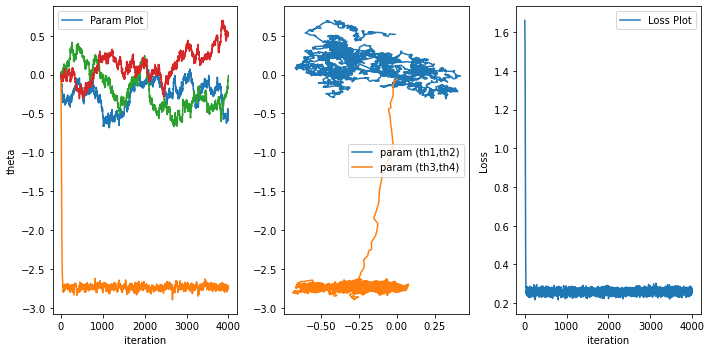

In [170]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
print('After 1000 iteration we have theta =',theta)
axes[0].plot(thdata)
axes[0].set_ylabel('theta')
axes[0].legend(['Param Plot'])
axes[0].set_xlabel('iteration')
axes[1].plot([item[2] for item in thdata],[item[3] for item in thdata],[item[0] for item in thdata],[item[1] for item in thdata])
axes[1].legend(['param (th1,th2)','param (th3,th4)'])

axes[2].plot(progress)
axes[2].legend(['Loss Plot'])
axes[2].set_ylabel('Loss')
axes[2].set_xlabel('iteration')
fig.tight_layout()

### c1=0.1(Large movement) delta=0.1+ (Medium fluctuation)

In [171]:
progress=[];
theta=[0,0,0,0];
thdata=[];

c1=0.1   
delta=6
nshot=3000;
theta=np.array(theta)-SPSA(1,theta,c1,delta,nshot)
for ep in range(4000):
    delta=random.random()+0.1
    theta=theta-SPSA(1,theta,c1,delta,nshot)
    print(ep,"th iteration L=",lossCal2qubit(1,theta,nshot))
    progress.append(lossCal2qubit(1,theta,nshot))
    thdata.append(theta)

0 th iteration L= 1.6906666666666665
1 th iteration L= 1.6386666666666667
2 th iteration L= 1.6266666666666667
3 th iteration L= 1.592
4 th iteration L= 1.5606666666666666
5 th iteration L= 1.5206666666666666
6 th iteration L= 1.4273333333333333
7 th iteration L= 1.4206666666666667
8 th iteration L= 1.162
9 th iteration L= 1.1153333333333333
10 th iteration L= 1.0813333333333333
11 th iteration L= 1.002
12 th iteration L= 0.8926666666666667
13 th iteration L= 0.6973333333333334
14 th iteration L= 0.6639999999999999
15 th iteration L= 0.4633333333333334
16 th iteration L= 0.43600000000000005
17 th iteration L= 0.406
18 th iteration L= 0.3906666666666667
19 th iteration L= 0.33533333333333337
20 th iteration L= 0.31200000000000006
21 th iteration L= 0.29533333333333334
22 th iteration L= 0.29133333333333333
23 th iteration L= 0.246
24 th iteration L= 0.2573333333333333
25 th iteration L= 0.25
26 th iteration L= 0.26
27 th iteration L= 0.2566666666666667
28 th iteration L= 0.2533333333333

237 th iteration L= 0.2606666666666667
238 th iteration L= 0.2693333333333333
239 th iteration L= 0.258
240 th iteration L= 0.254
241 th iteration L= 0.28733333333333333
242 th iteration L= 0.2553333333333333
243 th iteration L= 0.2506666666666667
244 th iteration L= 0.254
245 th iteration L= 0.254
246 th iteration L= 0.28200000000000003
247 th iteration L= 0.2646666666666667
248 th iteration L= 0.2473333333333333
249 th iteration L= 0.2653333333333333
250 th iteration L= 0.256
251 th iteration L= 0.268
252 th iteration L= 0.2533333333333333
253 th iteration L= 0.256
254 th iteration L= 0.2613333333333333
255 th iteration L= 0.30333333333333334
256 th iteration L= 0.248
257 th iteration L= 0.252
258 th iteration L= 0.258
259 th iteration L= 0.2673333333333333
260 th iteration L= 0.252
261 th iteration L= 0.2706666666666667
262 th iteration L= 0.252
263 th iteration L= 0.28733333333333333
264 th iteration L= 0.27
265 th iteration L= 0.2586666666666667
266 th iteration L= 0.26
267 th ite

476 th iteration L= 0.2526666666666667
477 th iteration L= 0.2613333333333333
478 th iteration L= 0.2653333333333333
479 th iteration L= 0.2466666666666667
480 th iteration L= 0.23733333333333329
481 th iteration L= 0.2613333333333333
482 th iteration L= 0.2646666666666667
483 th iteration L= 0.2566666666666667
484 th iteration L= 0.2533333333333333
485 th iteration L= 0.2546666666666667
486 th iteration L= 0.268
487 th iteration L= 0.2433333333333333
488 th iteration L= 0.2666666666666667
489 th iteration L= 0.2773333333333333
490 th iteration L= 0.248
491 th iteration L= 0.244
492 th iteration L= 0.2566666666666667
493 th iteration L= 0.2666666666666667
494 th iteration L= 0.2693333333333333
495 th iteration L= 0.2426666666666667
496 th iteration L= 0.2513333333333333
497 th iteration L= 0.2553333333333333
498 th iteration L= 0.242
499 th iteration L= 0.2546666666666667
500 th iteration L= 0.2626666666666667
501 th iteration L= 0.2726666666666666
502 th iteration L= 0.259333333333333

710 th iteration L= 0.252
711 th iteration L= 0.2553333333333333
712 th iteration L= 0.2473333333333333
713 th iteration L= 0.28200000000000003
714 th iteration L= 0.2393333333333333
715 th iteration L= 0.23733333333333329
716 th iteration L= 0.2486666666666667
717 th iteration L= 0.2646666666666667
718 th iteration L= 0.2553333333333333
719 th iteration L= 0.252
720 th iteration L= 0.2453333333333333
721 th iteration L= 0.2573333333333333
722 th iteration L= 0.2453333333333333
723 th iteration L= 0.266
724 th iteration L= 0.2606666666666667
725 th iteration L= 0.2506666666666667
726 th iteration L= 0.2606666666666667
727 th iteration L= 0.2653333333333333
728 th iteration L= 0.2606666666666667
729 th iteration L= 0.2693333333333333
730 th iteration L= 0.2673333333333333
731 th iteration L= 0.2546666666666667
732 th iteration L= 0.2626666666666667
733 th iteration L= 0.2726666666666666
734 th iteration L= 0.244
735 th iteration L= 0.2693333333333333
736 th iteration L= 0.27866666666666

947 th iteration L= 0.2573333333333333
948 th iteration L= 0.254
949 th iteration L= 0.258
950 th iteration L= 0.2513333333333333
951 th iteration L= 0.268
952 th iteration L= 0.2713333333333333
953 th iteration L= 0.276
954 th iteration L= 0.2733333333333333
955 th iteration L= 0.2593333333333333
956 th iteration L= 0.2486666666666667
957 th iteration L= 0.2666666666666667
958 th iteration L= 0.2526666666666667
959 th iteration L= 0.248
960 th iteration L= 0.2493333333333333
961 th iteration L= 0.2453333333333333
962 th iteration L= 0.268
963 th iteration L= 0.2573333333333333
964 th iteration L= 0.2466666666666667
965 th iteration L= 0.244
966 th iteration L= 0.268
967 th iteration L= 0.2526666666666667
968 th iteration L= 0.28733333333333333
969 th iteration L= 0.2613333333333333
970 th iteration L= 0.2473333333333333
971 th iteration L= 0.2686666666666667
972 th iteration L= 0.27
973 th iteration L= 0.262
974 th iteration L= 0.2586666666666667
975 th iteration L= 0.2806666666666666

1176 th iteration L= 0.2486666666666667
1177 th iteration L= 0.2566666666666667
1178 th iteration L= 0.242
1179 th iteration L= 0.23533333333333328
1180 th iteration L= 0.246
1181 th iteration L= 0.254
1182 th iteration L= 0.2346666666666667
1183 th iteration L= 0.2753333333333333
1184 th iteration L= 0.2513333333333333
1185 th iteration L= 0.2553333333333333
1186 th iteration L= 0.238
1187 th iteration L= 0.2733333333333333
1188 th iteration L= 0.256
1189 th iteration L= 0.242
1190 th iteration L= 0.2826666666666666
1191 th iteration L= 0.26
1192 th iteration L= 0.2613333333333333
1193 th iteration L= 0.266
1194 th iteration L= 0.2506666666666667
1195 th iteration L= 0.2493333333333333
1196 th iteration L= 0.248
1197 th iteration L= 0.2526666666666667
1198 th iteration L= 0.2606666666666667
1199 th iteration L= 0.2633333333333333
1200 th iteration L= 0.272
1201 th iteration L= 0.258
1202 th iteration L= 0.2446666666666667
1203 th iteration L= 0.27
1204 th iteration L= 0.24866666666666

1404 th iteration L= 0.26
1405 th iteration L= 0.2466666666666667
1406 th iteration L= 0.256
1407 th iteration L= 0.2493333333333333
1408 th iteration L= 0.2633333333333333
1409 th iteration L= 0.2593333333333333
1410 th iteration L= 0.2493333333333333
1411 th iteration L= 0.2566666666666667
1412 th iteration L= 0.2386666666666667
1413 th iteration L= 0.2606666666666667
1414 th iteration L= 0.2533333333333333
1415 th iteration L= 0.27
1416 th iteration L= 0.258
1417 th iteration L= 0.236
1418 th iteration L= 0.25
1419 th iteration L= 0.258
1420 th iteration L= 0.2446666666666667
1421 th iteration L= 0.2386666666666667
1422 th iteration L= 0.2693333333333333
1423 th iteration L= 0.2706666666666667
1424 th iteration L= 0.2433333333333333
1425 th iteration L= 0.2346666666666667
1426 th iteration L= 0.26
1427 th iteration L= 0.23533333333333328
1428 th iteration L= 0.258
1429 th iteration L= 0.2613333333333333
1430 th iteration L= 0.2593333333333333
1431 th iteration L= 0.2653333333333333


1628 th iteration L= 0.2513333333333333
1629 th iteration L= 0.2573333333333333
1630 th iteration L= 0.25
1631 th iteration L= 0.2746666666666666
1632 th iteration L= 0.29466666666666663
1633 th iteration L= 0.252
1634 th iteration L= 0.25
1635 th iteration L= 0.25
1636 th iteration L= 0.274
1637 th iteration L= 0.2653333333333333
1638 th iteration L= 0.2566666666666667
1639 th iteration L= 0.2733333333333333
1640 th iteration L= 0.2606666666666667
1641 th iteration L= 0.2553333333333333
1642 th iteration L= 0.276
1643 th iteration L= 0.2653333333333333
1644 th iteration L= 0.2846666666666666
1645 th iteration L= 0.25
1646 th iteration L= 0.2506666666666667
1647 th iteration L= 0.244
1648 th iteration L= 0.2586666666666667
1649 th iteration L= 0.2653333333333333
1650 th iteration L= 0.2653333333333333
1651 th iteration L= 0.2453333333333333
1652 th iteration L= 0.274
1653 th iteration L= 0.2526666666666667
1654 th iteration L= 0.2733333333333333
1655 th iteration L= 0.2526666666666667


1856 th iteration L= 0.272
1857 th iteration L= 0.256
1858 th iteration L= 0.2553333333333333
1859 th iteration L= 0.2666666666666667
1860 th iteration L= 0.278
1861 th iteration L= 0.2633333333333333
1862 th iteration L= 0.272
1863 th iteration L= 0.2666666666666667
1864 th iteration L= 0.268
1865 th iteration L= 0.2646666666666667
1866 th iteration L= 0.2746666666666666
1867 th iteration L= 0.2506666666666667
1868 th iteration L= 0.256
1869 th iteration L= 0.2673333333333333
1870 th iteration L= 0.2753333333333333
1871 th iteration L= 0.2606666666666667
1872 th iteration L= 0.252
1873 th iteration L= 0.2553333333333333
1874 th iteration L= 0.2666666666666667
1875 th iteration L= 0.2833333333333333
1876 th iteration L= 0.2726666666666666
1877 th iteration L= 0.2713333333333333
1878 th iteration L= 0.272
1879 th iteration L= 0.262
1880 th iteration L= 0.2526666666666667
1881 th iteration L= 0.2693333333333333
1882 th iteration L= 0.262
1883 th iteration L= 0.2786666666666666
1884 th it

2084 th iteration L= 0.2593333333333333
2085 th iteration L= 0.22666666666666668
2086 th iteration L= 0.2753333333333333
2087 th iteration L= 0.2653333333333333
2088 th iteration L= 0.262
2089 th iteration L= 0.2573333333333333
2090 th iteration L= 0.2626666666666667
2091 th iteration L= 0.254
2092 th iteration L= 0.252
2093 th iteration L= 0.2653333333333333
2094 th iteration L= 0.2346666666666667
2095 th iteration L= 0.2813333333333333
2096 th iteration L= 0.2453333333333333
2097 th iteration L= 0.254
2098 th iteration L= 0.2673333333333333
2099 th iteration L= 0.2546666666666667
2100 th iteration L= 0.2633333333333333
2101 th iteration L= 0.2586666666666667
2102 th iteration L= 0.2633333333333333
2103 th iteration L= 0.2546666666666667
2104 th iteration L= 0.2733333333333333
2105 th iteration L= 0.2813333333333333
2106 th iteration L= 0.2826666666666666
2107 th iteration L= 0.2693333333333333
2108 th iteration L= 0.264
2109 th iteration L= 0.2766666666666666
2110 th iteration L= 0.2

2313 th iteration L= 0.2726666666666666
2314 th iteration L= 0.262
2315 th iteration L= 0.2413333333333333
2316 th iteration L= 0.2746666666666666
2317 th iteration L= 0.242
2318 th iteration L= 0.262
2319 th iteration L= 0.2726666666666666
2320 th iteration L= 0.2773333333333333
2321 th iteration L= 0.27
2322 th iteration L= 0.2526666666666667
2323 th iteration L= 0.262
2324 th iteration L= 0.256
2325 th iteration L= 0.2746666666666666
2326 th iteration L= 0.2466666666666667
2327 th iteration L= 0.262
2328 th iteration L= 0.262
2329 th iteration L= 0.256
2330 th iteration L= 0.2593333333333333
2331 th iteration L= 0.252
2332 th iteration L= 0.22999999999999998
2333 th iteration L= 0.2586666666666667
2334 th iteration L= 0.2593333333333333
2335 th iteration L= 0.2633333333333333
2336 th iteration L= 0.2506666666666667
2337 th iteration L= 0.2586666666666667
2338 th iteration L= 0.2633333333333333
2339 th iteration L= 0.2573333333333333
2340 th iteration L= 0.2746666666666666
2341 th it

2541 th iteration L= 0.264
2542 th iteration L= 0.262
2543 th iteration L= 0.274
2544 th iteration L= 0.2686666666666667
2545 th iteration L= 0.2433333333333333
2546 th iteration L= 0.264
2547 th iteration L= 0.2593333333333333
2548 th iteration L= 0.254
2549 th iteration L= 0.2626666666666667
2550 th iteration L= 0.252
2551 th iteration L= 0.2746666666666666
2552 th iteration L= 0.2766666666666666
2553 th iteration L= 0.2486666666666667
2554 th iteration L= 0.2346666666666667
2555 th iteration L= 0.2433333333333333
2556 th iteration L= 0.2513333333333333
2557 th iteration L= 0.2786666666666666
2558 th iteration L= 0.2646666666666667
2559 th iteration L= 0.2626666666666667
2560 th iteration L= 0.2826666666666666
2561 th iteration L= 0.2566666666666667
2562 th iteration L= 0.28200000000000003
2563 th iteration L= 0.254
2564 th iteration L= 0.262
2565 th iteration L= 0.2733333333333333
2566 th iteration L= 0.28200000000000003
2567 th iteration L= 0.2726666666666666
2568 th iteration L= 0

2772 th iteration L= 0.27
2773 th iteration L= 0.2693333333333333
2774 th iteration L= 0.264
2775 th iteration L= 0.2626666666666667
2776 th iteration L= 0.254
2777 th iteration L= 0.2726666666666666
2778 th iteration L= 0.2726666666666666
2779 th iteration L= 0.254
2780 th iteration L= 0.2566666666666667
2781 th iteration L= 0.2593333333333333
2782 th iteration L= 0.2446666666666667
2783 th iteration L= 0.2673333333333333
2784 th iteration L= 0.23199999999999998
2785 th iteration L= 0.2386666666666667
2786 th iteration L= 0.28
2787 th iteration L= 0.2666666666666667
2788 th iteration L= 0.2546666666666667
2789 th iteration L= 0.256
2790 th iteration L= 0.2533333333333333
2791 th iteration L= 0.2613333333333333
2792 th iteration L= 0.262
2793 th iteration L= 0.2453333333333333
2794 th iteration L= 0.254
2795 th iteration L= 0.254
2796 th iteration L= 0.23333333333333328
2797 th iteration L= 0.248
2798 th iteration L= 0.2526666666666667
2799 th iteration L= 0.2453333333333333
2800 th it

3000 th iteration L= 0.2806666666666666
3001 th iteration L= 0.2726666666666666
3002 th iteration L= 0.2466666666666667
3003 th iteration L= 0.25
3004 th iteration L= 0.2486666666666667
3005 th iteration L= 0.2673333333333333
3006 th iteration L= 0.27
3007 th iteration L= 0.2413333333333333
3008 th iteration L= 0.2686666666666667
3009 th iteration L= 0.2606666666666667
3010 th iteration L= 0.2506666666666667
3011 th iteration L= 0.2593333333333333
3012 th iteration L= 0.2793333333333333
3013 th iteration L= 0.2533333333333333
3014 th iteration L= 0.2653333333333333
3015 th iteration L= 0.2886666666666666
3016 th iteration L= 0.23533333333333328
3017 th iteration L= 0.22533333333333339
3018 th iteration L= 0.2566666666666667
3019 th iteration L= 0.2573333333333333
3020 th iteration L= 0.262
3021 th iteration L= 0.268
3022 th iteration L= 0.264
3023 th iteration L= 0.2766666666666666
3024 th iteration L= 0.2506666666666667
3025 th iteration L= 0.2573333333333333
3026 th iteration L= 0.24

3227 th iteration L= 0.2473333333333333
3228 th iteration L= 0.28
3229 th iteration L= 0.2553333333333333
3230 th iteration L= 0.2406666666666667
3231 th iteration L= 0.2493333333333333
3232 th iteration L= 0.268
3233 th iteration L= 0.22533333333333339
3234 th iteration L= 0.2586666666666667
3235 th iteration L= 0.2653333333333333
3236 th iteration L= 0.29000000000000004
3237 th iteration L= 0.2653333333333333
3238 th iteration L= 0.248
3239 th iteration L= 0.272
3240 th iteration L= 0.26
3241 th iteration L= 0.2713333333333333
3242 th iteration L= 0.264
3243 th iteration L= 0.25
3244 th iteration L= 0.2433333333333333
3245 th iteration L= 0.2646666666666667
3246 th iteration L= 0.258
3247 th iteration L= 0.264
3248 th iteration L= 0.278
3249 th iteration L= 0.2453333333333333
3250 th iteration L= 0.2833333333333333
3251 th iteration L= 0.2633333333333333
3252 th iteration L= 0.2493333333333333
3253 th iteration L= 0.23333333333333328
3254 th iteration L= 0.2753333333333333
3255 th it

3463 th iteration L= 0.2506666666666667
3464 th iteration L= 0.2553333333333333
3465 th iteration L= 0.2806666666666666
3466 th iteration L= 0.2733333333333333
3467 th iteration L= 0.254
3468 th iteration L= 0.2726666666666666
3469 th iteration L= 0.2646666666666667
3470 th iteration L= 0.2393333333333333
3471 th iteration L= 0.2686666666666667
3472 th iteration L= 0.2513333333333333
3473 th iteration L= 0.2746666666666666
3474 th iteration L= 0.23133333333333328
3475 th iteration L= 0.2646666666666667
3476 th iteration L= 0.262
3477 th iteration L= 0.2693333333333333
3478 th iteration L= 0.256
3479 th iteration L= 0.2673333333333333
3480 th iteration L= 0.2693333333333333
3481 th iteration L= 0.2633333333333333
3482 th iteration L= 0.2466666666666667
3483 th iteration L= 0.2733333333333333
3484 th iteration L= 0.2566666666666667
3485 th iteration L= 0.238
3486 th iteration L= 0.2553333333333333
3487 th iteration L= 0.274
3488 th iteration L= 0.238
3489 th iteration L= 0.27
3490 th ite

3693 th iteration L= 0.2433333333333333
3694 th iteration L= 0.254
3695 th iteration L= 0.2666666666666667
3696 th iteration L= 0.266
3697 th iteration L= 0.2486666666666667
3698 th iteration L= 0.27
3699 th iteration L= 0.254
3700 th iteration L= 0.2613333333333333
3701 th iteration L= 0.276
3702 th iteration L= 0.2626666666666667
3703 th iteration L= 0.2426666666666667
3704 th iteration L= 0.2573333333333333
3705 th iteration L= 0.264
3706 th iteration L= 0.26
3707 th iteration L= 0.2693333333333333
3708 th iteration L= 0.264
3709 th iteration L= 0.2753333333333333
3710 th iteration L= 0.26
3711 th iteration L= 0.2866666666666666
3712 th iteration L= 0.272
3713 th iteration L= 0.2533333333333333
3714 th iteration L= 0.27
3715 th iteration L= 0.2693333333333333
3716 th iteration L= 0.2593333333333333
3717 th iteration L= 0.28733333333333333
3718 th iteration L= 0.2526666666666667
3719 th iteration L= 0.2766666666666666
3720 th iteration L= 0.2486666666666667
3721 th iteration L= 0.263

3927 th iteration L= 0.252
3928 th iteration L= 0.23399999999999999
3929 th iteration L= 0.262
3930 th iteration L= 0.2686666666666667
3931 th iteration L= 0.2513333333333333
3932 th iteration L= 0.254
3933 th iteration L= 0.2573333333333333
3934 th iteration L= 0.25
3935 th iteration L= 0.26
3936 th iteration L= 0.2433333333333333
3937 th iteration L= 0.2613333333333333
3938 th iteration L= 0.248
3939 th iteration L= 0.28800000000000003
3940 th iteration L= 0.26
3941 th iteration L= 0.2553333333333333
3942 th iteration L= 0.2686666666666667
3943 th iteration L= 0.24
3944 th iteration L= 0.2553333333333333
3945 th iteration L= 0.2773333333333333
3946 th iteration L= 0.264
3947 th iteration L= 0.2566666666666667
3948 th iteration L= 0.2646666666666667
3949 th iteration L= 0.2346666666666667
3950 th iteration L= 0.246
3951 th iteration L= 0.252
3952 th iteration L= 0.28
3953 th iteration L= 0.28
3954 th iteration L= 0.22933333333333328
3955 th iteration L= 0.272
3956 th iteration L= 0.24

After 1000 iteration we have theta = [ 3.61470417 -2.73610579 -2.04026212  0.99320514]


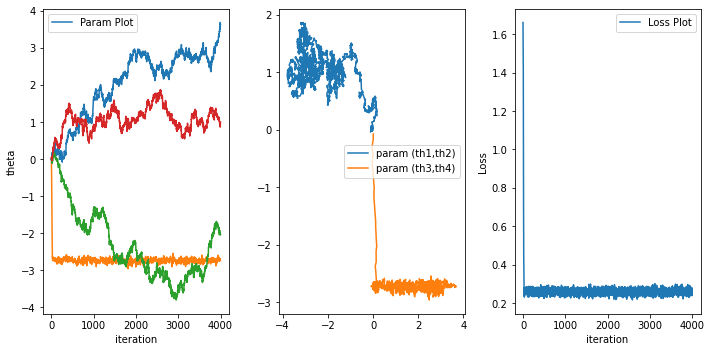

In [172]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
print('After 1000 iteration we have theta =',theta)
axes[0].plot(thdata)
axes[0].set_ylabel('theta')
axes[0].legend(['Param Plot'])
axes[0].set_xlabel('iteration')
axes[1].plot([item[2] for item in thdata],[item[3] for item in thdata],[item[0] for item in thdata],[item[1] for item in thdata])
axes[1].legend(['param (th1,th2)','param (th3,th4)'])

axes[2].plot(progress)
axes[2].legend(['Loss Plot'])
axes[2].set_ylabel('Loss')
axes[2].set_xlabel('iteration')
fig.tight_layout()

### c1=0.1(Large movement) delta=0+ (Large fluctuation)

In [173]:
progress=[];
theta=[0,0,0,0];
thdata=[];

c1=0.1   
delta=6
nshot=3000;
theta=np.array(theta)-SPSA(1,theta,c1,delta,nshot)
for ep in range(4000):
    delta=random.random()
    theta=theta-SPSA(1,theta,c1,delta,nshot)
    print(ep,"th iteration L=",lossCal2qubit(1,theta,nshot))
    progress.append(lossCal2qubit(1,theta,nshot))
    thdata.append(theta)

0 th iteration L= 1.662
1 th iteration L= 1.6406666666666667
2 th iteration L= 1.6046666666666667
3 th iteration L= 1.5473333333333334
4 th iteration L= 1.5653333333333332
5 th iteration L= 0.952
6 th iteration L= 0.83
7 th iteration L= 0.6866666666666666
8 th iteration L= 0.6133333333333333
9 th iteration L= 0.5246666666666666
10 th iteration L= 0.45466666666666666
11 th iteration L= 0.3666666666666667
12 th iteration L= 0.3453333333333334
13 th iteration L= 0.32733333333333337
14 th iteration L= 0.30133333333333334
15 th iteration L= 0.30266666666666664
16 th iteration L= 0.2766666666666666
17 th iteration L= 0.3466666666666667
18 th iteration L= 0.33599999999999997
19 th iteration L= 0.32599999999999996
20 th iteration L= 0.32933333333333337
21 th iteration L= 0.2693333333333333
22 th iteration L= 0.2633333333333333
23 th iteration L= 0.278
24 th iteration L= 0.2773333333333333
25 th iteration L= 0.2706666666666667
26 th iteration L= 0.2513333333333333
27 th iteration L= 0.246666666

240 th iteration L= 0.258
241 th iteration L= 0.2726666666666666
242 th iteration L= 0.258
243 th iteration L= 0.246
244 th iteration L= 0.2586666666666667
245 th iteration L= 0.2586666666666667
246 th iteration L= 0.2706666666666667
247 th iteration L= 0.248
248 th iteration L= 0.2753333333333333
249 th iteration L= 0.2606666666666667
250 th iteration L= 0.2546666666666667
251 th iteration L= 0.2733333333333333
252 th iteration L= 0.2406666666666667
253 th iteration L= 0.25
254 th iteration L= 0.252
255 th iteration L= 0.2646666666666667
256 th iteration L= 0.2426666666666667
257 th iteration L= 0.2526666666666667
258 th iteration L= 0.27
259 th iteration L= 0.2506666666666667
260 th iteration L= 0.274
261 th iteration L= 0.2686666666666667
262 th iteration L= 0.2713333333333333
263 th iteration L= 0.2506666666666667
264 th iteration L= 0.2666666666666667
265 th iteration L= 0.2606666666666667
266 th iteration L= 0.2506666666666667
267 th iteration L= 0.2546666666666667
268 th iterati

474 th iteration L= 0.2546666666666667
475 th iteration L= 0.2473333333333333
476 th iteration L= 0.2693333333333333
477 th iteration L= 0.272
478 th iteration L= 0.2586666666666667
479 th iteration L= 0.2453333333333333
480 th iteration L= 0.266
481 th iteration L= 0.2686666666666667
482 th iteration L= 0.2633333333333333
483 th iteration L= 0.28400000000000003
484 th iteration L= 0.258
485 th iteration L= 0.2566666666666667
486 th iteration L= 0.2566666666666667
487 th iteration L= 0.2633333333333333
488 th iteration L= 0.2586666666666667
489 th iteration L= 0.2766666666666666
490 th iteration L= 0.2746666666666666
491 th iteration L= 0.2646666666666667
492 th iteration L= 0.2553333333333333
493 th iteration L= 0.244
494 th iteration L= 0.2413333333333333
495 th iteration L= 0.2513333333333333
496 th iteration L= 0.27
497 th iteration L= 0.2426666666666667
498 th iteration L= 0.2746666666666666
499 th iteration L= 0.272
500 th iteration L= 0.242
501 th iteration L= 0.2433333333333333

707 th iteration L= 0.26
708 th iteration L= 0.27
709 th iteration L= 0.2706666666666667
710 th iteration L= 0.27
711 th iteration L= 0.258
712 th iteration L= 0.2806666666666666
713 th iteration L= 0.2726666666666666
714 th iteration L= 0.2626666666666667
715 th iteration L= 0.2666666666666667
716 th iteration L= 0.2473333333333333
717 th iteration L= 0.24
718 th iteration L= 0.2613333333333333
719 th iteration L= 0.2506666666666667
720 th iteration L= 0.2453333333333333
721 th iteration L= 0.2666666666666667
722 th iteration L= 0.2526666666666667
723 th iteration L= 0.28400000000000003
724 th iteration L= 0.2493333333333333
725 th iteration L= 0.2833333333333333
726 th iteration L= 0.2706666666666667
727 th iteration L= 0.2753333333333333
728 th iteration L= 0.274
729 th iteration L= 0.2673333333333333
730 th iteration L= 0.26
731 th iteration L= 0.23333333333333328
732 th iteration L= 0.266
733 th iteration L= 0.2573333333333333
734 th iteration L= 0.2833333333333333
735 th iteratio

938 th iteration L= 0.2773333333333333
939 th iteration L= 0.29333333333333333
940 th iteration L= 0.2686666666666667
941 th iteration L= 0.2793333333333333
942 th iteration L= 0.2433333333333333
943 th iteration L= 0.2673333333333333
944 th iteration L= 0.2666666666666667
945 th iteration L= 0.272
946 th iteration L= 0.278
947 th iteration L= 0.2666666666666667
948 th iteration L= 0.26
949 th iteration L= 0.2666666666666667
950 th iteration L= 0.266
951 th iteration L= 0.2666666666666667
952 th iteration L= 0.2693333333333333
953 th iteration L= 0.254
954 th iteration L= 0.2586666666666667
955 th iteration L= 0.2606666666666667
956 th iteration L= 0.2693333333333333
957 th iteration L= 0.238
958 th iteration L= 0.2646666666666667
959 th iteration L= 0.278
960 th iteration L= 0.2653333333333333
961 th iteration L= 0.278
962 th iteration L= 0.2466666666666667
963 th iteration L= 0.24
964 th iteration L= 0.244
965 th iteration L= 0.2453333333333333
966 th iteration L= 0.2646666666666667


1165 th iteration L= 0.2513333333333333
1166 th iteration L= 0.2513333333333333
1167 th iteration L= 0.2813333333333333
1168 th iteration L= 0.262
1169 th iteration L= 0.2706666666666667
1170 th iteration L= 0.27
1171 th iteration L= 0.2766666666666666
1172 th iteration L= 0.2666666666666667
1173 th iteration L= 0.276
1174 th iteration L= 0.2473333333333333
1175 th iteration L= 0.2706666666666667
1176 th iteration L= 0.2666666666666667
1177 th iteration L= 0.2673333333333333
1178 th iteration L= 0.262
1179 th iteration L= 0.2593333333333333
1180 th iteration L= 0.2573333333333333
1181 th iteration L= 0.2853333333333333
1182 th iteration L= 0.2506666666666667
1183 th iteration L= 0.256
1184 th iteration L= 0.2693333333333333
1185 th iteration L= 0.2673333333333333
1186 th iteration L= 0.2753333333333333
1187 th iteration L= 0.2706666666666667
1188 th iteration L= 0.236
1189 th iteration L= 0.262
1190 th iteration L= 0.2853333333333333
1191 th iteration L= 0.2773333333333333
1192 th iter

1393 th iteration L= 0.242
1394 th iteration L= 0.252
1395 th iteration L= 0.262
1396 th iteration L= 0.242
1397 th iteration L= 0.264
1398 th iteration L= 0.2546666666666667
1399 th iteration L= 0.2493333333333333
1400 th iteration L= 0.2606666666666667
1401 th iteration L= 0.2633333333333333
1402 th iteration L= 0.2446666666666667
1403 th iteration L= 0.246
1404 th iteration L= 0.2593333333333333
1405 th iteration L= 0.256
1406 th iteration L= 0.2613333333333333
1407 th iteration L= 0.25
1408 th iteration L= 0.242
1409 th iteration L= 0.2586666666666667
1410 th iteration L= 0.278
1411 th iteration L= 0.2726666666666666
1412 th iteration L= 0.2566666666666667
1413 th iteration L= 0.2613333333333333
1414 th iteration L= 0.29866666666666664
1415 th iteration L= 0.2746666666666666
1416 th iteration L= 0.2473333333333333
1417 th iteration L= 0.2573333333333333
1418 th iteration L= 0.2786666666666666
1419 th iteration L= 0.2426666666666667
1420 th iteration L= 0.25
1421 th iteration L= 0.2

1615 th iteration L= 0.2613333333333333
1616 th iteration L= 0.28733333333333333
1617 th iteration L= 0.254
1618 th iteration L= 0.2426666666666667
1619 th iteration L= 0.252
1620 th iteration L= 0.2566666666666667
1621 th iteration L= 0.274
1622 th iteration L= 0.252
1623 th iteration L= 0.2433333333333333
1624 th iteration L= 0.246
1625 th iteration L= 0.2613333333333333
1626 th iteration L= 0.2506666666666667
1627 th iteration L= 0.2486666666666667
1628 th iteration L= 0.244
1629 th iteration L= 0.254
1630 th iteration L= 0.2626666666666667
1631 th iteration L= 0.34199999999999997
1632 th iteration L= 0.29533333333333334
1633 th iteration L= 0.28600000000000003
1634 th iteration L= 0.26
1635 th iteration L= 0.2726666666666666
1636 th iteration L= 0.274
1637 th iteration L= 0.2666666666666667
1638 th iteration L= 0.2613333333333333
1639 th iteration L= 0.28
1640 th iteration L= 0.2666666666666667
1641 th iteration L= 0.268
1642 th iteration L= 0.2686666666666667
1643 th iteration L= 

1839 th iteration L= 0.2506666666666667
1840 th iteration L= 0.6819999999999999
1841 th iteration L= 0.638
1842 th iteration L= 0.394
1843 th iteration L= 0.3673333333333333
1844 th iteration L= 0.2833333333333333
1845 th iteration L= 0.2733333333333333
1846 th iteration L= 0.2686666666666667
1847 th iteration L= 0.29266666666666663
1848 th iteration L= 0.2393333333333333
1849 th iteration L= 0.2673333333333333
1850 th iteration L= 0.252
1851 th iteration L= 0.266
1852 th iteration L= 0.2653333333333333
1853 th iteration L= 0.2606666666666667
1854 th iteration L= 0.2586666666666667
1855 th iteration L= 0.2586666666666667
1856 th iteration L= 0.2726666666666666
1857 th iteration L= 0.26
1858 th iteration L= 0.262
1859 th iteration L= 0.2433333333333333
1860 th iteration L= 0.2626666666666667
1861 th iteration L= 0.2806666666666666
1862 th iteration L= 0.2613333333333333
1863 th iteration L= 0.246
1864 th iteration L= 0.27
1865 th iteration L= 0.2446666666666667
1866 th iteration L= 0.27

2066 th iteration L= 0.2746666666666666
2067 th iteration L= 0.2526666666666667
2068 th iteration L= 0.254
2069 th iteration L= 0.29666666666666663
2070 th iteration L= 0.2493333333333333
2071 th iteration L= 0.2686666666666667
2072 th iteration L= 0.258
2073 th iteration L= 0.2553333333333333
2074 th iteration L= 0.28600000000000003
2075 th iteration L= 0.2593333333333333
2076 th iteration L= 0.254
2077 th iteration L= 0.2646666666666667
2078 th iteration L= 0.2733333333333333
2079 th iteration L= 0.2506666666666667
2080 th iteration L= 0.2653333333333333
2081 th iteration L= 0.2626666666666667
2082 th iteration L= 0.2726666666666666
2083 th iteration L= 0.258
2084 th iteration L= 0.2686666666666667
2085 th iteration L= 0.2613333333333333
2086 th iteration L= 0.27
2087 th iteration L= 0.2813333333333333
2088 th iteration L= 0.2646666666666667
2089 th iteration L= 0.2526666666666667
2090 th iteration L= 0.2586666666666667
2091 th iteration L= 0.274
2092 th iteration L= 0.256
2093 th it

2292 th iteration L= 0.272
2293 th iteration L= 0.238
2294 th iteration L= 0.2713333333333333
2295 th iteration L= 0.25
2296 th iteration L= 0.246
2297 th iteration L= 0.25
2298 th iteration L= 0.268
2299 th iteration L= 0.2673333333333333
2300 th iteration L= 0.2533333333333333
2301 th iteration L= 0.2553333333333333
2302 th iteration L= 0.25
2303 th iteration L= 0.2746666666666666
2304 th iteration L= 0.276
2305 th iteration L= 0.2693333333333333
2306 th iteration L= 0.246
2307 th iteration L= 0.24
2308 th iteration L= 0.254
2309 th iteration L= 0.2586666666666667
2310 th iteration L= 0.2793333333333333
2311 th iteration L= 0.2826666666666666
2312 th iteration L= 0.2533333333333333
2313 th iteration L= 0.2653333333333333
2314 th iteration L= 0.2726666666666666
2315 th iteration L= 0.26
2316 th iteration L= 0.2606666666666667
2317 th iteration L= 0.2606666666666667
2318 th iteration L= 0.2526666666666667
2319 th iteration L= 0.246
2320 th iteration L= 0.252
2321 th iteration L= 0.266


2528 th iteration L= 0.2846666666666666
2529 th iteration L= 0.2633333333333333
2530 th iteration L= 0.2546666666666667
2531 th iteration L= 0.2693333333333333
2532 th iteration L= 0.394
2533 th iteration L= 0.28800000000000003
2534 th iteration L= 0.2853333333333333
2535 th iteration L= 0.2846666666666666
2536 th iteration L= 0.2613333333333333
2537 th iteration L= 0.2693333333333333
2538 th iteration L= 0.2506666666666667
2539 th iteration L= 0.26
2540 th iteration L= 0.252
2541 th iteration L= 0.242
2542 th iteration L= 0.2326666666666667
2543 th iteration L= 0.268
2544 th iteration L= 0.2713333333333333
2545 th iteration L= 0.2686666666666667
2546 th iteration L= 0.2746666666666666
2547 th iteration L= 0.254
2548 th iteration L= 0.29800000000000004
2549 th iteration L= 0.264
2550 th iteration L= 0.28
2551 th iteration L= 0.2773333333333333
2552 th iteration L= 0.266
2553 th iteration L= 0.2613333333333333
2554 th iteration L= 0.6073333333333333
2555 th iteration L= 0.49866666666666

2755 th iteration L= 0.278
2756 th iteration L= 0.29000000000000004
2757 th iteration L= 0.27
2758 th iteration L= 0.2453333333333333
2759 th iteration L= 0.2806666666666666
2760 th iteration L= 0.2606666666666667
2761 th iteration L= 0.2553333333333333
2762 th iteration L= 0.268
2763 th iteration L= 0.2493333333333333
2764 th iteration L= 0.236
2765 th iteration L= 0.2586666666666667
2766 th iteration L= 0.2633333333333333
2767 th iteration L= 0.2466666666666667
2768 th iteration L= 0.254
2769 th iteration L= 0.2746666666666666
2770 th iteration L= 0.23399999999999999
2771 th iteration L= 0.2593333333333333
2772 th iteration L= 0.2473333333333333
2773 th iteration L= 0.2586666666666667
2774 th iteration L= 0.30200000000000005
2775 th iteration L= 0.2726666666666666
2776 th iteration L= 0.28
2777 th iteration L= 0.2506666666666667
2778 th iteration L= 0.2566666666666667
2779 th iteration L= 0.2793333333333333
2780 th iteration L= 0.2706666666666667
2781 th iteration L= 0.27066666666666

2978 th iteration L= 0.3466666666666667
2979 th iteration L= 0.3413333333333334
2980 th iteration L= 0.33266666666666667
2981 th iteration L= 0.32799999999999996
2982 th iteration L= 0.32133333333333336
2983 th iteration L= 0.2806666666666666
2984 th iteration L= 0.264
2985 th iteration L= 0.246
2986 th iteration L= 0.2593333333333333
2987 th iteration L= 0.2493333333333333
2988 th iteration L= 0.2486666666666667
2989 th iteration L= 0.2686666666666667
2990 th iteration L= 0.2426666666666667
2991 th iteration L= 0.27
2992 th iteration L= 0.2673333333333333
2993 th iteration L= 0.2466666666666667
2994 th iteration L= 0.2553333333333333
2995 th iteration L= 0.2586666666666667
2996 th iteration L= 0.2693333333333333
2997 th iteration L= 0.2533333333333333
2998 th iteration L= 0.2346666666666667
2999 th iteration L= 0.2553333333333333
3000 th iteration L= 0.2566666666666667
3001 th iteration L= 0.2433333333333333
3002 th iteration L= 0.2753333333333333
3003 th iteration L= 0.252
3004 th it

3207 th iteration L= 0.262
3208 th iteration L= 0.2473333333333333
3209 th iteration L= 0.274
3210 th iteration L= 0.27
3211 th iteration L= 0.254
3212 th iteration L= 0.2446666666666667
3213 th iteration L= 0.2713333333333333
3214 th iteration L= 0.2533333333333333
3215 th iteration L= 0.2553333333333333
3216 th iteration L= 0.2586666666666667
3217 th iteration L= 0.2526666666666667
3218 th iteration L= 0.256
3219 th iteration L= 0.2706666666666667
3220 th iteration L= 0.2586666666666667
3221 th iteration L= 0.272
3222 th iteration L= 0.2693333333333333
3223 th iteration L= 0.274
3224 th iteration L= 0.2626666666666667
3225 th iteration L= 0.2446666666666667
3226 th iteration L= 0.2566666666666667
3227 th iteration L= 0.248
3228 th iteration L= 0.2426666666666667
3229 th iteration L= 0.246
3230 th iteration L= 0.2613333333333333
3231 th iteration L= 0.258
3232 th iteration L= 0.2453333333333333
3233 th iteration L= 0.2646666666666667
3234 th iteration L= 0.238
3235 th iteration L= 0.2

3431 th iteration L= 0.262
3432 th iteration L= 0.2466666666666667
3433 th iteration L= 0.2786666666666666
3434 th iteration L= 0.2686666666666667
3435 th iteration L= 0.2513333333333333
3436 th iteration L= 0.2553333333333333
3437 th iteration L= 0.244
3438 th iteration L= 0.262
3439 th iteration L= 0.2773333333333333
3440 th iteration L= 0.27
3441 th iteration L= 0.2593333333333333
3442 th iteration L= 0.2846666666666666
3443 th iteration L= 0.262
3444 th iteration L= 0.2493333333333333
3445 th iteration L= 0.26
3446 th iteration L= 0.2806666666666666
3447 th iteration L= 0.25
3448 th iteration L= 0.2786666666666666
3449 th iteration L= 0.2626666666666667
3450 th iteration L= 0.2633333333333333
3451 th iteration L= 0.2766666666666666
3452 th iteration L= 0.2813333333333333
3453 th iteration L= 0.252
3454 th iteration L= 0.2626666666666667
3455 th iteration L= 0.29733333333333334
3456 th iteration L= 0.2546666666666667
3457 th iteration L= 0.2846666666666666
3458 th iteration L= 0.267

3660 th iteration L= 0.2573333333333333
3661 th iteration L= 0.2626666666666667
3662 th iteration L= 0.2693333333333333
3663 th iteration L= 0.264
3664 th iteration L= 0.264
3665 th iteration L= 0.264
3666 th iteration L= 0.2586666666666667
3667 th iteration L= 0.2513333333333333
3668 th iteration L= 0.2466666666666667
3669 th iteration L= 0.2593333333333333
3670 th iteration L= 0.2533333333333333
3671 th iteration L= 0.2733333333333333
3672 th iteration L= 0.2526666666666667
3673 th iteration L= 0.2733333333333333
3674 th iteration L= 0.2646666666666667
3675 th iteration L= 0.2593333333333333
3676 th iteration L= 0.258
3677 th iteration L= 0.2653333333333333
3678 th iteration L= 0.2513333333333333
3679 th iteration L= 0.2593333333333333
3680 th iteration L= 0.24
3681 th iteration L= 0.2813333333333333
3682 th iteration L= 0.30666666666666664
3683 th iteration L= 0.28600000000000003
3684 th iteration L= 0.2766666666666666
3685 th iteration L= 0.2746666666666666
3686 th iteration L= 0.2

3889 th iteration L= 0.29866666666666664
3890 th iteration L= 0.2753333333333333
3891 th iteration L= 0.276
3892 th iteration L= 0.274
3893 th iteration L= 0.2573333333333333
3894 th iteration L= 0.254
3895 th iteration L= 0.2326666666666667
3896 th iteration L= 0.2566666666666667
3897 th iteration L= 0.26
3898 th iteration L= 0.2606666666666667
3899 th iteration L= 0.264
3900 th iteration L= 0.2866666666666666
3901 th iteration L= 0.2666666666666667
3902 th iteration L= 0.2446666666666667
3903 th iteration L= 0.246
3904 th iteration L= 0.2386666666666667
3905 th iteration L= 0.2506666666666667
3906 th iteration L= 0.2533333333333333
3907 th iteration L= 0.2706666666666667
3908 th iteration L= 0.252
3909 th iteration L= 0.2593333333333333
3910 th iteration L= 0.2593333333333333
3911 th iteration L= 0.2633333333333333
3912 th iteration L= 0.262
3913 th iteration L= 0.258
3914 th iteration L= 0.256
3915 th iteration L= 0.2526666666666667
3916 th iteration L= 0.272
3917 th iteration L= 0.

After 1000 iteration we have theta = [ 79.69179796 -40.44794104   6.42020734 -41.99669114]


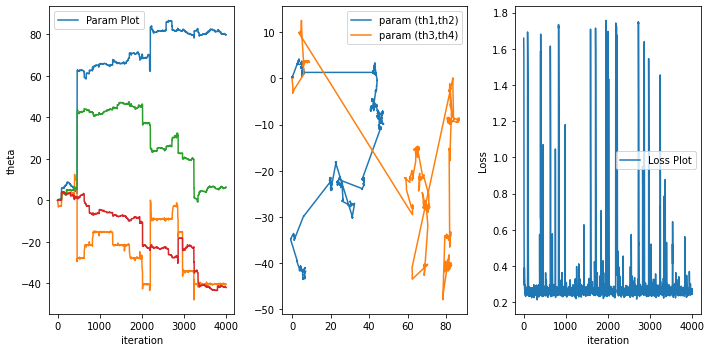

In [174]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
print('After 1000 iteration we have theta =',theta)
axes[0].plot(thdata)
axes[0].set_ylabel('theta')
axes[0].legend(['Param Plot'])
axes[0].set_xlabel('iteration')
axes[1].plot([item[2] for item in thdata],[item[3] for item in thdata],[item[0] for item in thdata],[item[1] for item in thdata])
axes[1].legend(['param (th1,th2)','param (th3,th4)'])

axes[2].plot(progress)
axes[2].legend(['Loss Plot'])
axes[2].set_ylabel('Loss')
axes[2].set_xlabel('iteration')
fig.tight_layout()

In [187]:
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator, UnitarySimulator


backend = Aer.get_backend('qasm_simulator')
def lossCal2qubit(i,theta,nshot):    
    #i th data
    #parameter
    #return loss

    qr = QuantumRegister(2)
    cr = ClassicalRegister(2)
    qc = QuantumCircuit(qr,cr)

    qc.rx(a_shuffled[i][0],qr[0])
    qc.rx(a_shuffled[i][1],qr[1])
    
    qc.ry(pi/4,qr[:])
    qc.rz(pi/4,qr[:])
    
    qc.cz(qr[0],qr[1])
    qc.ry(pi/4,qr[:])
    qc.rz(pi/4,qr[:])
    
    count=0;
    for i in range(2):
        qc.rx(theta[count],qr[i])
        count=count+1
    for i in range(2):
        qc.rz(theta[count],qr[i])
        count=count+1   

    qc.measure(qr[:],cr[:])
    job = execute(qc, backend, shots=nshot)
    result = job.result()
    count =result.get_counts()
    lm=-1*(cN(count,'00')+cN(count,'01'))
    lp=1*(cN(count,'10')+cN(count,'11'))

    loss1=abs(
        (lm+lp)/nshot
        -2*(b_shuffled[i]-0.5)
    )
    loss2=((lm+lp)/nshot-2*(b_shuffled[i]-0.5))**2

    return loss1
lossCal2qubit(8,[1,1,1,1],10)

0.4

[0, 0, 0, 0]

In [58]:
#

theta=[0,0,0,0];
def SPSA(i,th,c1,delta,nshot):
    sp=[];
    c2=[[c1,0,0,0],[0,c1,0,0],[0,0,c1,0],[0,0,0,c1]]
    for x1 in range(4):
        sp.append((lossCal2qubit(i,th+np.array(c2[x1]),nshot)-lossCal2qubit(i,th-np.array(c2[x1]),nshot))/(2*delta))
    return sp

SPSA(1,theta,0.1,5,10000)

[0.006666666666666664,
 0.001666666666666668,
 0.006666666666666672,
 0.008333333333333331]

## Two Qubit iteration with 100 data

### c1=0.01(small movement) delta=0.3+ (small fluctuation)

In [214]:
progress=[];

thdata=[];


l=[];
l1p=[];
l1m=[];
l1t=[];
l1=[];
c=[];

theta=[0,0,0,0];
c1=0.01   
delta=6    
ndata=2;
nshot=2000;
l1p1=[0,0,0,0];
l1m1=[0,0,0,0];

for ep in range(1000):
    delta=random.random()+0.3
    c2=[[c1,0,0,0],[0,c1,0,0],[0,0,c1,0],[0,0,0,c1]]
    l1p1=[0,0,0,0];
    l1m1=[0,0,0,0];
    lo=0;
    for i in range(ndata):
        l1p=[];
        l1m=[];

        for j in range(4):
            
            l1p.append(lossCal2qubit(i,theta+np.array(c2[j]),nshot))
            l1m.append(lossCal2qubit(i,theta-np.array(c2[j]),nshot))
            
        lo=np.add(lo,lossCal2qubit(i,theta,nshot))
        
        l1p1=np.add(l1p1,l1p);
        
        l1m1=np.add(l1m1,l1m);
    
    SPSA=(l1p1-l1m1)/(2*delta);
    theta=theta-SPSA;
    thdata.append(theta)
    progress.append(lo)
    print(ep,"th iteration L=",lo)
    
 

0 th iteration L= 1.5819999999999999
1 th iteration L= 1.593
2 th iteration L= 1.613
3 th iteration L= 1.5510000000000002
4 th iteration L= 1.604
5 th iteration L= 1.611
6 th iteration L= 1.561
7 th iteration L= 1.5510000000000002
8 th iteration L= 1.508
9 th iteration L= 1.587
10 th iteration L= 1.526
11 th iteration L= 1.572
12 th iteration L= 1.5
13 th iteration L= 1.5630000000000002
14 th iteration L= 1.518
15 th iteration L= 1.526
16 th iteration L= 1.582
17 th iteration L= 1.5590000000000002
18 th iteration L= 1.482
19 th iteration L= 1.479
20 th iteration L= 1.504
21 th iteration L= 1.4329999999999998
22 th iteration L= 1.3130000000000002
23 th iteration L= 1.2850000000000001
24 th iteration L= 1.3
25 th iteration L= 1.275
26 th iteration L= 1.1620000000000001
27 th iteration L= 1.095
28 th iteration L= 1.114
29 th iteration L= 1.112
30 th iteration L= 1.0919999999999999
31 th iteration L= 1.167
32 th iteration L= 1.045
33 th iteration L= 1.033
34 th iteration L= 0.992
35 th ite

301 th iteration L= 0.506
302 th iteration L= 0.501
303 th iteration L= 0.494
304 th iteration L= 0.491
305 th iteration L= 0.518
306 th iteration L= 0.54
307 th iteration L= 0.481
308 th iteration L= 0.48
309 th iteration L= 0.502
310 th iteration L= 0.501
311 th iteration L= 0.493
312 th iteration L= 0.51
313 th iteration L= 0.504
314 th iteration L= 0.513
315 th iteration L= 0.499
316 th iteration L= 0.484
317 th iteration L= 0.535
318 th iteration L= 0.513
319 th iteration L= 0.479
320 th iteration L= 0.503
321 th iteration L= 0.529
322 th iteration L= 0.532
323 th iteration L= 0.516
324 th iteration L= 0.505
325 th iteration L= 0.505
326 th iteration L= 0.519
327 th iteration L= 0.544
328 th iteration L= 0.509
329 th iteration L= 0.513
330 th iteration L= 0.497
331 th iteration L= 0.514
332 th iteration L= 0.51
333 th iteration L= 0.484
334 th iteration L= 0.478
335 th iteration L= 0.497
336 th iteration L= 0.537
337 th iteration L= 0.532
338 th iteration L= 0.499
339 th iteration

612 th iteration L= 0.541
613 th iteration L= 0.519
614 th iteration L= 0.501
615 th iteration L= 0.514
616 th iteration L= 0.526
617 th iteration L= 0.512
618 th iteration L= 0.506
619 th iteration L= 0.506
620 th iteration L= 0.505
621 th iteration L= 0.531
622 th iteration L= 0.481
623 th iteration L= 0.5
624 th iteration L= 0.5710000000000001
625 th iteration L= 0.537
626 th iteration L= 0.486
627 th iteration L= 0.485
628 th iteration L= 0.483
629 th iteration L= 0.52
630 th iteration L= 0.509
631 th iteration L= 0.516
632 th iteration L= 0.49
633 th iteration L= 0.531
634 th iteration L= 0.502
635 th iteration L= 0.522
636 th iteration L= 0.545
637 th iteration L= 0.538
638 th iteration L= 0.521
639 th iteration L= 0.488
640 th iteration L= 0.524
641 th iteration L= 0.517
642 th iteration L= 0.507
643 th iteration L= 0.519
644 th iteration L= 0.549
645 th iteration L= 0.5670000000000001
646 th iteration L= 0.539
647 th iteration L= 0.542
648 th iteration L= 0.528
649 th iteration

KeyboardInterrupt: 

After 1000 iteration we have theta = [ 1.64228406  1.13115865  0.06364169 -0.68836585]


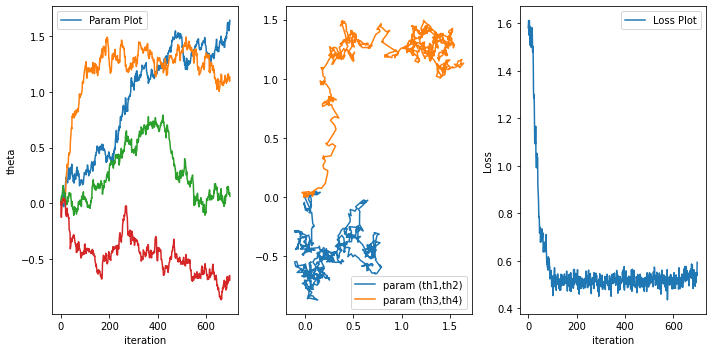

In [215]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
print('After 1000 iteration we have theta =',theta)
axes[0].plot(thdata)
axes[0].set_ylabel('theta')
axes[0].legend(['Param Plot'])
axes[0].set_xlabel('iteration')
axes[1].plot([item[2] for item in thdata],[item[3] for item in thdata],[item[0] for item in thdata],[item[1] for item in thdata])
axes[1].legend(['param (th1,th2)','param (th3,th4)'])

axes[2].plot(progress)
axes[2].legend(['Loss Plot'])
axes[2].set_ylabel('Loss')
axes[2].set_xlabel('iteration')
fig.tight_layout()

In [221]:
progress=[];

thdata=[];


l=[];
l1p=[];
l1m=[];
l1t=[];
l1=[];
c=[];

theta=[0,0,0,0];
c1=0.01  
delta=6    
ndata=200;
nshot=2000;
l1p1=[0,0,0,0];
l1m1=[0,0,0,0];

for ep in range(3000):
    delta=random.random()+1
    c2=[[c1,0,0,0],[0,c1,0,0],[0,0,c1,0],[0,0,0,c1]]
    l1p1=[0,0,0,0];
    l1m1=[0,0,0,0];
    lo=0;
    for i in range(ndata):
        l1p=[];
        l1m=[];

        for j in range(4):
            
            l1p.append(lossCal2qubit(i,theta+np.array(c2[j]),nshot))
            l1m.append(lossCal2qubit(i,theta-np.array(c2[j]),nshot))
            
        lo=np.add(lo,lossCal2qubit(i,theta,nshot))
        
        l1p1=np.add(l1p1,l1p);
        
        l1m1=np.add(l1m1,l1m);
    
    SPSA=(l1p1-l1m1)/(2*delta);
    theta=theta-SPSA;
    thdata.append(theta)
    progress.append(lo)
    print(ep,"th iteration L=",lo)

0 th iteration L= 179.02000000000004
1 th iteration L= 89.43300000000002
2 th iteration L= 82.52399999999999
3 th iteration L= 118.47900000000006
4 th iteration L= 107.592
5 th iteration L= 165.25700000000012
6 th iteration L= 160.025
7 th iteration L= 85.90399999999998
8 th iteration L= 89.41400000000004
9 th iteration L= 96.26899999999999
10 th iteration L= 86.56600000000006
11 th iteration L= 83.35199999999999
12 th iteration L= 92.69500000000004
13 th iteration L= 85.01500000000001
14 th iteration L= 90.40399999999997
15 th iteration L= 83.19299999999998
16 th iteration L= 82.56400000000004
17 th iteration L= 82.14400000000008
18 th iteration L= 82.53500000000001
19 th iteration L= 91.90900000000003
20 th iteration L= 166.44500000000008
21 th iteration L= 89.70999999999994
22 th iteration L= 228.60900000000004
23 th iteration L= 95.07800000000006
24 th iteration L= 113.903
25 th iteration L= 88.19700000000009
26 th iteration L= 118.00399999999998
27 th iteration L= 120.434999999999

227 th iteration L= 139.65900000000002
228 th iteration L= 307.7860000000002
229 th iteration L= 255.71000000000006
230 th iteration L= 82.851
231 th iteration L= 91.68000000000002
232 th iteration L= 86.03999999999999
233 th iteration L= 88.80400000000003
234 th iteration L= 86.19400000000002
235 th iteration L= 99.55100000000004
236 th iteration L= 101.81700000000002
237 th iteration L= 98.17699999999999
238 th iteration L= 111.20299999999999
239 th iteration L= 123.59400000000002
240 th iteration L= 170.83600000000007
241 th iteration L= 158.53699999999995
242 th iteration L= 93.61600000000004
243 th iteration L= 103.27200000000003
244 th iteration L= 86.042
245 th iteration L= 128.50699999999995
246 th iteration L= 95.87200000000003
247 th iteration L= 203.42499999999993
248 th iteration L= 180.78599999999992
249 th iteration L= 99.31500000000003
250 th iteration L= 82.75700000000002
251 th iteration L= 87.49899999999998
252 th iteration L= 84.1
253 th iteration L= 85.319
254 th it

449 th iteration L= 232.09799999999996
450 th iteration L= 126.02099999999992
451 th iteration L= 201.62800000000004
452 th iteration L= 133.90499999999997
453 th iteration L= 169.65499999999992
454 th iteration L= 178.77800000000013
455 th iteration L= 147.36299999999997
456 th iteration L= 237.71499999999992
457 th iteration L= 84.31500000000003
458 th iteration L= 84.779
459 th iteration L= 85.14000000000003
460 th iteration L= 92.97100000000006
461 th iteration L= 90.91700000000002
462 th iteration L= 101.486
463 th iteration L= 148.49000000000004
464 th iteration L= 97.45699999999994
465 th iteration L= 83.09100000000001
466 th iteration L= 83.26800000000004
467 th iteration L= 101.98899999999999


KeyboardInterrupt: 

After 1000 iteration we have theta = [-0.69301355  0.94203413 -7.33938625  3.46321265]


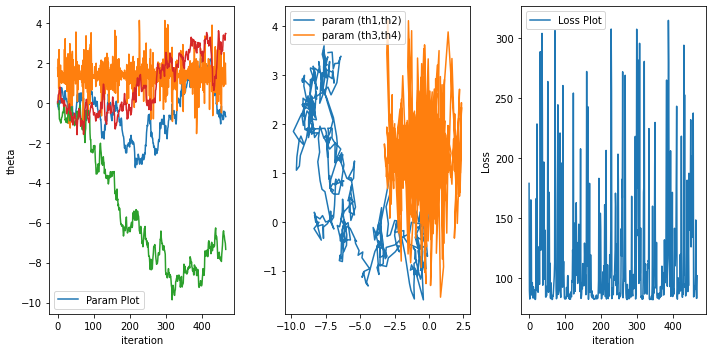

In [222]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
print('After 1000 iteration we have theta =',theta)
axes[0].plot(thdata)
axes[0].set_ylabel('theta')
axes[0].legend(['Param Plot'])
axes[0].set_xlabel('iteration')
axes[1].plot([item[2] for item in thdata],[item[3] for item in thdata],[item[0] for item in thdata],[item[1] for item in thdata])
axes[1].legend(['param (th1,th2)','param (th3,th4)'])

axes[2].plot(progress)
axes[2].legend(['Loss Plot'])
axes[2].set_ylabel('Loss')
axes[2].set_xlabel('iteration')
fig.tight_layout()

In [223]:
progress=[];

thdata=[];


l=[];
l1p=[];
l1m=[];
l1t=[];
l1=[];
c=[];

theta=[0,0,0,0];
c1=0.01  
delta=6    
ndata=200;
nshot=2000;
l1p1=[0,0,0,0];
l1m1=[0,0,0,0];

for ep in range(3000):
    delta=random.random()+1
    c2=[[c1,0,0,0],[0,c1,0,0],[0,0,c1,0],[0,0,0,c1]]
    l1p1=[0,0,0,0];
    l1m1=[0,0,0,0];
    lo=0;
    for i in range(ndata):
        l1p=[];
        l1m=[];

        for j in range(4):
            
            l1p.append(lossCal2qubit(i,theta+np.array(c2[j]),nshot))
            l1m.append(lossCal2qubit(i,theta-np.array(c2[j]),nshot))
            
        lo=np.add(lo,lossCal2qubit(i,theta,nshot))
        
        l1p1=np.add(l1p1,l1p);
        
        l1m1=np.add(l1m1,l1m);
    
    SPSA=(l1p1-l1m1)/(2*delta);
    theta=theta-SPSA;
    thdata.append(theta)
    progress.append(lo)
    print(ep,"th iteration L=",lo)

0 th iteration L= 179.39999999999984
1 th iteration L= 93.24699999999999
2 th iteration L= 82.13900000000005
3 th iteration L= 82.51999999999995
4 th iteration L= 86.51599999999996
5 th iteration L= 82.78699999999998
6 th iteration L= 86.76299999999996
7 th iteration L= 84.72100000000002
8 th iteration L= 83.003
9 th iteration L= 82.852
10 th iteration L= 83.27000000000002
11 th iteration L= 82.57499999999999
12 th iteration L= 84.396
13 th iteration L= 87.233
14 th iteration L= 83.828
15 th iteration L= 82.68000000000004
16 th iteration L= 83.41199999999998
17 th iteration L= 83.74200000000003
18 th iteration L= 83.34999999999998
19 th iteration L= 83.59299999999998
20 th iteration L= 82.607
21 th iteration L= 82.43299999999996
22 th iteration L= 86.12799999999994
23 th iteration L= 84.02899999999998
24 th iteration L= 83.10500000000002
25 th iteration L= 87.49099999999997
26 th iteration L= 83.78900000000002
27 th iteration L= 82.99399999999996
28 th iteration L= 85.20000000000003
29

230 th iteration L= 81.979
231 th iteration L= 82.907
232 th iteration L= 81.982
233 th iteration L= 82.20299999999995
234 th iteration L= 85.28999999999999
235 th iteration L= 85.03600000000002
236 th iteration L= 82.43499999999999
237 th iteration L= 82.336
238 th iteration L= 82.93500000000002
239 th iteration L= 82.63699999999999
240 th iteration L= 85.51999999999998
241 th iteration L= 83.64700000000003
242 th iteration L= 82.69799999999995
243 th iteration L= 82.305
244 th iteration L= 82.638
245 th iteration L= 84.01099999999997
246 th iteration L= 82.62900000000006
247 th iteration L= 83.00000000000001
248 th iteration L= 82.56900000000002
249 th iteration L= 82.75300000000001
250 th iteration L= 83.18299999999998
251 th iteration L= 83.19799999999995
252 th iteration L= 82.93600000000008
253 th iteration L= 82.40799999999996
254 th iteration L= 82.63099999999997
255 th iteration L= 82.42599999999996
256 th iteration L= 83.535
257 th iteration L= 82.63600000000002
258 th iterat

458 th iteration L= 82.91299999999998
459 th iteration L= 82.77000000000004
460 th iteration L= 82.27800000000002
461 th iteration L= 83.03400000000002
462 th iteration L= 83.90499999999996
463 th iteration L= 82.71900000000005
464 th iteration L= 88.17700000000005
465 th iteration L= 83.41000000000001
466 th iteration L= 83.27000000000001
467 th iteration L= 82.41099999999997
468 th iteration L= 85.166
469 th iteration L= 82.87400000000002
470 th iteration L= 82.54500000000002
471 th iteration L= 82.42300000000003
472 th iteration L= 82.38800000000003
473 th iteration L= 82.49100000000004
474 th iteration L= 84.50199999999997
475 th iteration L= 82.248
476 th iteration L= 82.70100000000004
477 th iteration L= 82.60600000000004
478 th iteration L= 82.72200000000002
479 th iteration L= 82.664
480 th iteration L= 82.21999999999998
481 th iteration L= 83.09900000000005
482 th iteration L= 82.48400000000002
483 th iteration L= 82.03499999999998
484 th iteration L= 88.80800000000002
485 th 

687 th iteration L= 82.39200000000001
688 th iteration L= 82.12300000000002
689 th iteration L= 82.97100000000006
690 th iteration L= 82.26299999999996
691 th iteration L= 82.50500000000001
692 th iteration L= 85.13099999999997
693 th iteration L= 85.95799999999997
694 th iteration L= 82.543
695 th iteration L= 83.61600000000001
696 th iteration L= 82.86199999999994
697 th iteration L= 82.60899999999998
698 th iteration L= 82.43400000000005
699 th iteration L= 81.93200000000003
700 th iteration L= 84.04399999999995
701 th iteration L= 82.50699999999998
702 th iteration L= 82.36599999999999
703 th iteration L= 83.59099999999998
704 th iteration L= 83.75200000000002
705 th iteration L= 82.382
706 th iteration L= 81.98600000000003
707 th iteration L= 85.63500000000003
708 th iteration L= 82.39300000000003
709 th iteration L= 82.724
710 th iteration L= 81.98200000000007
711 th iteration L= 82.72299999999998
712 th iteration L= 82.60800000000003
713 th iteration L= 82.048
714 th iteration L

916 th iteration L= 85.12
917 th iteration L= 100.98700000000004
918 th iteration L= 83.28900000000002
919 th iteration L= 82.55299999999997
920 th iteration L= 82.35299999999997
921 th iteration L= 83.73599999999999
922 th iteration L= 84.96600000000001
923 th iteration L= 82.569
924 th iteration L= 83.46199999999997
925 th iteration L= 87.81700000000008
926 th iteration L= 82.44800000000002
927 th iteration L= 82.29099999999995
928 th iteration L= 82.643
929 th iteration L= 82.74999999999996
930 th iteration L= 82.44399999999999
931 th iteration L= 82.54800000000004
932 th iteration L= 82.62400000000002
933 th iteration L= 82.04399999999997
934 th iteration L= 82.286
935 th iteration L= 83.37700000000004
936 th iteration L= 84.734
937 th iteration L= 85.089
938 th iteration L= 82.67800000000003
939 th iteration L= 84.057
940 th iteration L= 83.33800000000002
941 th iteration L= 82.673
942 th iteration L= 82.63100000000001
943 th iteration L= 82.27700000000002
944 th iteration L= 82.2

1140 th iteration L= 83.079
1141 th iteration L= 82.43100000000001
1142 th iteration L= 82.94800000000001
1143 th iteration L= 82.81599999999999
1144 th iteration L= 83.24600000000002
1145 th iteration L= 82.423
1146 th iteration L= 85.77999999999997
1147 th iteration L= 82.14499999999998
1148 th iteration L= 82.442
1149 th iteration L= 82.40300000000002
1150 th iteration L= 82.08400000000007
1151 th iteration L= 82.45300000000002
1152 th iteration L= 83.56899999999997
1153 th iteration L= 82.326
1154 th iteration L= 82.56800000000003
1155 th iteration L= 82.23200000000004
1156 th iteration L= 82.30099999999995
1157 th iteration L= 82.45099999999996
1158 th iteration L= 82.164
1159 th iteration L= 85.768
1160 th iteration L= 82.88600000000004
1161 th iteration L= 82.513
1162 th iteration L= 82.137
1163 th iteration L= 83.17099999999999
1164 th iteration L= 83.40100000000002
1165 th iteration L= 83.482
1166 th iteration L= 82.17100000000002
1167 th iteration L= 83.42900000000003
1168 th

1362 th iteration L= 84.29700000000001
1363 th iteration L= 82.0449999999999
1364 th iteration L= 82.70600000000002
1365 th iteration L= 89.15399999999998
1366 th iteration L= 85.22800000000001
1367 th iteration L= 84.64900000000003
1368 th iteration L= 85.30799999999996
1369 th iteration L= 83.19299999999998
1370 th iteration L= 82.70900000000003
1371 th iteration L= 82.68200000000002
1372 th iteration L= 85.17400000000002
1373 th iteration L= 85.05799999999999
1374 th iteration L= 84.30600000000001
1375 th iteration L= 83.71000000000001
1376 th iteration L= 84.55200000000006
1377 th iteration L= 82.71299999999995
1378 th iteration L= 82.54699999999994
1379 th iteration L= 83.77900000000005
1380 th iteration L= 82.45899999999999
1381 th iteration L= 82.23300000000002
1382 th iteration L= 83.10999999999997
1383 th iteration L= 85.20700000000002
1384 th iteration L= 82.524
1385 th iteration L= 81.89399999999998
1386 th iteration L= 82.67699999999995
1387 th iteration L= 83.2310000000000

1580 th iteration L= 82.81900000000002
1581 th iteration L= 82.91699999999999
1582 th iteration L= 83.67100000000003
1583 th iteration L= 86.601
1584 th iteration L= 82.99699999999996
1585 th iteration L= 83.16800000000003
1586 th iteration L= 82.834
1587 th iteration L= 82.831
1588 th iteration L= 85.41200000000002
1589 th iteration L= 86.40500000000002
1590 th iteration L= 83.42700000000004
1591 th iteration L= 82.74600000000005
1592 th iteration L= 84.37399999999998
1593 th iteration L= 82.28100000000005
1594 th iteration L= 82.97900000000001
1595 th iteration L= 82.37200000000003
1596 th iteration L= 84.648
1597 th iteration L= 84.597
1598 th iteration L= 83.291
1599 th iteration L= 83.37600000000002
1600 th iteration L= 86.75800000000001
1601 th iteration L= 82.43499999999997
1602 th iteration L= 81.97399999999996
1603 th iteration L= 84.46200000000007
1604 th iteration L= 82.42499999999993
1605 th iteration L= 82.16799999999999
1606 th iteration L= 83.997
1607 th iteration L= 81.

1803 th iteration L= 83.85100000000003
1804 th iteration L= 84.41799999999999
1805 th iteration L= 83.96799999999995
1806 th iteration L= 84.04900000000005
1807 th iteration L= 85.742
1808 th iteration L= 82.55799999999998
1809 th iteration L= 86.00799999999998
1810 th iteration L= 82.19600000000007
1811 th iteration L= 82.30899999999998
1812 th iteration L= 82.67400000000005
1813 th iteration L= 83.04499999999999
1814 th iteration L= 83.76000000000005
1815 th iteration L= 82.12
1816 th iteration L= 83.974
1817 th iteration L= 83.35400000000003
1818 th iteration L= 82.611
1819 th iteration L= 83.00999999999999
1820 th iteration L= 84.54499999999996
1821 th iteration L= 82.70600000000006
1822 th iteration L= 82.76399999999998
1823 th iteration L= 82.44400000000002
1824 th iteration L= 82.29300000000003
1825 th iteration L= 93.79900000000004
1826 th iteration L= 82.54799999999997
1827 th iteration L= 82.71000000000002
1828 th iteration L= 83.12700000000001
1829 th iteration L= 82.738
183

2026 th iteration L= 82.59499999999994
2027 th iteration L= 82.75700000000002
2028 th iteration L= 82.59200000000003
2029 th iteration L= 95.32799999999997
2030 th iteration L= 86.62100000000004
2031 th iteration L= 86.75899999999993
2032 th iteration L= 86.10900000000001
2033 th iteration L= 82.49099999999999
2034 th iteration L= 83.8800000000001
2035 th iteration L= 82.33500000000005
2036 th iteration L= 86.19500000000001
2037 th iteration L= 82.703
2038 th iteration L= 82.35700000000001
2039 th iteration L= 83.06999999999998
2040 th iteration L= 82.61400000000002
2041 th iteration L= 84.00900000000001
2042 th iteration L= 82.80800000000002
2043 th iteration L= 82.483
2044 th iteration L= 82.54799999999999
2045 th iteration L= 82.69499999999998
2046 th iteration L= 82.05800000000002
2047 th iteration L= 83.15599999999999
2048 th iteration L= 82.35700000000004
2049 th iteration L= 82.75600000000004
2050 th iteration L= 84.884
2051 th iteration L= 82.66800000000002
2052 th iteration L=

2247 th iteration L= 82.19800000000004
2248 th iteration L= 83.22200000000002
2249 th iteration L= 82.06000000000002
2250 th iteration L= 82.32400000000004
2251 th iteration L= 82.72299999999997
2252 th iteration L= 83.27299999999994
2253 th iteration L= 82.51199999999999
2254 th iteration L= 82.74399999999997
2255 th iteration L= 82.21500000000002
2256 th iteration L= 84.42200000000003
2257 th iteration L= 82.98599999999996
2258 th iteration L= 82.45700000000001
2259 th iteration L= 82.23600000000006
2260 th iteration L= 83.34700000000002
2261 th iteration L= 82.2800000000001
2262 th iteration L= 82.40100000000008
2263 th iteration L= 89.156
2264 th iteration L= 82.94099999999999
2265 th iteration L= 82.77900000000001
2266 th iteration L= 85.78200000000004
2267 th iteration L= 81.85799999999999
2268 th iteration L= 82.53900000000002
2269 th iteration L= 84.16900000000005
2270 th iteration L= 82.69600000000004
2271 th iteration L= 83.02099999999994
2272 th iteration L= 83.3250000000000

2467 th iteration L= 83.575
2468 th iteration L= 82.83400000000002
2469 th iteration L= 84.37799999999997
2470 th iteration L= 82.76399999999998
2471 th iteration L= 83.46600000000008
2472 th iteration L= 82.63600000000005
2473 th iteration L= 82.69300000000001
2474 th iteration L= 90.92899999999995
2475 th iteration L= 84.06699999999996
2476 th iteration L= 82.60499999999995
2477 th iteration L= 83.34300000000002
2478 th iteration L= 82.82900000000001
2479 th iteration L= 81.87900000000006
2480 th iteration L= 82.87900000000002
2481 th iteration L= 82.43
2482 th iteration L= 83.85899999999995
2483 th iteration L= 83.28500000000001
2484 th iteration L= 82.31600000000002
2485 th iteration L= 85.76799999999997
2486 th iteration L= 83.07699999999997
2487 th iteration L= 82.90399999999997
2488 th iteration L= 82.60099999999998
2489 th iteration L= 82.54199999999997
2490 th iteration L= 85.16199999999999
2491 th iteration L= 82.55700000000007
2492 th iteration L= 85.71499999999992
2493 th i

KeyboardInterrupt: 

After 1000 iteration we have theta = [ 6.57745625  1.33666644 -6.48763431  1.22216345]


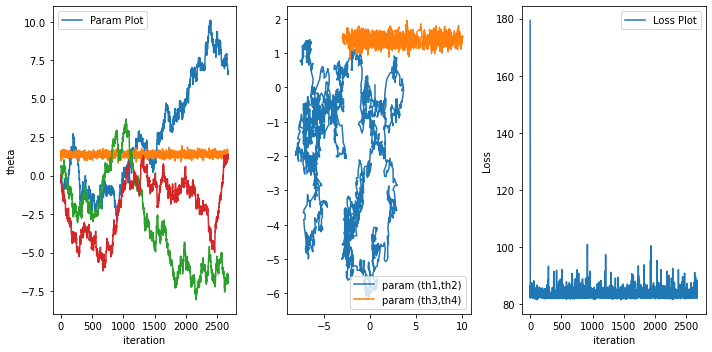

In [224]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
print('After 1000 iteration we have theta =',theta)
axes[0].plot(thdata)
axes[0].set_ylabel('theta')
axes[0].legend(['Param Plot'])
axes[0].set_xlabel('iteration')
axes[1].plot([item[2] for item in thdata],[item[3] for item in thdata],[item[0] for item in thdata],[item[1] for item in thdata])
axes[1].legend(['param (th1,th2)','param (th3,th4)'])

axes[2].plot(progress)
axes[2].legend(['Loss Plot'])
axes[2].set_ylabel('Loss')
axes[2].set_xlabel('iteration')
fig.tight_layout()